In [64]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [69]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [70]:
print(tNGX_train.shape)
tNGX_test.shape

(12626, 51840)


(6220, 51840)

In [7]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [8]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [9]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.465342
Step 1000: Minibatch Loss: 0.133321
Step 2000: Minibatch Loss: 0.111692
Step 3000: Minibatch Loss: 0.102148
Step 4000: Minibatch Loss: 0.098210
Step 5000: Minibatch Loss: 0.089499
Step 6000: Minibatch Loss: 0.086439
Step 7000: Minibatch Loss: 0.083311
Step 8000: Minibatch Loss: 0.081477
Step 9000: Minibatch Loss: 0.076335
Step 10000: Minibatch Loss: 0.074215
Step 11000: Minibatch Loss: 0.072664
Step 12000: Minibatch Loss: 0.071061
Step 13000: Minibatch Loss: 0.070036
Step 14000: Minibatch Loss: 0.068936
Step 15000: Minibatch Loss: 0.067436
Step 16000: Minibatch Loss: 0.064796
Step 17000: Minibatch Loss: 0.063991
Step 18000: Minibatch Loss: 0.063609
Step 19000: Minibatch Loss: 0.063639
Step 20000: Minibatch Loss: 0.060023
Step 21000: Minibatch Loss: 0.057329
Step 22000: Minibatch Loss: 0.056039
Step 23000: Minibatch Loss: 0.056651
Step 24000: Minibatch Loss: 0.055242
Step 25000: Minibatch Loss: 0.054368
Step 26000: Minibatch Loss: 0.055249
Step 27000: Mi

(4, 784)
(4, 784)
(4, 784)
(4, 784)
Original Images


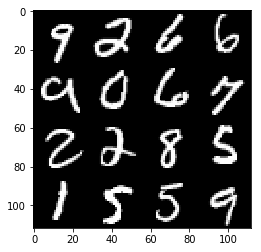

Reconstructed Images


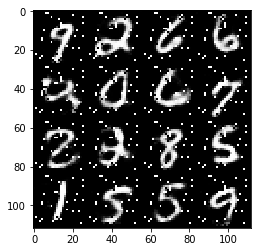

In [14]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    print(batch_x.shape)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [74]:
batch_train, y_train = mnist.train.next_batch(56000)
batch_test, y_test = mnist.test.next_batch(14000)


# Encode and decode the digit image
encoded_train = sess.run(encoder_op, feed_dict={X: batch_train})
encoded_test = sess.run(encoder_op, feed_dict={X: batch_test})


In [75]:
from sklearn.metrics.pairwise import cosine_similarity
old_distance = cosine_similarity(batch_test)
new_distance = cosine_similarity(encoded_test)

In [77]:
for i in range(batch_test.shape[0]):
    old = np.argsort(-old_distance[i])
    new = np.argsort(-new_distance[i])
    print("old:",old[:20])
    print("new:",new[:20])

old: [    0 12183  3324  4118 13165  4919 13907  1736  9457 10757   966  9534
 11924   146  2657 11431  4411 13979  4349  4896]
new: [    0 12183  4919  4118 13165   966   146 11924   672 10532  8702  9963
 11431  4411  4435  5246 13907  1736  1017  6844]
old: [    1  8158 12706  4552   210   194  4826   730 12435  2072 13241  5543
  8729  3156  1197 12017  9115   260  3023  8696]
new: [    1  8158 12706  4552 13389  7506   695  2814 10189   260   730 12435
 12160  6254  1822 13241  2072  7912 12857  9943]
old: [    2 13705 13715    90  3521  3377  5983  8411  3043 12417  7539  9230
 13074  5263   181  9888 12154  2896  3948  7677]
new: [    2 13705 12417  3043  7539  1778 13715    90  8871  5263 13074  1252
 10852 10355  8850 13224   142  2681  6658  2506]
old: [    3  9743  6182  5095  4868  9436  5793 12344  2733 11012  7179 12314
 13416  8872  5206  4480 12447  4190 13964  3673]
new: [    3  9436 13964  4190 12314  7179  7430  6182  4868  4620 10332 12105
  6177  5756  3540  9543 1

old: [   82  2649  6228 10639  6860 13225   694 12924  6153  9267  4895 13739
  9218 11405  8467  1065 13179  4436  5434  6065]
new: [   82   423 12543  8467 11405  2649  6860 13225 10639  6228  9267 10235
  2080   800  1065 11245  4443  4895 13739  1613]
old: [   83 10830  1501  5441 12441   743 12007  8085  8907  9684 10239 11349
  8179  5567 12479  4209 10397  3250  2630 12352]
new: [10830    83  8907  8085 12007  1501   530  4131   743  7732 10766  9210
 12144  5359 13695  5441 12441   934 12752  2055]
old: [   84    98 12873  9441 10560  9162 12809  5003  4559   842 12648 13701
  5660  8286  1837  7618  7531   717  3487 11512]
new: [   84    98 12873  4559  9162 12809  9441 10560  5003   842 12648  2562
 11231 10114  3951  7531  4742 11512  3487  2316]
old: [10383    85  2832  6796 10955  8578 11261  1617 13734  8349  4234  5936
  5006  4789 11218  6162  5648  6489  7951  8452]
new: [10383    85  4234  3862  8578  8349 13734  4600 13319  8452  5648 12682
  2335  6936 13554  6796 1

old: [  156  6620  5491  3246    40 13977  3025   527  8668  5929 12450  5548
 12096  3420 12364  3402  4684 11037  7843  3274]
new: [  156  6620  1892  3274  4847  9342   527  6626  5687  3420  5491    30
 13417 12364  3402  5525  3054  6906 11542  9148]
old: [  157 13205  7127 11327 10924   579  9085  7932 11882 12112  1337  8257
  1297 13912  9212  7884 10654  8139  9426 11583]
new: [  157 13205 11327  7127  9085  8063  9426  8139  9212  8612  1297 13912
 10924   579 10494  9288  1389 11644  4409 10659]
old: [12988   158   544 11514  4780 12219 12787  1605  1400 12293  2573  8026
 10580  5285  1647  3378  1569  3220  9577 13383]
new: [12988   158   544 11514  4780 12219  8890  5971 10580  5285 12444  6534
  9477 13383  9577  8144  8026  7788  2573 13948]
old: [11132   159   125 10475  1905  1113  9982 12906  9911 10874  4358  8771
 12236  1577 10835  6241  2877  4378 13572   883]
new: [11132   159   125 10475  6241  1113 13572  4378  8771 12236  9982 12906
 13921  3848   883 11280  

old: [  233 13721  7174  4232 12438  5198  3984  4150 11602   969 13957  3705
  3815  1172  9936  6119  1615  7380  8356  7467]
new: [13721   233  5198  7174  1615  3984 13722  7069  8356 12438  4232  3705
 13957  6861 12136  8497 11502   150  5598  7821]
old: [11872   234   599  4767  3412 13127   321  3327 11161  3527  8737  8357
 10690    76  9427 13232  3701  4343  5940  1785]
new: [11872   234   599  8737  6678  4511    76 10690  4767  1672  8879 12519
  3412 11209  9602  9427  7428   321 13127  3701]
old: [10234   235  5044  3636  7774  8771 12236  3108  7971  6318 11952  1185
  9050  4057 11360 13921  3848  5934 13541  4382]
new: [  235 10234  5044  9050 11952  6318 13421  5203  3636  3108  2568  8978
  1868  7971 13431  4382  2419  7774 12236  8771]
old: [  236 10242  3038  5642 11914  3950 10594  3741 13557  7436  2662  5884
  8152  5956 11601  3258  9884 13869 10462  5253]
new: [  236 10242  5956  3038  3968 11823 12272  3234  8464  5589  3950  2426
 13905   543 13054  1028  

old: [  303  1204  6225 13508  7869 11974  8453  1581  1822  5562  9226  4800
  4703 13241  2072  3460  4370  4960  8981  5048]
new: [  303  1204  9046  4703 11974  7869  4370  5976  1581 13241  2072  5562
  3460  2664  8453   931 13766  6998 12017  9115]
old: [  304  2504 11750 12983  9871 12222  1106  7175 13549  3545 10872  4053
  5858  6995  4326  7418  2846  1261  7221 10062]
new: [  304  9871 12983 12222  1106  6995 11750  2504  4699  7418  2751  2339
  1147  8224  6825   604 10455  7221 10062  7645]
old: [13502   305  5442 10951 13051  1762  9192  4646 11867  7313  7228 10141
  8021 12062  3824  1023  4803 10243 11262  6789]
new: [  305 13502 13051  1762  9192  7313 10951  5442  1023  8091  8156 13647
 10141  7228 12062  3824 13938  4746  9815  6426]
old: [  306 10014  4431 11725  9740  7951  6489  6649  1729 10907 12480   927
  7006 10699 11265  5553  2739  3365  6162 10365]
new: [  306 10014  4431  6489  6162  6649 10699  7006  7951  3365  7867  9740
 11725  5228 13453  2488 1

old: [  364  1136 10123 11363  8778  5451 11097  5477  5965  7550  9993  4645
  7268  1569  1183 11909   734  2125   338  1293]
new: [  364  6672  8778 11363  1136 10123  7268  5965   912  5011 11650 11097
  5451  1569  3378  9993  2667 10981  2896  5638]
old: [  365 11758  4182 12483  9463  9884 13869 13905  2426  5658  4900  7726
 10266  5794  2700  8092  5253 10462   440  3964]
new: [  365  4900  4182 11758  5794  5658  2426 13905 12483  9463  1284 13342
  2662 10245  3964 10266  7726 12127  3267   214]
old: [  366  2622 12392  6413  7242  7695 13260  3939 12372  9852  1619  9635
  3909  9988  9987  3224  8279 12599  2318  9146]
new: [  366 13260  7695  6413 12392  3224  7907  2509  8279 12892  8078  9987
  2261  4434 13173  8656  4424  5306  9988  5537]
old: [10177   367  4366   520 13277  7337 13709 12853  1610  5240 13946  4890
  2141  8094  2795 10633  5978  6390 13025  5278]
new: [10177   367  4366 13025  6390   520 13277  5240 13946  5278  6210 11392
  7819  1327  5699  1221  

old: [  440 12483  9463 13869  9884 10266  7726  5658   365  8774 10594  3741
   728  5642 11914  4182 11758  2328 12686  6726]
new: [  440  5658  4311 10266  7726 13342  1284 12272  3234  9463 12483 13905
  2426  3968 11823  4155  3178   728   803  5589]
old: [  441  7672 12008  6367 12645  1224 11527  6338  9038 11381  7946  9553
   309  1286 12616  1903  7838 13783 12637  6856]
new: [  441  7672  1224 12645  1903  1280 13805  6999  1286 12616  1145 12008
  6367  6078  1435  3339  6526 13093  8828 11527]
old: [  442  9936  3984  1172  7174 12136  6861 10013  8167  4089  4200  3943
  5257 13555  8423  4161 13641  9867 13440  7380]
new: [  442 13555  8423  4089    43  4279  4200 13641  4161 11379  8682  4229
 10191  6781  3984  1584  9936  4232 12438  8497]
old: [  443  1455 11273   906 10613  9569  4621  5103 11590  8151  1592 12292
  9456  4238  6389 11884  8293 13940  8819  9381]
new: [  443 11273  1455  1592   906 10613  6389 13297  8265  8151 11590  9514
 13331  4238  5103 10109  

old: [  519  9349 12783 12278  8262  5314  1361 12661  8604  5988  5456 10705
  9997  4899 11912  9697 13714  7158  4261 11747]
new: [  519  5314 12278  8262  1361 12661  9349 12783  8604  4261 11747  4899
 11912  9697  5456 10705  9997  1527 10028 12905]
old: [13277   520  6135  5699 10177   367  6804  2227 12697  8109  2795  7850
 12853  1610  8703   216 12403  9615  8953   188]
new: [13277   520  5699   367 10177  7850 11088   188  2227  6135 13675  1642
 11392  6210  6390 13025  5053 11718  6022 13661]
old: [  521  7365  1131 10588  2619  9419  5836    73  1634 11871 12192  9731
 12538  3600  1441 13760  5258  8790  7762  2410]
new: [  521  7365    73  8478 11871  1634  9655 10748  1437     8  9419  1319
 11946  1131  1741  3420  7518  8790   322 12057]
old: [  522 10401  6420 11619  4593 10500  5703  9316 12184  2682  2020  8071
 13374  6562  3843 13820   676  3482  2919  5666]
new: [  522 10401  6420 11619  5703   676 13820 10500  4593  8001  3482 10650
  7945  5666  4679  4081  

old: [  605 10938  6456 10657  9235  3502  3858 11201  1100 13018  3095  8346
 12736  3998  7581  3684  7163  4556 10986  1922]
new: [  605 10938  6456  3095 13018  3998 10986  1922  3684  1100  9250  4556
  3502  2246 13420  3153   139 12736  8346  2414]
old: [  606  7621  2719  5418 11441  9810  3408  8585  7259  4821  3400 10091
 13286  9817  1852 12943  9690 13138  5584  8811]
new: [  606  8585  7621  9817 13286  9810  5418 11441  7259  1503  9566 11651
  1995  2740 11531  7162  4802 13634   843  3408]
old: [  607  1891  4191  9155 11647   913 12963  9021  2044 13593  2599 13273
  8110 10789  8975  9959  9201 12771  8367  9062]
new: [  607  1891  9062  9845  2599  4191 12963  9021 11647  9155  2044 13593
 11582  5583  2016 13160  6954 11176  3391  9056]
old: [10303   608   312 10675  7963 13239  6590  9319  5882   363  8394  1816
  3503 13281 10623  2198  4389 12443  9937  7396]
new: [  608 10303  8394  2198 10623 10675  7963  6590 13239  8180 11870 13281
  3503 13445  4416   363  

old: [13684   691 13273  8110  9195  1312  2611 10927  2191 11669  7950  4689
   266  6954 11763  7914 12061  5624  6545  3209]
new: [  691 13684  1312  9195  6545 13464  5251  2611  3649  3432 12635  9688
 10662  9714 13037  2191 10927  4444 13273  8110]
old: [  692  4883  3850  9266  8343   448  2778  1925 11910  8888  9098  3497
  9930  5084 12636  4510 11298  8490  7569  5694]
new: [  692  7053  4883  8343  8835  9098  3850  4560 11789  7155  5463 13366
  7954  8888   448  2528  3553  1925 11910  9266]
old: [  693  8196  3450 10285  6021   282  9564  7653  7705    66 12018  3792
  3922  8838  5500  3337 10404 10669    25  4271]
new: [  693  7653  3450 10285  3792    66 12018  9564 10404  3337 11595  6398
  1500  8196  3860  3922  4632  8838 10669    25]
old: [  694 13739  4895 13280  8399  6065  9843  2659  9218 13179  4436 10235
  2080  9267  6228 10639  8454  7590 13125  4443]
new: [  694 13739  4895  2659  8454  6065 13179  4436  8399 13280  6228 10639
  9267  9843  2080 10235  

old: [  777  5473 12332  7478  1315 13743 11902  2673  7913 13354 10774  9921
  8405 11228 10746  5266 10779  1294  9758  4399]
new: [  777  5473  2673 11902 13305  3332  7478 12332 13743  1315   204 12735
  3102  1141 11500  8030  5599 13013  8874  4753]
old: [  778 10052  1757   983 10335  6703 11905  9911  4667  9410  8404  6753
 12291  3772 12048  6415  8059 12024  3243  1577]
new: [  778 10335   983  9410 13733  1926 10052  1757  2026    17  6610 13556
  3772 12291   739 13689  3243  7584  9911  6879]
old: [12604   779  2283  7326 10178  7032 10822  8537 11399 10217  8944  8216
 13099  9873  3895  2741 12285  7735  4298  7704]
new: [12604   779  2283  7326 10178  2741  8537 11399  7735 12285 13654  1402
  8216  9708  7032 10822  3579  5861 11615  1557]
old: [  780  9622  1192  4252  9419  5410  8278  7762  4992 11429   976  2410
  3632  1269  7390  5900   815 10268  3084 10564]
new: [  780  9622  1192  9419  5900  4302  3504  5410  9721  4252  1443 10540
  8199 13300  9969 10614  

new: [  863  9922  1745   508 13048  2279 12937  2759 13094  7664 12327  8558
   832  8725  9196  2314  2669  8623 13307  9596]
old: [  864  4058 10644  1326   264 10883  1525  1510  4054 13335 13701  5660
 10114  3951  5003 13291  4999  4691 12541  3536]
new: [  864  1326 10114  3951 12224  6052    84  4742  4559  4058 10644  2316
 11056  4296  8765 11367 10883   264    98 12873]
old: [  865 10445  9957 10646  4218  9746 11654   747  4872  1741   859  4847
  3253 12221  3722 12419   261  2410  9847  4248]
new: [10445   865  4872  4429 13789  9746 11654 12221  3253  6327  2341  5286
 11408  4355  4847  3722  1583  6238 10133 13865]
old: [  866 12093  4566  8761  4938 13134   504   174   630 10669    25  9530
   793  9067 13861  4254  1865  5021  5025   542]
new: [12093   866  9067   174  4566  8958  4938    25 10669 13003  9357  5899
 11482 13861  4254  2620 11730  3371  8196  1703]
old: [  867  2864 12502   763 12842 12823  5260 10098   899  2703 12452   667
  1626  9331  6584 12660  

old: [  950  8489 13582  5528   124 11197  4474  1206   350  2137 10387  2744
  7192 11315  8142  1156 12313  1038 10457  4293]
new: [  950  1206  9354 10457  1038  5438  2897   532 13582  5528   124 11197
  4718 10814  1339  6575 10676 13053  1893   190]
old: [  951 11774  4861 11649   812  6010 12380  8819 13940  9130   110  3380
 12513  8135  4902 13322  7770  3401 11477  2071]
new: [  951 11774  4861 11649  8135  9130 12380  6010  9431 13381  2416  6795
  2212 11593   812  8691  5422  5908  2071  7835]
old: [  952  8230 11751  1696 10359 10839  4533  2583  9347 10818  7474  6365
 10660  9016 13776  8678  4392 10196  5723  4396]
new: [  952  8230 11751 10359  1696 10685  7252   217 13155   495 11980  9991
  4937 12333 10818  9347  8197  6400  2215  7109]
old: [  953  6406 10943  7016  5958  5729  1607 13403 10755  6714 13758  4788
  4237  3557  9946 12067  4250 10527  7629 11307]
new: [  953  6406 10943  9946 12067  2234  4788 13758 11899  2089  5107 11307
  7629 13217  7794  8113 1

old: [10992  1036  3383 11635  3620  3489 12763  1266  3034  5989   167  7691
  5235  2539  3135  9286 10077  4069  6104   852]
new: [10992  1036 11635  3620  1266 12763  3489  5989  9286 10077  1676  3347
  4277  4290  7691  3034  9368 13937  4114  3383]
old: [ 1037 12728  5214  9968  7368  7857  3425  5135  5704 12233  9806  7128
  9617  4696  6033 10626  7871  4534  2880  4497]
new: [12728  1037  5135  9496  9968  7857  4497  3353  7871 10626  5458  3425
  7368  1223  5704   113  5214  9806 12233  7713]
old: [10457  1038 10387  2744 13053  1893  4293 10105   516  1378   950 13582
  5528  7310 12322  1439   489 11320 13423  1596]
new: [ 1038 10457  2744 10387   950 13219  1290  5438  9233  1893 13053  1378
   190 12087   532  3190  4112  8024  4293 12322]
old: [ 1039  8409  2513 10171  4135  6166  2636 13385 13252  4152  7589  2296
  6003 13166  5138  9262  3767 12557  3576  4040]
new: [ 1039  9262 10171  4135  7444  1392 12021  5394  3691  8409 13252  4152
  7906  6166  3576 12557  

old: [ 1122 12929  8168  8881  7198 12540  4070  3364 13664  7094  4093  2968
  1220  6568   731  7519  4044  4863 10685  7252]
new: [ 1122  8881  7198  8168 12929  2968  6568  4093  8605  4070 12540  3364
   596  2073 13944  4986 12226  2517  4503 13251]
old: [ 1123  1856  4193 11623  2737  5181  8025 11486   432  4068  8571  2135
 11712  5324  8588 13651  3374  1669 13521  6443]
new: [ 1123  5181 13585  5750  4193 11623  6840  9755  1856  8588 13379  2496
  7414  8064  1890  6443   432  5864  7847 10388]
old: [ 1124 13628  1918  5749 13682  7117  2412  9641  7072 13928 10167  7262
  7823  5655 10809   376  7670   687  3687  7941]
new: [ 1124 13682  5749 10809  5655  7072 13928  3521  1034  8961  7823  6209
 13562    54  1318  3378  1470  7117  5332 13519]
old: [11356  1125 12059  5420  5068 11241  8476  3144  2523 10004    80  2175
  9254  7350  7057 11757  2521  5362  6036   326]
new: [ 1125 11356  5420 12059  8476 11241  6036  2523 10004 11005  3907    80
  7350  3144  9254  2175  

old: [ 1205 11034  7932 11882  8123 10614  4317 13538  3962  7809 12837  5229
 11295  5951  7118 12860  4252  1185  6735 13797]
new: [ 1205 11034 13797  6735 10614  8123  4252 11295  5229  1185  6727  2769
  9018  5865  1835  5108 12526   202 12822  4358]
old: [ 1206  2137  4474   950   350  5859  8142 11315  3104  6459 10814  4718
 11197   124  8160 11812  5142  1682  7578  7192]
new: [ 1206  4474   350  4718 10814   950  2897   124 11197  2137 10537  7561
 11812  8160   551   705  8142 11315  8489  1682]
old: [ 1207  6596 12159  9431  2162  5789 11555  3688   207  7936  1021   888
  4319  2476 10221 12182  5009 11096  2507  9682]
new: [ 1207  6596 12159  9431  8691  2162  7120  1021  4319  8231   888 11096
  2507  3688  7936 13868   610  7832  6881 13234]
old: [ 1208  3650  8668   207  3274  2367  1892  4607  3246 11001  8956  8235
 13799  3361  9132  3402 12364  6795 13974  6830]
new: [ 1208 11284  6929   207  1892  7120  9132  5669  9612  3274  2367 13868
   610  3054  3402 12364  

old: [ 1278  6690  3018  4744 13967   806  5378  9671  7180 12482   914   720
 11178  2535  2465 12867  7275 12068  2676 12727]
new: [ 1278  7180 11178   720  4744  8520  7700  8296 12068  7275  6690  3230
 10255  2465 12867  3018  6899  6486  7104  9677]
old: [ 1279  9102  6464  7059  8616 10435   433 11371  6425  9440  6962 13468
  8933  1058  4392 10196  4321  6096 11341 12575]
new: [ 1279  6464  7059  9102 10435   433   952  8616  3673  2866 11751  8230
 12148  9527  4392 10196  6560  1997 12575   793]
old: [ 1280 13805 11120   568  8687  6286  8739 11420  9974 11239  1188  2219
  5522  4276 13640  4998  9908  9112 10362  4969]
new: [ 1280 13805  8687   568 11120 12821  2512  4998  6286  1188 11239  6061
  4967   441  9908  8739  7344  5734  5276 13640]
old: [ 1281  5171  7261  9733  5981 13911  7029  3835 12641  5442 10951 13284
  2672 10932  8147  7269 10603  8337 13163  6175]
new: [ 1281  5171 10803  6014  9733 13163  6175  7261  9051  5442 10951  8021
 11262  6789  3740 12750  

old: [ 1358  4987   179 13444  4143   634  3641  7516 10620 11820  3773 10049
  5242  9449 13154  8809 11740  8232  2936    93]
new: [ 1358  4987  5767 13444  4143  3792   634   705 10105   516 11103  5977
  1290 13219  5156 11296 11595  6398  1378  1038]
old: [ 1359 11168  1057  3154  1088   199    77 12410 10340  8663  9142   804
 10893  3603    41   583  2245  9972  3467  6702]
new: [ 1359   199  3154  9142 11254  4702  7853  1057 11168   804  1088 13036
  8913  7223 11158  7255  9972  3467 12410    77]
old: [ 1360  2658 13965  3167   160  8567 13121  7513  2207 11629  2037  4907
  2773 12156  1833 12854   636  3133  9254  3669]
new: [ 1360  2658  3167 13965 13121  8567  2773  7513 10719  4128  2207   160
   954 11818  2575 11629  2037  2175  2693 11150]
old: [ 1361 12661  8262 12278  1495  4576  9697  6755   519   581 12934  6237
  9997  9349 12783  9960 12772 10705  5456  4261]
new: [12661  1361  9697   519   581 12934 12278  8262  5314  6237 12783  9349
 10028  1527  8604  4125 1

old: [ 1441  1422  7301  2607  5769 11717  6265   817 11708  7710  2021 13058
    21  3166  5443  8188 12471   886 10618  1096]
new: [ 1441  4056  3679  1422  6591  6507  4154 12702  8403  3569  5183 10583
  8478  5164  7301  9521 11717  5769   322 10819]
old: [ 1442  2831 12040 13145  3898  7658 12081  7046  4204  5810 11723   537
  1381 13969  2466  3412  2962  6997  2508  7661]
new: [ 1442  7046 12040  2831   537  4973  7434 13145  3898 12081  7658  4204
 11723  5810  6997  7523  7661  5745  3412  2606]
old: [ 1443  4925 10041  8274  2567  9000 13977  3025  4992 11429  8347  8741
  3632  5900  5621 13799  3361  5089  4948  7843]
new: [ 1443  4925  5900  9000  2567  5089 10041  8274  3828  4992 11429  3632
  9721  9105  8347 13373  8556 13231  7219   425]
old: [ 1444 12398  7991  9305 11620  6047  3999  1827 13030  8166  3579 10763
  6240  5663 12383  3051  1077 11478  1341  2937]
new: [ 1444  3999  2937 12398  7991  1341 11620  6047 11478  1077  1827  3051
 12383  5663  3107 12009  

old: [ 1528  2646  2912  8110 13273  4456  5325  2599 13998  5873 13160  2016
  2044 13593  5885 12635  3432  2955  7687 11767]
new: [ 1528  2646  8110 13273  2588  5251 13464  2016 13160  6545  3432 12635
  4456 13763  8217   622 13684   691  2097 13011]
old: [11652  1529  7875 10170  6263 10446  2079  9095  4459 12267   427 10197
  4855  8557  9957  3032  1710 12516  1741  2966]
new: [11652  1529 10170  6263  7875  1710 12516 11156  8143  1741  9095   427
 12267  6205 12501  9824  3897  7135  9093  2079]
old: [ 1530 11072  6405  9974 11420  2881  4514  6509  3003   630  4892  7975
  4141 12375  4998  4289  7827   300  8723 10031]
new: [ 1530 11072  2881  3003  6509  9147  6405  1235  7975  9520 11727  8838
  4141 12375  7827  9974 11420  4892  2743 12119]
old: [10482  1531 11141  3765   983 10335  5196 13236  4057 11360  1630 10236
  3273  7584  7100  4697  5850 10835  1577  4378]
new: [ 1531 10482   983 10335 13236  5196  7100   459 12826  3273  3765 11141
  4057 11360  3386 12762  

old: [10824  1612  1157  6890 13905  2426  8785 11636 12453  1200  8092  8870
 12079  7339  4015  5777  6248 10642  6726  2700]
new: [ 1612 10824  8092  4015  1157  2700 12127  3267  5777   365  6167 13905
  2426  7779 13904   791  5884  6890 10642  6248]
old: [ 1613  3464 13100    82  1065 12543   423 12425  2818  2830  2484 10016
  2333 10172  9924 13509  6255  9214 12982   245]
new: [ 1613 13100  3464    82  4023  1044 10337  4332  1226 13950  4945 13225
  6860   423 12543  5283 12880  1264  2830  1065]
old: [13838  1614  3569  5164 11692  3415   458 10291  4823  5175  9069  1155
  8943  9352  7301  6254 12160  5443 13710    50]
new: [13838  1614 11692  3415 10291  4823  9352  9069  3569  5175  1422   458
 11846  2515  2576 13402  4748  1659  5063  4303]
old: [ 1615  7174 11348   399 12550   574  8329  5783  1172 10225  6987  8497
 12879   483  3916 12298  3815  7380   152  9936]
new: [ 1615  5598  1584  7174  4089   233 13721  3815 12550   574  5783 12136
  6861   399 11348  8356  

old: [ 1699   214 12487  9919  6867  9103  2358 13263  6583 13235  9934   371
 11958  9213 11098   280  8928  9939 12804  3020]
new: [ 1699  9213  6867 13263  2358 12487  9919   214  8928  7933  9313  2792
  7318  8902 11046 11098   280  4284  7675  9934]
old: [13080  1700  4206 12976  1737  8188  2497  3515  4154 12575  1997 13114
  4637  5713  6909 13124   538  6591  7612 11708]
new: [ 1700 13080 12976  1737  9245 10587  8188  1218  5357  5892  2497  4206
  1422 10488  7097  2888  4154  3540  2607 13309]
old: [ 1701    27 12695  9902  2075   634 10690    76 10373  3882  3412 12122
  5695  6905   179  4143 13444  5221  3641  5677]
new: [ 1701  3614  2075 10690    76  5759  5221  9902   857 12197  5500  4740
 13638 13232  3701 10190  7717 13712  4110  5695]
old: [ 1702 11484  3437  4334  4892  9147  4289 13998  5873  6509  5543  4370
 10139  2128  6274 11309   428  7912  2848  6681]
new: [ 1702  3437 11484  1671  8950  9147  5976  4334  5227  6537  4807   254
  7912  4892  9511 11264  

old: [ 1785 12353  4848 13794  6792 11468  8127 13461  6258  4767 13196  8665
  3323  1090  4766 12338   789  5940  3327 11161]
new: [ 1785 11161  3327 11468  8127  4767  4467  8305 12353  4848  4138  8228
  7793  9341  6707 10318  4831  4511 12338   789]
old: [ 1786 13969  1381  7523   469  2248  5170  7661 12862  8138  6410  8969
 12993  3389 10939  3972   533 11425  4138   173]
new: [ 1786  7523  2363  7180 10939  3972  2337  5255 10615  8709  6730 12088
  6665  6285 11099 12959  1003  4882  6042  5552]
old: [ 1787  2159  6964 13052  7152  1287  9422  2527  7366 11190  8525  4445
 13031  9225 13850  5932 10044  4119  5905 10942]
new: [ 1787  2159  4024 13850  9225  2527  8525  6964  7366 11190  4445 13031
  3255  5957  8396 11996  9422  1287  3716 13052]
old: [ 1788  2077 13438  1083  8609  1689  7975  5721 13686  4514  5561  9593
  9468  5523 10967  6666  6728 10194 10468  5340]
new: [ 1788  8609  2077 13438  1083  7975  7216 13303  6000  1186 13686  5721
  6509  1275 11779  5561  

old: [13753  1873  3166  7306  1759  5769 11717  3540   322  2917  4190 13964
  1422  5095 10332  4620 12702  8403  6909 13124]
new: [ 1873 13753  5769 11717  5756  3540  7306  4190 13964  1759   907 13804
   322 10332  4620  3166 13124  6909  8410  9436]
old: [ 1874  3885  8249  7929  2867 13551  4905  4994  5363  8983  2566 12829
 12612  5051  9232  9150  9598 11061  7744  6740]
new: [ 1874  9598  6550  7737  7744 11061  7929  9643  4994  9670   407  5762
  2867 13551  3587 10847  2913 10640  8983  5051]
old: [11893  1875  3445 11266 11584  9397  6610 13556  4437 10632  1779 11026
  6091 11906  4857  1950  2695 11610 11135  3966]
new: [ 1875 11893  8646  3445 11266   453 11584  9397 13556  6610  1577 10835
 10064   379  1905  8515  9293  4857 11906  2307]
old: [ 1876  6734  8373 13111  6798  9170 10406  9100  3741 10594  9199  8774
  7585  8338 11459  5336  9884 13869  6181  9808]
new: [ 1876  8373  6734  5754  6125  3275 13111  6798  9420 12606  3206  3556
 11654  9746  3374 13651  

old: [ 1959 10057  3047  5748 12116  4346  2486 11594  1690   699 10100  2830
 12598  7067  5163   111  5099  3257  6330 12901]
new: [10057  1959  5748  3047  2830  4346 12116 11594  1690 12598  7067  2486
   111  6024 10229 10215  5262  5099  5163  4649]
old: [13348  1960  2853 11614  9108 12114 13102  6440  7024  1099  6511  8939
  6178  4031  7997  6813 10130  1504  5705  4098]
new: [ 1960 13348  6511  5047   149  4045  7424  7997  7957  2060  1099  9108
 12114  5712  2720  5886 13377  7024  4650 13085]
old: [12597  1961 13282  8798  1934  3952  3068  3020  9985 10272  6601 13327
  9716 12270  6041 11983 11828  7983  2380  1033]
new: [ 1961 12597  9985 10272 12270  9716  8014 12212  9620  7537  3952 13282
  8798  1210 13884  8996   576  1941  1934 13327]
old: [ 1962  8023 10358  7509 13077  8319 12849   609 10605  4661  7675  5099
 13852  4107  3570 13404  9854  6194 11010  5530]
new: [ 1962   609   944  3570 13404  6194  8319 12849  1148 13852  4107   576
  7983 11828  9854  7124  

old: [10831  2043 10747  6817  3143  5157 12221  3253  8247  3897  2609  7976
  4575 12041  2686 12282  6682 11455  5155  6089]
new: [ 2043 10831 10747  6817 13169  4662 10454   121  7976  3253 12221  5157
 13836  3881 11156  8143  6089 11537  9033  5311]
old: [ 2044 13593 11093  8992 12326   640  4878  2237  4191  3209  3645 10710
 13029   426  9453  4374  8504   607  7817  3552]
new: [13593  2044   640 12326 13029   426  2274  3295  5670  9453  9062   607
  4191   995   266  7628  4374 13084  7521  3645]
old: [ 2045 10327  2986  5553 11265 11933  6247   553 10733  4877  6012  7854
 10014   306 11417  5722  4529  9795  5319  6489]
new: [10327  2045  4579  5553 11265  9795  8166 13030 13559  6965  9191 12503
  3963  6489   566   949 10733   553  1057 11168]
old: [ 2046  5164    50 13710  5255  4056  3795  3679  3398  7586 10054  3569
 13732  7896  5671 13843   118  6854  4154  8637]
new: [ 2046  3398  5255  3795  7406 12878 12841  6117  6948 13710    50  5713
  8637  3679  7836  6775 1

old: [13500  2118   682  6815  4060  3485  1624   362 11568   170  9755  2993
 11654  9746 12740  6664  5864  8373  1499  6181]
new: [ 2118 13500  1624   682  2993  9755  6815  4060  5864  3485  7243 10754
  6181 13986  7455   362 11568  1849  4881 12705]
old: [ 2119  7459 11414  9078  2478  5118  9470  3044  9533  6204  1539  6292
 13027  9578 12490  4885  9289 10301   417 11816]
new: [ 2119  7459  9078 11414  9025 13132  3024  2478  6803   957  9470  9533
  3755  3044 11876  7181  5055 13909  5118 10301]
old: [ 2120  1789 10778  1625  5450 12902  3993 13375  8333  5145  6781  4275
 12422  2735  5184  7087  1217 11714  7645  5412]
new: [ 2120 10778  1625  9395  9294 13375  3993 12422  2735  5184 12902  5450
  9340 13060  2729  6277 11022  9261   891 13248]
old: [ 2121 10122  7169  4627 13148  4696  5704  4083  7106 13600  1418  8001
   112 11606  5641  1807 13304  5903   512  9617]
new: [ 2121  4627 13148  7169 10122  4696   112 11606  8001   431  3711 13600
  1418  6095  4810  5903  

old: [ 2194  4835 12751  8636   782 13894  6921  7384 10005  6312  1104  5161
  8754  5429 13596  4931  5256  8116  5267 13326]
new: [ 2194  1104  8116  7384 13894   782  6894  3938  3509  5161  6312 10005
  3117 12775  8949 13699  1465  9442 12738  9119]
old: [ 2195  5869  7434  5106 11731  7313  6712  2569 13994 10243  4803  2324
 12746  5542 13397  6198  9469  1033  3241  8147]
new: [ 2195  7434 13860  9833  1868  2054  4746 13938  5869  3241  2380  3737
 11936  2392 13647  8156  3020  7313 10643  6050]
old: [ 2196 13267  1338 11833  1697 11193  8696  8308   338  8512  7111  1137
  5652 13726   154  2729  5851  2255 11773  2800]
new: [13267  2196  8696 11193  1697  2800 11773 11833  1338  2443 12764  7111
  8308  1137  5983 12072  6171  4275  2722  7645]
old: [13023  2197  3256 10984  8770 10465  7140 10617  1309 13044  7968  2883
  6512  4486  8578 10868  1939  6477 10877  5919]
new: [13023  2197  3256  8770 10984  1939 10868  6512 13041  5037  4234  7968
 13044 13707  3301  6477  

old: [ 2272  2319  1246  3207  4016 13892  9536 10544   315  6496  9312 11382
  5761 13289  7544  5339  8484  1748   577  1972]
new: [ 2272  2319  1972  3207    95   315  1748 13892  4016  1650  9146   942
  5872  4792  9891 12408  1619  2098  7579  5339]
old: [ 2273 12477  6903  2660 13203  7497  7327  5033   300  1235  9147 12120
  5991  6071 13855   632   438  3903  4967  4141]
new: [ 2273 12477   438 11840  8542   279  7671   447   759 10357  2275   824
  4505 11116 12276  9522  6903  1919  6342  7701]
old: [ 2274  9062  3645 10710  4191   640 12326  2599  6701 13593  2044  2912
  2903  4878  4328   768  8992 11093  2115   913]
new: [ 2274  9062  4191 13593  2044   640 12326  3295  3645 10710  2599  9838
   607  9327  6701  2420  9959 13273  8110 12486]
old: [ 2275  8514 12570  1565  6716 13292  3548  3028 13063  3969  1623  9043
  5800  7428  3755  6903   619   294 13232  3701]
new: [ 2275  3548  4605  1377  7624 12742  1985 13232  3701  6915  4986 12226
 12477  2273   238  5974 1

old: [ 2356 10048  3459  7898  6340 11780  7961 12399  9161  6647  4862  7903
  3495  3165 10160  1349  1253 10394  8256 10361]
new: [ 2356 10048  3459  4862  7898 10361  8256  6647  9554 12399  9161  7961
 11780  4492  6771 10353  3996  2998   402  6616]
old: [10477  2357  3823  8605  3328  9016  7481 11450  2084 10473  8873  7474
  5052  8853  4698  5804 12147  6088 10064   379]
new: [10477  2357 10473  2084  3823   379 10064  1164  8033  1819 11798 12881
    29  4018  8605   673  2157 12201  4603  6088]
old: [ 2358 13263  6867  7675 10605  4661 11018  6788  3713   214  1699  5870
    75  2803 12487  9919 11342  9614  9934  8999]
new: [13263  2358  6867  7675  1699   214 10605  4661  2330 11018  6788  3491
  7933 11342  9614  5870  3713  3331  9213  2538]
old: [ 2359  4745  6757  9585 13958  4968  7737  5762 10222  7452  6702  9643
  6863 11826 10579  6196  8895 11475   587  8983]
new: [ 2359  4745 10222  7452  5237  7223  9585  4199  7929  9642 10514 13042
  1513 12005  4344  1057 1

old: [ 2412  4794   376  1918 13628  8393  4780 12219   812  6471  9443  4454
 13840  8501 11957 12359  2692  7340  3401 11477]
new: [ 2412  4794 11957  8501  5078 10117  7670 12943  1852  8931  7727 10750
  4454 13840  9443  4780 12219  2110  2298  7340]
old: [ 2413   704 11633  7552 12514  7603  8716  5517  1537 13872  7165  2791
 12193  5798   855  8699 12075 10810  8917 11589]
new: [ 2413  7552 13872  1537   704 11633 12514  7603  8699 12075  6179 12176
  7165   435   936  7885 11589  8716 11682  8093]
old: [10663  2414  7071 12464  8457  8447 10274  7273  4922  8241 12773  1922
 10986 11201  3858  6532  6039 12424  7747  7208]
new: [10663  2414  7747 12424  8241 12773   139  4922 10274  7273 12464  7071
  8447 12374  3423 10986  1922  8082  8579  9512]
old: [ 2415 10295  4686  9174 13228  7729  9107 12523  9678  2546 11729  5034
  5374  3313  5905  6197 10557  1461  7608 13147]
new: [ 2415  4686 10295  5374  2546 11729  1461  7729  9678 12523 13228  9174
  3313  3933  7663  6197 1

old: [ 2479  4651   604 10455  6624 12633  7418  4326  7020  2790 10797  9858
  1261 12760  5612  3591  6995  4051  9525   896]
new: [ 2479  4651 12633  6624  4326  9525  1578  1968 10310 10411   835  2100
  9858 10797 13014   289  7020   604 10455  6995]
old: [ 2480  9133  1715 12432  8795  7722 10713  4108 10232  4658  2417  9769
  5694  9930  2300   267  6320 13558  3571  8714]
new: [ 2480  9133  2300   259  6320 13558  8300 12341  5437  9185  1715  9222
 11566  8714 10799  3836  9769  5694 11943  5954]
old: [ 2481 12172  6176  5759 10003   797  9902 12426  3749  7924  2075 12964
  9285  5339  7579  4730 12691  2319  2466 12235]
new: [12172  2481  6176  5759  2075  3614  9285 12964  7579   893 12235  9902
  8355 11247   942  3749 12426 10003   797  7924]
old: [11674  2482 10594  3741  8774  2086  1860  9100 11372  2647 12626  3139
  1241  2700 13869  9884 12139  6249  3127 12483]
new: [11674  2482  3741 10594  1860  6249 12139  3139 12626  5153  3753  6284
  6992 12516  1710   669  

old: [ 2551 11929  3770  3922  3637  8838  4664  7358  3792   693  6021  2510
 12454  3531  7653 10404  3337  4632  5495  7827]
new: [ 2551 11929   638  3922  4864 13194  4664  3770  7358  8203  7161 12844
  6021  1806  3531  8838  7653  1500  1797 13775]
old: [ 2552  3498  2022 10650  7945  8001  5384  5882  1109 13608 11512  3487
   361 10878   312  9028  4211  1093  5641   679]
new: [ 2552  5384  5605  2020 10650  7945 11019  3914 10500  4593  8001   361
 10878 11875  5141  8020   679 10487  9889  8839]
old: [ 2553  4066  3414  2002  7883  6080 12453  1200  5155 11455  9299 12944
 13481  7021  5336 11459  2862  7483   449  3897]
new: [ 2553   175  4066 12165  8698  4933  2554 12537  3414  3070  3989  2862
  7883 13719    63 10825  5964 13108  6424  7021]
old: [ 2554 12537  8483 12097  1669 13521  3568  1310 13157  2167 10995  1983
  8706 12677   623 11712  2135 12781   655  3468]
new: [ 2554 12537  1310 13157  8698 12165  1983   623 12677 10995  2167  3568
  6990  8706  8483 12097 1

old: [ 2631 11166  6924  8850 10355 11110  6046  4003 13663  7550  5451 11097
  4387  8899   734  5851  8755  4275  2801  5477]
new: [11166  2631  6924  4275  8850 10355  4387  4003 13663 11110  6046  5446
 10238  5455  8645 10925  9348  2801  6171 12072]
old: [ 2632  9598 11535  1395  8341  6738 13398  2276 12579  3162   672 13165
  4118   558   966  7548 11926  5802 13979  4349]
new: [ 2632  1395 11535 10532  8702  3060  2325 13414   966  4435  8341  9598
  3162   672 12579  2276   407  5802  8443   558]
old: [ 2633  7087   874 12000  1440  4540  8310   854  4275  7935  5184  5851
  8428   359 10859 13849  5209 11531  7162  8890]
new: [ 2633 13849  5209  7621  7087   359 10859 12140   434  1927 11448  1447
 13634   843  7004   874  7162 11531 11014  1522]
old: [10386  2634  2208  3192  5279 11411  6476  8888 10032   393 12852    78
  5821 11762  7441  8835  4116  6551  4602  7053]
new: [10386  2634  7419  8835  3192  2208    56 10673  4116 11632  6530  8888
 10032   393   276  6656  

old: [ 2710 12858  1552  7965  8303  3993 13375   152  1910  8333  2235   434
 12140  9631  5145  5580  3157 12029 11441  5418]
new: [ 2710  5763  2329 12140   434  7965  8303  9814 10631  9435  7162 11531
  8358  2768   556 12571  6231 13010  1627   483]
old: [ 2711  7014 11561  1406  5023  6638 12868  4253  1849 11078  8352  1323
  4872  9241  5057 13202  2888  3268 10223  1453]
new: [ 2711 11561  7014  1406  6638 12868  5023 13915  5627  1849 11873   686
 11486  8025  9241 11078  8352   432 12314  7179]
old: [ 2712  4918 11597  4467   325 12921 13196  8665  3902  8233 11720  2373
  3121  9381  8370   385  3912  9136   627 12338]
new: [ 2712 12921   325  4918 11597  3278 11761   385  2869   789 12338  3121
 11670  6720 13615  8113  7224  4467   517  9892]
old: [ 2713  9493  8749 12421  2836 13446  2949 13309  2219 11171  3184  3147
 10144  5025  7820  8707  1828  8181 13134   504]
new: [ 2713  9493 13309  2949  5025 12421  8749  3184 11171  7820  1734  3322
 13446  2836  2219  9217  

old: [ 2795  3270 13118 10562  6625  5453 13746  6804  9615  8109 12697  5113
  9020 10837  8903  6212  2626  7570 13642  2603]
new: [ 2795  5113  6407 11136  5453 13746  5053 11718  1327  8109 12697 12685
  4975 13118  3270  7353 11464  8926  8264  1221]
old: [ 2796 10109 13940  8819 10479  6373  2637  8253 12689  4621   443  9207
  3177 12088  6730 13322  4902  3072  1376  8969]
new: [ 2796 10109  8253 12689  2637  4488 10479  6373  4238  9207 13940  8819
   443  3888 11859  2410  4621  4359  8969 12993]
old: [ 2797  8794 12384  1056  4805   541   503  4416 13445  4556  2857 13083
  5700 13656   461  8430  7837 12704  6520  2939]
new: [ 2797  8794  4805  1056 12384 13445  4416   503  6590 13239  8430  7837
  1055  9386 13380 11870  8180   296  4266 10288]
old: [ 2798 10701 12315  5469  1108 11693  6151  4757  4372  8359 11863 12987
  4644  5472  5305 12725  7873  8684  4026  9451]
new: [10701  2798  6151  5469 12315  1108 11693  4372  1009   895 11863  8359
 12725  7873 12259  3861  

old: [10047  2876  6648   276  7942    56 10673  9098 12175  3945  3406 12489
  3553  1144  8075  6671  5094 13391  7089  7694]
new: [ 2876 10047  6648   276    56 10673  9098  6935  3553  7155 11789 12489
  3406  2634 10386   692 12175  3945  8835  7942]
old: [ 2877  3929 11945 13691  6937  6797 13156  7748  9589 12729  9050  7390
   159 11132  4545 13531 11280  8125 11960  4368]
new: [ 2877 13691  6937 11945  3929  7482  9589 12729 13531  4545  7312 11616
 11132   159  9177 13298  6400 12147  6088  7390]
old: [10730  2878  1000 10405  5383  1818 11548  8925  8716 11304  1040 11040
  2429  2007  4219  5834 10983  6838  9314  7369]
new: [ 2878 10730 11304  1040 11844  2776  4758 13207  6838 10983  1818 11548
 10273  4513  2663 11388 10405  1000  5383   897]
old: [ 2879 12596  6150   547  1129  8312  6786  5318  8106  4393  4255 12449
 11979  1079  7173 12958  6901  5411  1009  1245]
new: [ 2879  1129 12596  6150  8106   547  8679 10366  8312  6786  4393  5318
  9165  5016  6339  1245 1

old: [12044  2953  3722   387 13491  4716  5286  9955  6490  9209  5736  5400
  8815 13873  2564 13657   468 13678 10371  9236]
new: [12044  2953  3722   387 13678   468 13491  4716  2002  5286  1583   435
  5419  5909  5649  2979  5280  3253 12221  2904]
old: [ 2954 10032   393  8976 12642  1638  3427  4116 12022   324  8635  7709
  6551  6712  6476  3699   858  3192   465  3013]
new: [ 2954 10032   393  8976  1638 12642  4116  4669 13949  6476  8635  3192
  1403  5498 12998 11411  5279  6551 11297  6355]
old: [ 2955 13844   283  4456  3692 12985  6453  5325  1450 10789  8975   913
  7687 11767  7195 10501  8677   607 13998  5873]
new: [ 2955   283 13844  8982  4456  1450  5325  3692  6453 12985  9714 13037
  5457 10501  7195    53 11890  1505 13112  8335]
old: [ 2956  2922 10651  1539 13886  8018   748  3364  2214  4044  5849 10452
  2445  7122  9893  7992  5987 12129  6336 10155]
new: [ 2956 13886  8018 10651  2922  5987 12129 13740  7826  4682  8851  7607
  6985  8655   748  7122  

old: [11493  3040  9444  7479  8553   600  8221 13601   352  2475   234 11872
 12360  5611  4308 11921 11333  4248  4822 12289]
new: [ 3040 11493  9444  9602 11209 11035  9809  4822  4248 11333  8067  1196
 13071   171 12289  6497  6120   234 11872  4076]
old: [ 3041  6573  8210  7928 10315  2824  4957  7324  4615 10227 11184  9005
  4808 10695  4561  3136   187 11278  3905 10116]
new: [ 3041  6573  8210  7928 10315  2532 13161  2824 10695  4561 11278   187
  4957  3136  1599  7324  4585  1345  4615 10227]
old: [ 3042    22  1007  8169  5720 10508  4245  2694 12894  2840  7695 13260
   116 12367   510 10305  2698 11973  9263  3092]
new: [ 3042  1007    22  2474  9263 11973  3665 13571  2694   116 12367 12894
  2840  3883 12492  2622  1081 12517  7240  7718]
old: [12417  3043  3521  5024  7539  1749  6643  2896  3948  7959  9505 13715
    90   142 13224  9230 13705     2  1778 12843]
new: [12417  3043     2 13705  5024  2290  1318   142 13224  7756  2681  6643
  7539  3516  8752  5534  

old: [ 3126   615  5207 11318 10455   604  1491  1843  9244 11860  6290  7387
  1517 12515  2749 10402 11956  9549  6995  6289]
new: [ 3126  1491   896  8375  8224  7387   615 11318  5207 12515  1517  1261
   935   674  6290  1331 12785  3924 11625  5768]
old: [ 3127  5249 10594  3741  5093   375 13935  5884   601  9100 11674  2482
  8774  1241  9884 13869  3892 12692  2647 11372]
new: [ 3127  5249  5956 10594  3741 13935   375  3593  5884  9100  3461 13869
  9884   601  8903 10837  5093  3892 12692  7230]
old: [ 3128 12801  1657 13780  9821  9708  2994  6592  5295  7018 13563   756
 10208  2704  9639  7694 12113  8477  8840  5094]
new: [ 3128 12801  1657  2994   756  1170  8840   323  2704 10208   869  9821
 13780  5295  8477 12113  9708  3670  5662 11865]
old: [ 3129 13412   173 10015  5518  8112  7473 11487 12130  7821    12  8544
  5678 11473 12419   261 13245  3543 11889  4077]
new: [ 3129 13412  7473 11487 13725  5781  6655 11469  3543 13245 12431  6172
 11889  4077  9486    12  

old: [ 3212   148  3345 10059  9318  4710 12505 13548  3430  6465  7382 12749
  4994  3946 12545  2933  4755  4981  9629 13328]
new: [ 3212   148  3345  2253   145  3785 10770  8805  9989  6465 11377  8417
  5725  2227  1986  2402 12505  4710  4961  4755]
old: [13539  3213  9117 12794  8200 10228  8512  7764 10982   765  9208 13996
  2729  3852 13752  1273 10467 12111  5195  1731]
new: [13539  3213  2722 10982   765  9395  4483 11396 11687  1731 12111  5195
 13996  9208  7684  1978  2495  8200 10228  3197]
old: [ 3214  6569 10063  6826  1707  5501 13877  6283  7984 10567  1177  2852
 13793  4536 10207  1299 11534  1742 13419   373]
new: [ 3214  6569  1742 11534 10063  6826  5501 13877  6283  1707 13793  4536
  5508   825 11095  8176 13409   718   625  6973]
old: [ 3215 11802  6752  3231  1374 13875  6028 12591   340  8965  2024 13045
    91  3272  8783 13662  8183  8793  6130 10026]
new: [ 3215 11802  6752    91  1374  7636 12566  8793  8783  3231 12591   340
  8658 10806 13781  1237  

old: [ 3298  2343  9271   615 10329  9475  3307  5836 12053  8311  4535  5499
 10748  9655  6346   526  8777 10588  2619 11318]
new: [ 3298  2343  9271  4535 10748  9655 12654  2362  2716 11915  5504  1131
  6837 10085  7175 13549  3307  2504 11750  3929]
old: [ 3299 10452  5849  4437 10632   327 13251  4503 10129  9703 12129  5987
   123 10578  4242 12366 12614  8856   453  7475]
new: [ 3299  5987 12129  5849 10452 13944  2073 10236  1630 12762  3386  5657
 13532  9248   327   123 10578 12898  7475 12366]
old: [ 3300 12814  2767 13240  3695  1525  4691  7650 11966 10878   361 10009
  6067  4999 13291  1770 11748  5980   310 13007]
new: [ 3300  2767 12814  1480 10464  3695 13240  7568 12445  4691  1525  7650
 11966  6553 10009  6067  8877  4999 13291  8765]
old: [13707  3301  2056  7424  6791  6578  6159 13816  5281  5689 12300  7402
  6512  2720  1967 10090  4031  5545 12187  1449]
new: [ 3301 13707  7424  2056  6791  2720   992  2335 12682  4158 10506  5545
 12187 13816  5281  7402  

old: [11229  3381  6783  8164  4062  8548  3159 11521  5935    77 12410  7092
 10283  4351  9972  9933  7978  4180  5718  1067]
new: [11229  3381 13222  6445  2302 12328  3565  4062  5091  5817   981 13326
  5802  9933  9634 12168  8636 10283  4351  7092]
old: [ 3382   138 13679  8388  7494 10637 12136  6861  9055  2752 12095  1508
 13011  2097  2600 13050  2688   334  3816  7902]
new: [ 3382  8388  7494 10637  3816  9055  2600  6861 12136   334 13708  8534
   333  2752  5408  3279  2009  4400  3428 11786]
old: [ 3383  5479  3034  6084 13150  3621 10077  9286 10992  1036  7026  4168
  9967  6104  4069  8948  5235  9896  3135 11830]
new: [ 3383  3621  9967  3034  7026 13150  6084 10077  9286  5479  6104  9368
 11830  2099 12763  3489  3135  1965 13771 10025]
old: [ 3384 12918  2828 10731   986  2082  2914 11715 12163  6492  2839  8919
 10674  9606  3593  8011 13473  7736   430  1553]
new: [12918  3384  2626  2914 11715  5249  8919 13473  8011  7201  3892 12692
   288 12942 13534  2368  

old: [ 3467 11475  8895  5200  4304  4260 11384   583  2475  6559  1764  2245
  4751  8763 13611  6598 13954  9193 11984  3296]
new: [ 3467  7564 11475  8895  4304 11413  3878  3296 11984  9861 13592  4088
  4751 10187  7371  6777  8260  7622   583  9142]
old: [ 3468  5254  1999   655 12781  3839  1310 13157   623 12677  1546 10549
 13521  1669  1983  8054 10286  1774  1548  7442]
new: [ 3468  1999  5471  8706  6912 11089  8580 11556  3839  7442 13157  1310
 12781   655 13521  1669 10549  1546 10286  1774]
old: [ 3469  3187   975  8772   404   971 12979  3001  7460  9730  6462  6953
    39 13367  2981  7492 11879  6309  8195  9240]
new: [ 3469 10040  7507  8772  9240  8693 10563  7982   975  5845  9454  6462
 12886  8522  7738 11845  1126  6811 10679  6984]
old: [ 3470 12343  8063  7932 11882  6279   972 12812  4894  6293  8261 11698
  7784  7934  8632  7144  6189 11133  3084 10564]
new: [12343  3470  8063  8261 11882  7932  6279   972  6293  1185  9775 10526
  1192  7748  9768  2841 1

old: [ 3552  6128 11024   372  1066  3613  7654   161  9072 10116  8435 13631
  4397 11588 10935  1924  3857 12284  4577 12700]
new: [ 3552 12700  8434   161  4397 11588  1066  1924 10935  4808 10116  9072
  9681 13430  3613   372  8435 13631  8276 12601]
old: [ 3553  9098 11298  4510  8888   692  2778  1020  6648  7694  3850  6592
  8835  7441   276  5295  3945 12175  2994  7942]
new: [ 3553  8888  7234 10381  9098  3850  6648  2994  4510 11298   692  2528
  2208  9378 10047  2876   869  9821 13780  7694]
old: [ 3554 13818  5888  6609  5467  2038  3664  6375 10458  1574   436 12530
  2477  9823  6620  9538  9130  5636 12419   261]
new: [ 3554  2166  9823  3618 13510  7805 13818  5888 10458  6375  5012 13043
  1244  6609  7576  9143 12108  1574 13725  5781]
old: [ 3555 11664  9952   811  7142   924  5984  1363  9559 13019  4526 12030
  7745  3242   111  7090 11645 12352  2630 12389]
new: [ 3555  9952 11664   573  7490 10412  1834  3242  7142   811   924 11766
   563  5984  5396  1148  

old: [ 3637  3770  8838  6021  4271    66 12018  4664  3531 10772  8614 13635
  1559 10404  3337   282 13292  6716   693  3860]
new: [ 3637  3860    66 12018  3770  7653  4664  6021  8838 13635  1559  4851
 10906  3531  8847  3792   693 10404  3337  3922]
old: [12970  3638  5279 11411  5736   475  2762 13911  5981  3208 10606  6109
  1603  2672 13284  7261  9927  1730  7412  3814]
new: [12970  3638  5736  3208 10606 13284  2672   475  1603  5279 11411  2762
 13657  2564 13911  5981 10930  1026  8343 12250]
old: [13900  3639  8661  2372   680  7698 10356  3872 13478  8619  3782   569
 10376  2465 12867  6515 13993 12667  8622  6188]
new: [ 3639 13900  2372  8661  8569  3766  3872  3782  6188 13032   569 10376
  8622 12667  7180   638 12866  8481  3507  2465]
old: [ 3640  2444  1795  9154  4569  8258  2070  2628 11856  8136 13004   178
  9742  7926 13537  4453  2591  1805  7429  7185]
new: [ 3640  1795  2444  8136 11856 13304  1807  9742   659  6579  7374  4643
 11015  2070  8089  2628  

old: [ 3722  2953 12044   387  5286  4716 13491 13678   468  3253 12221  1660
  9524   435  9869  7108  7875  5909  5400 11652]
new: [ 3722   387 12044  2953 13491  4716 13678   468  5286   435  2002  3253
 12221  5909  5419  1583  1373  3534  9524  7875]
old: [ 3723 11093  8992  6376 10408  9371  8146  2503  4306 10681 13084  7521
 10710  3645 11164  9010  3517  9453  2097 13011]
new: [ 3723 11164  9010  9371  6376 10408  7521 13084  1283  2503  8146  7628
 11754  2153  3333 11755  9576  3295  2420  4928]
old: [ 3724  5884   805 10406  9170   601  2700 13904  7779  9100  5956  5093
  6167 13869  9884  8802   718  7522  5249 11459]
new: [ 3724  7522  4452   805  4357 10037  9915  5884  8464  5956  8720 12655
 10406  9170  6777 13904  7779  9026  7595   718]
old: [ 3725  6229  3810 12111  5195 10467  1273 11687  1731  7764 11631  2069
  7111 12020  4350 13761  6636 13060  9340  2255]
new: [ 3725  3810  6229  8200 10228  5195 12111  4350 12020 13761  6636 11631
  2069  2066  8482  2722  

old: [ 3807  8270  5390  1794  4696  4037  5214  7368  3425  7185  3049  6033
 13004   178  6270  5727  4083  7128  7429  2591]
new: [ 3807  8270  3425  5214  5390  7128  7368  8927  4696 10626  7871  1794
  6033  9968  7857  2880  5135  7185  4037  9806]
old: [ 3808 13439   195 10121  8812 13340  6676 12954  3503 13281 13701  5660
  1510  7618  4389  7877   312  1816 13291  4999]
new: [ 3808 13439  1510  1521 12954  6676  8812 13340  5660 13701   905   312
  4389  7618   195 10121  4999 13291  5327  3498]
old: [ 3809  8258  4037  8270  2591  9742 13004   178  5382 11272   933  4696
  7185  2444  1794  3640  6033  2070  1795  3425]
new: [ 3809  8258  2591  9742  4037  8270  5382  4696  1794  7047  1820   211
  5672  6270  7185  2628   178 13004   933 11272]
old: [ 3810  8482  2069 11631  3282 11942 13761  6636  3725 12111  5195  9340
 13060  2204 13233  7493  5933  5412  1273 10467]
new: [ 3810  3725  8482 13233  2204 10095   978  6636 13761 11942  3282  5195
 12111 10228  8200 11631  

old: [ 3892 12692  2839  3127  3593  5249  5956 12944  9299  5985 12975   241
  3461 10731   986  7230  9769  4231  8170 10674]
new: [ 3892 12692   986 10731  1551 12674  4357  2839 12301   701  5956  3593
  3384 12918  5249 10648  8463 12975  5985  3127]
old: [ 3893 12585  3434  3476 10689  7351  6017  9852 12333  4937  9729  1354
   330 10099  6542  4396 10068  9987  4912  9242]
new: [12585  3893  8910  4434  4904 10818  9347 11195  6488  3434  9242  3776
  1354  9988  9852  4912  3476 10689 10181  2604]
old: [ 3894 11481  7654  6674   372  6186  3078 12286  7533 10900  2179  6128
 11024  4665  4577 12284  5897  1536 10146  8504]
new: [11481  3894  9958  7654  5897  6186  3078  6873 13415  8504 10900  2179
  7533 12286  7003  6128 11024   372  2213  6674]
old: [ 3895  2283  7032 10822  8537 11399 10633  5978 12611  7860  8216  8944
 10217  7326 10178 12604   779  8072  4298  7766]
new: [ 3895  5978 10633  8072  7860 12611  2058  3229 13116 13709  7337  3915
  8537 11399 10178  7326  

old: [ 3971   140 12977  8781  1323 13809  9118  7079  2995 11373 10860  3886
  5746 13024  5502 11147  4997 11078  8352  1406]
new: [ 3971  9118 13809  4004  5746  8781  7079  4634  2075  6296   893 12235
  7842  8285  3792  4997 11147   107  2547  1323]
old: [ 3972 10939  2698  9381  7523  2064  3983  4138  9784  8233 13594  7304
   762  5902   510 10305  2576 13402  2661 11939]
new: [ 3972 10939  4138  8575 10628  4586 11355   762  2064 13553  2652   510
 10305  2661 11939   469  7523  5992  1786  5255]
old: [ 3973  5922  7602  8653 10421  4250 10527  5284  8100  3369  6629  5247
 11655  5996  5162 12923  2675   621  8182  2422]
new: [ 3973 10780  4224  7602 13727  3085  3223  7028 10162  8182  8653 10421
 10724  2326 13484  9513 10527  4250  5247  7947]
old: [ 3974  2251  4744  6899  6572  8520  3018  7563 11861 12867  2465  1979
 13575  3537 13791 12021  5394  7476 11394  3081]
new: [ 3974  6572  5317 11003  2465 12867  4744  8520 12068  7275  7563 11861
 10127   222  2251 10788  

old: [ 4049  8033  7474 11266  3445 11584  9397 12658  2003    68  9344  8873
  8978 12201  4603  9016  2689 10881  7070  3354]
new: [ 4049  3551  8033  3354  4087  5764  7154  8272 12082  1291  6301 12946
  7495  3259  5675  7070  7725  4846  6056 11266]
old: [ 4050  8837  7715  5967  7869 11974  2265 10561  1726  9683  9037  8371
  6998  8453 13508  6225  5248   578 12533  8581]
new: [ 4050  5967  7715  2265 10561 11353  3648  8920  6133  8837  9683  1726
   578 12533  9838  6483  6998  9037  8480  8065]
old: [ 4051  2724  3082  5435 13587  8574  6927  2451 11577  9932  1167 11350
  2364  3182 12659  7707 11518  6013  1779  2790]
new: [ 4051  2724 13579  1895  5435 13587  8574 11577  2451  6013 13418   757
  3542 12337  6889 11610  2695  1167 11350  1779]
old: [ 4052  9087 10309  1804  7914 11763  3613 12061  5624 11184  9005  3905
 10277  1595  3136  1347   266   426 13029   698]
new: [ 4052 10309  9087  1804  7445  3069  7002  3136  3449  3613 10704  6525
  7149  9776  2697 10202  

old: [ 4130 10436  1704  8056 13495  6246 10571  1662  4601 12980 11139  5768
  5482  4545 13531  7432 12899  2952 13229  8222]
new: [10436  4130  1362  1662 10571  1704  8281  3059 13315  6387  9413 13455
  9101  1628 10131  3426 12400  2578  4545 13531]
old: [ 4131 10686  5540 12651  1568  7782 12479  5567 10491  7065 12441  5441
  7362 13182  6190  3606 10833 12352  2630 11611]
new: [ 4131  5540 10686  2102 10161  1568 12651 10830    83  3606 10833  7782
 12479  5567  8085 12007  9541 10351  5941 13688]
old: [ 4132  9017  1350  8000  8611  9841 10529  4019 10377   183 10267  7139
 13779  7222  7229 12115  8128  2761  5550  8259]
new: [ 4132  9017  8611 10377  4019  1350  8000  8259  7139 10267  8299  7229
  8128 12115   183  3191  9841 10529 13779  7222]
old: [12181  4133   476  4776  8849  9932 12249  4886   379 10064  1598 11665
  3138  8563  8978  8853  6111 12024  8059 11496]
new: [ 4133 12181   476  8853  4697  9149  1956 12986   799 12082  8272 10064
   379  7725  4551 12826  

old: [ 4217  6220  3116  6587 13096 10571  1662  3822  7235 10584  8332 10113
  9088  2156 12227  9926 12653 12768   357 12048]
new: [ 4217  6220  1662 10571   258 10328  3787  9403 11646  6246  9088   397
  9229  9413 13455  9612    18 11153  4425   564]
old: [ 4218 10646  4656  9957   859  7286 13447  5765 12419   261  8135  1344
 12459  1233  5888 13818  6020   865 10445  6842]
new: [10646  4218  6664 12740  8220  9796  4872  2541  1344   873  3110 12916
  1221 12459  1233  4929  5632  3534  9957  7353]
old: [ 4219  5311  2391  2789   561 12412 11236   879 13697  3309  9601 13422
  9429  8165  5244 11248  6291  2133  3271  9903]
new: [ 4219  9601  5311 13422  9429   561 12412   879 11236  2391  2789 11248
  6291  8165  3309 13697 11785  5212  9033 11537]
old: [ 4220 13105   885 12556  3670 12574  6315 10999  3832 13749  2252 13839
  9881 13871   961  9653  9116 13065  3186  8477]
new: [ 4220 13105  9523   885 12556  3832 10999   381 13333 12574  6315  2608
 13463  6392  8384 12520 1

old: [ 4303  1387  6288  1060  5377 12306  9855  4906 11928  3919 13092   882
  3288 13167  3569 11686  8896  7361  6363   293]
new: [ 4303 12306  9855  4906 13838  1614 11472  9024 13167  3288  6807  8718
 11928  3919  7361  6839     5   444  2977  8989]
old: [ 4304  4260 11384  8895 11475  4369  8763 13611 10893  3603  6702  4751
  7622  5200  4592  8834  3596  9466  3296 11984]
new: [ 4304  4260 11384  8895 11475  6777  7622 11168  1057  3296 11984  3467
   525 10275  4751  1380 13042  1513  4633  7595]
old: [12813  4305  8895 11475  9197  8834  9466  4751  4469  2245  4968 13958
  7564  2475  5200  6598  4304 13611  8763  3768]
new: [12813  4305  9618  9196   525 10275  3768  1513 13042  2314  9020 10369
  4472  3796  9119 12738  9600 13237 12937  2279]
old: [10681  4306  4547 11923  8146  9453 12551  8779 11309   428  1891  3209
 11093  8992  4689  8991 11755  9576 12318  6504]
new: [10681  4306 11923  4547  9453  8779 12551   703 12486  8146  2503  1891
 11755  9576  1924 10935  

old: [ 4388  9628  8383 11611  1018  1973 11154  7245 10656  2148  1372  5632
  1707  6920  7984 10345  1379  7037  6508  6020]
new: [ 4388  8383 11611  1018  5632  7245 10656  2148  7037  2950 10655 11351
  2447  3539 13349 10674  9606  1372  4590 12202]
old: [ 4389  7825 12055   312  7618   717  1816 10675  7963  8286 13281  3503
  7877  7515   195 10121  4054 13335  2659  3146]
new: [ 4389  7618 12055  7825  1837   717   312  7877   195 10121 13214  1473
   243  1816 11370  6103  6676 12954  3821  2500]
old: [ 4390 13637  2105 10463     9  5197 10507  7620 12142  1892  4488  3402
 12364  1035   207  9132  5491  9342  1542 11842]
new: [ 4390 13637 10463     9  2105 13231  7219 12142  7620  5197 10507  1892
  1542 11842  3420  4847  1035  3402 12364  9342]
old: [ 4391  5614 11397   239  3594 12253  5238  9053   450 10126  2406  6657
  8185  6617  1385 12033  7574  2492  2904  8413]
new: [ 4391 11397  5614  3594 12253  8686   239 13278  6498  4935  2406  9053
  1661   191 12131  8328  

old: [ 4474 11315  8142  1206   124 11197   950  5859  2137   350  5142  3104
  8313 11376  7192 10814  4718  3581  9156  5334]
new: [ 4474  1206 10814  4718 11197   124   350  2137  3581  2897 11812  8160
 10537  7561   551  7192  5334 11376  8313   950]
old: [ 4475   884  8346 12736 11201  3858  5327   277  5573  1854  2939  3502
  7877  1521  1151  8012  2063  8457  2574  6520]
new: [ 4475  8012 12736  8346  3858 11201  5573   277  3502  3821  8447  2857
  2939  4838   884  7163  1854  7454  5327  8457]
old: [ 4476 13578  9306  7019 10037  9915  7649  4452  4360  5774   488 11422
  9965  2082 12655  8720  2651  9750  4216  3510]
new: [ 4476 13578  9306  7019  4360  5774 10037  9915  9965 11422  7649  2010
  4452  7966  5172 12213   328  2082  3510 10370]
old: [ 4477 12828  8137  1019 11563 11617  7208  4838 12548  1916  1230 13117
  5995  7608  2557  9494  7213  2505  7538 11949]
new: [ 4477  8137 12828  7208 11617  7263 11563  1019  8579  6532  9394  3329
  2574 12548  1916  5995 1

old: [10695  4561   620  3136  8210  2824  4615 10227  8593   545 10864   684
   876  3905  9593 10468  5340 10447  6310  6525]
new: [ 4561 10695  3136   620  4957 10227  4615  8210   545 10864  8593  3041
 11524  9719  9593  1599  1345  2532 13161  8119]
old: [ 4562  9664 12530   436  2381 12039  3798  1635 13926  3274  6620  2855
 13906  5432  8301  1608 11820  3773  4538  9179]
new: [ 4562  2381  9664   677 10380  8301  6216  7291 12535  3798 12039  3523
 13926  1635  5797   436 12530  2188  3274  3062]
old: [ 4563  5897  5629  6186 13415  6873  1469  7817  4577 12284  1675   372
  6674  4374  4808  3613 13302  8833  6128 11024]
new: [ 4563  1595 10277 11184  9005  5897 13426  7450   620  6186  5629  5433
  6128 11024  4808  1675  8833 13302 13384  3866]
old: [11989  4564   225  5063  5799 10166  2843  1506  1222  1197  5671 13843
  1702  5697 11264 13506  4588 12575  1997 12976]
new: [ 4564 11989   225  5799    50 13710  9115 12017  4588 13506  9943 12857
 13389  7506   458  2794 1

old: [ 4647  7290  2398    88 10941  5806  9894 10884  7892  5310  4086  4614
  7139 10267  6360 12624   486  2951  3388  5124]
new: [ 4647  5806  2398  7290 10267  7139  5997  4381  2951  1978   486  5511
  4086  9894 10884  1350  4580  9278 11994  7892]
old: [ 4648 12060  6705  7784 11698  5328 12340  6279  7934  1192 10556  6183
    87 12343  3470   972  2841  8063  3845  7144]
new: [ 4648  6705 12060 11698  7784 10556  6183    87  5328 12340  3845  2233
  6915   972  4677  1192  7144  6538  9163  4609]
old: [12901  4649  3783 11711  7749 11443  4315  5748  1690 11594  5099  3047
  6862  6024 10229  6588 11063  3257  3915  9377]
new: [ 4649 12901 11594  1690   493  7749 11711  3047  4315 11443  5748  3783
 13077  7509  3915 10229  6024  9377  3257 12598]
old: [13085  4650  9011 12317    17 12209  9335  7062 13091 12385  6436  7432
 10896  6632   602 13529  9568 11250  2095  8568]
new: [ 4650 13085  5088  8314  4045  9011 12317   602 11250  2095  8875 10086
    17  2127 10072  4726  

old: [ 4734 10977  8140  4502  2870 13646  3456  4971 12531  1186  7533 12286
   210 13438  1083 10821  3008  8701  2213    46]
new: [ 4734  8701 12531  4971  4502 13646  2870  7216  4565  3456 10977  8140
  4170 13494  5576 12286  7533  1788  1459 13438]
old: [ 4735  5760  7922 10616  1901 10594  3741  3020  2243 10510  9463 12483
  9919 12487  8774 12139  6249 11674  2482 13869]
new: [ 4735  1901  7397 13916   939 11977  1210 13227   862  2243 10510  5760
   449   371 11958  7801  4893 13966  2802 12228]
old: [11653  4736  9868 13411  5342  4725 11753 10531  2885  6433   377  9821
 13780  4177  5861  8130 10912  7018 13563 11943]
new: [11653  4736  4725 11753  9868 13411  5342  6908  9821 13780  6648   887
  6433 10416  3118  6029 11365  5954 11943 11298]
old: [ 4737 12862  8138  7526  3112  1381 13969  4518 12149 12589  5484  9565
  6419  4752 11180   601 13145  3898  6945 10844]
new: [ 4737  9565 12118  7597  8138 12862 13969  1381  7526  8995  6180 13243
  8152  3112  4245  9031  

old: [ 4820  1592 13297  8265  5940  1455 11273  7776   906 10613   663 11726
  2694 12367   116 13571  3665  2661 11939    27]
new: [ 4820  1592 11939  2661  5940   537 12803  6127  8265 13297 11880  7527
 10764  4974  2694  3412  7776    27 12695  6848]
old: [ 4821  1522 11014  1526  2719  5998  3408  2735 12422  5418 11441  3157
 12029  3400 10091  1852 12943  9190  6479 10740]
new: [ 4821  2719  1526  6479  9190  4802  1522 11014  1852 12943 12173  2506
   734  3408  6138   912 13540  3532 13383  9577]
old: [ 4822  8221  2355  3752  3040 11493  3141  8045 11921  4308  8386  9671
   806 13967  1334  3030  7564 13824  4412  6003]
new: [ 4822 11493  3040 13942  4076 13070  8705 11035  9809  1196 11209  9602
  6708 11872   234  9671   618  6120  5745  9444]
old: [10291  4823 11692  3415  5175  1614 13838   458 11846  2515  3569  9352
  4748  4318 12160  6254  1958  2536  5164  1659]
new: [ 4823 10291  1614 13838 11692  3415  5175  9352  4318  2515 11846  3094
  5063  1958   458  3315  

old: [ 4906 13167  3288  4542 11207  1614 13838  2217  5377   958  4303  8290
  2536  4748  5175 10768  3715  1171  1060  9553]
new: [ 4906 11207  4542  3288 13167  4303 13092   882   550  1171  4495  5683
  2101 10645  1388  2217  6839 10920  6077  8246]
old: [ 4907   160  5904  2658  1360  5291 11322  6325  3167 13965  5411  9799
 11522  1695 10152   560  3669  6808  4772  1833]
new: [ 4907  2207  3122 12242   452  7025  5904  6319   160 11522  1695  4772
  9799  6786 12587  6227  5291 11322  1377  5016]
old: [ 4908  7124  9854  3864 13449 10653  4818  6194  8398  3713  9913 11329
 11342  9614   944  1996 11279   940  7675  9939]
new: [ 4908  7124  6194  9854   549  8398  1996 11279  9753 10407  2040  8426
 13934 13449  3864  3758 11738  4818 10653  8798]
old: [ 4909  3803 13654  1402 13699  1465   782 13894  6921  5161  6474 12610
  7050 12243   949  3938  2827 11630  1104  5709]
new: [ 4909  3803  5709 11574 13894   782  7558  3938 12610  6474  1104  8949
 12775  1465 13699   505 1

old: [ 4993  3209 11923  4547 13782  2078  6943 12622  3483  6274  1066  1347
 13952  8451  7002 11309   428  4665   161 10202]
new: [ 4993 13952  8451  1804  3483  7002  3385  4331  3209  7445  2078 13782
 12995  5476 12601  8276  2611 11923  4547  5670]
old: [ 4994 12829  2566  8983  5762   407  8249  7929  7744 11061  1874 13548
  3430 12612  5051  2867 13551  3169  2933  9598]
new: [ 4994 12829  2566  8983  7948  6559  8498 10698 13548  3430   407  9585
  1874 11564  8583  2225 11967  7929  2933  7388]
old: [ 4995  2804 10428  7197  7824  4730 12691  8309  1931  2613 12471   886
 13201  8736  3056 11308  8859 13904  7779  7775]
new: [ 4995 10428  7197 11701  5168  9807 13919  3608 13333   381  1998  1931
 10409   754  9460   323  9876  8309  1020  7775]
old: [10053  4996 10746  5266  8564  4657  5813  4080 12676  5907  1173  1648
 13428  5076  3282 11942  6595  2093 10287 13743]
new: [ 4996 10053   918  5907 12676 12006  5366  4080 10287  2093  5266 10746
  9323 12332  7478  9117 1

old: [ 5079 11691  4619  3343  8506  1353  2320  9387  9484 13620  5124   918
  4080  3284  4417 11045  7740   270 13146  1756]
new: [11691  5079  8506  4619  9484 13620  1353  3343  5124  2320  9387  3284
  7740 11045  4417  1410  9144   970  7855   813]
old: [ 5080 11217  9471  9680 11532 12277  5087  8590  1545  2785 10090  1967
  8390 11917  7727 10750 11448  1927  5231  8868]
new: [ 5080 11217  9680 11532  5087 12277  2863  6663 11658  2056   278 10344
  8909  9471  6904 10103   890  5406  4028 12780]
old: [ 5081  9479 13507  7566 11719  6682 12282  5649 12041  4575  5157  8247
  1409  6955 13015  3667  8328  9109  7043  1653]
new: [ 5081  7566 11719 13507  9479  4575 12041  4543  5157  2254  7209 12282
  6682  4724  1409  8247  3667  4829  2247 13387]
old: [ 5082 11895  8466 13681  7745  5337  5303  7008  8010 10184 11010  5530
  1271 10749  7606 11446 12556   885  6180 13243]
new: [ 5082 11895  5337  8466 13681  4599  5530 11010 10184  8010   829  7606
 11446 10665  3477   576  

old: [10889  5165  6026  9631  8303   152 12838  7389  6463 12784  2306  9782
  8144  9577 13383  5610 12938  5257  2329 10769]
new: [10889  5165  6026  2329  5610 12938  2306 12784  8303   152  9631  6463
  6761 10769 11703  5356  9690 13138  6776  7034]
old: [ 5166  9485 10924   579  6538  9288 10494  3845 13912  1297  1306   689
  2582 12439  9426  2233  5787 13205   157   202]
new: [ 5166  6538  9288 10494  9485   238  3845  6915  2233  9426  7624  5013
  9163 12319  6361 13470  2432  1389 11644   263]
old: [11517  5167 12031  3990  6621  7332  6579  5131 13128 10667  9366  1339
 12268  5706   659  6142  9737  7543 10602  4041]
new: [ 5167 11517 12031  3990   649 10692  7196  5131 13128  4047 11412 13729
  2460  9366 10667  6085  6621 13903  6399  5757]
old: [11701  5168  9807 13919  8008 11308  8859  7599  3952  2040 10407  1271
 10749  5303  3068  1931  8381  8798 13282  3257]
new: [ 5168 11701  3068  8008  3952  7599  2040 10407 13919  9807  8859 11308
  1271 10749  1931  8990  

old: [ 5252  9964 10497  6814 13927  8905 10811  1917  9351 10800   184  6542
 11792  1428  9068  4329 13079  3283  8214  3359]
new: [ 5252 10497  9964 12469  4639 10811  1917  9068 13602  2884  9351  3359
  4117  6814   184 10800  8934 12461   760 12188]
old: [ 5253 10462 11323  5527  9884 13869  4589  2569 13994  4900  6750   365
  9463 12483  9100  4182 11758  8774  2700  7726]
new: [10462  5253  5527 11323  9884 13869  9100  4900 13887  9336 13994  2569
 10493  7711 11758  4182   858  6248 10642  3258]
old: [ 5254  3468  7442  1999 12781   655  3839 13110  3617 13157  1310  8054
  1774 10286 11717  5769  8728  3374 13651  1322]
new: [ 5254  5755  8054  1999 13651  3374  3839  3468  7442  4235 10021  5471
   655 12781  6848   322  1774 10286  9517 11324]
old: [ 5255  3569  6948  4056  2515 11846  2046   118  5377  7361  7586 10054
  5164  1387  1130  2106 12057   293  3251  3415]
new: [ 5255  2046  4882 11007  6775  1130  6948  6117 12841  7361  3569 12338
   789   444   735  6970  

old: [ 5338 12613  7863  4667  5060  8630  5634 13649  1843  7177  2267 12048
  6415  4169 13246  9574  8486 11905  6703  8361]
new: [ 5338 12613  7863  5060  8630  1843  6522 11454 13649  5634  2189  4667
 12126   985  7177  3057 12201  4603  4408  6703]
old: [ 5339   893 12235   797 10003 12964  9285   315  6412  2319  1246  7579
  8484  2272   942   577  7364 12043  2075 11382]
new: [ 5339  9285 12964   893 12235  7364 12043   942  9312 11382  2272  8484
  8285   911 11137  5470 11027  4792  3960   315]
old: [ 5340 10468  9593  8330  4924 11200  1689  4504 12305 12481  4578  8609
  9725  2532 13161  2289  9468  8210  5523  3033]
new: [10468  5340 12481  4578 13161  2532  4924 11200  9593  8330  6000 13303
  8210  7980  8609  9468  8049  6260  1689 10484]
old: [11777  5341  2455  6096 11341 13974  6830  6467 13468  8933  6660 13711
  1058  8154   911 11137 12078  1404  6055  4420]
new: [11777  5341 10860  3886  6425 11371  8154  1058 13974  6830  5495  8148
  6096 11341   911 11137 1

old: [ 5425   657   539 10417  8485 12703  5688 10933  1048   275  2964 11449
  6251  7611  8489 11364  4859  7720 11498  4520]
new: [ 5425   657  1814  4955 10067  6074  5688  8730   539 10417  5348  8485
 12703 10667  9366  6371  7611 13501  9151  1048]
old: [ 5426 11964  6236  4796  5678 11473  3909  6040   265 11998 11793  8970
  1636 12558  7882  2136  8279  3134  2284 13673]
new: [ 5426  2594 13503  3134 10002  7287  8970 11793   495  3224  3979 10578
   123 11998   265  7882 12558 11565  5829  5289]
old: [ 5427  5608  8148 13468  8933  5233  3926  9682 12507  2934 11386  5619
 13969  1381  9953  4420 11137   911  6507 12295]
new: [ 5427  8841 10990  5608  2232  7836  5233  3795  1381 13969  2046 11549
  2122  5620  2537 10142  7059   770 13408  6032]
old: [ 5428  6643 12496  1761  3948  1749  7539  2290  4692  3656 13181 12843
   424  8871  9505  5955 11735  1817  7930  5599]
new: [ 5428  7539  2681  6643 12496  1761  1749 13022   345  3656 13181  5955
  4939  2290 13715    90  

old: [ 5512   670 11337  8587  4482  7020  6447 11277  9365  2952 12899  7482
  6174  9788 12220 13406   416  6554 12214  1491]
new: [ 5512 11337   670  7591 10522 11277  6447  1724  8587 11919  9094 12214
  6554 13406   416  4482  7020  8224  4302  8375]
old: [12766  5513  3061  5383 13963  3481  2826 10865  8424  9124  6743 10425
  2878 10730 13929  5465   696 11704  1896  8511]
new: [ 5513 12766  2892 11463  8908 11362  2663 11388 13086   548 12075  8699
  1411  1537 13872  2791 12193  6838 10983 13577]
old: [ 5514 13353  1883 11743  5678 11473  2264  8385 12258  1295  4077 11889
  1242  8112 12088  6730 12363   451 10084  5889]
new: [ 5514 13353  6667 11889  4077 10444  7000  5564  8385 11418  7426  4322
  5552  5876 12921   325 11473  5678   614 10363]
old: [10727  5515  5714  7211  6374  8690  8336  2057  5849 10452   579 10924
  4394  7168   172   689  1561  2295  5947 12822]
new: [10727  5515  5714  7211  2295   883  8336  2819  7168   172  8084  1074
 10236  1630  6374  1957 1

old: [13013  5599  5813  7894  9323 10779  1294  9117 12794  4657  1173  4954
  2571  3197 11687  1731 12332  7478  5266 10746]
new: [ 5599 13013  5813  7478 12332 12676  5907 12794  9117  4657  9323   515
 11687  1731 12843   424  6715  7894  9758  4954]
old: [ 5600  9714 13037  6954  4963  5617  5457 10432  3352  4172  2191 10927
   691 13684  9056 13742  8595   254  7817  3857]
new: [ 5600 13037  9714  5457  4963  8779 12551  1312 13782  2078 10927  2191
 10662  9688  6954 10282  1466 12792  3704 13855]
old: [ 5601 13212  1062 10099   330  9729  3559  4171  9675 10882  4301 10823
  7641 13208  4675  7351  1222 12585  3893  5206]
new: [ 5601  2023  1471  9543  5028 13990  8437  3559  6382 11742  4434  4912
 11986  7517 13858  3524 10823  4301  6760  4171]
old: [ 5602   738 11641  5788 11681  4153 12239 10435   433  7896 13732  5095
  9440  9887  1432  8828 13093  1903  6856 12637]
new: [ 5602 11681  5788  1224 12645  8828 13093  1903  8401 11836  4153 12239
  2705  6526  4814  6172 1

old: [ 5685  6609  4911   463  7215 11609  4711  8135 10844  5643  9130 13895
  4487 11586  2411  4187 10838  1011  6748  6010]
new: [ 5685  1152 11101   344 11855  3193  6609 10945  4376  3578 10089  4487
 13895 10838  4187  2411 11586  6748  9677 12560]
old: [ 5686  7452 10222 10698  8498   407  9962 12824  9585 11475  8895  3296
 11984  5237  4304  4994  4260 11384  8412  6702]
new: [ 5686  7452 10222  1088  5237  4633  8498 10698  9585  7223 12824  9962
  4968 13958 10994   792  1513 13042  4304  2359]
old: [ 5687  9380 10247  8086  5525  5432  1871 10420  5943 10507  5197  3039
 13290  2941 10444  7000  2105  1050 11020  4538]
new: [ 5687  9380  5525 13290  2941  8797  8086 10247  7000 10444 10507  5197
  5943 10420 13637  4390  1954  4962  5289  4100]
old: [ 5688  9156  6251  8142 11315  8489  9151 13501  1691 11085  3538  5859
  9529  5142  7578  3104   657   350 10067  6074]
new: [ 5688 10067  6074  6371  1429   657  9872  3104 13501  9151  3720 13639
 10997   528  2963  3538  

old: [ 5755  8728  5254 10021  4235   747 13111  6798 11079  2901 11783  3560
 12569  1247  7442   662 13126  8061  6689 10440]
new: [ 5755  5254  8728  8054 13111  6798  8061  3251  2901 11079 10286  1774
  6848  7442 12334   580  8003 13668  1981  3468]
old: [ 5756  5773  9258 13435  3540 11717  5769 10332  4620  3708  8654  4190
 13964   322  1609 13108  6424  4073 11216  8206]
new: [ 5756  4620 10332 13753  1873  3174 11717  5769  5773  3540 13964  4190
  4215 10886 13435  9258  6424 13108  1609   907]
old: [ 5757 13552 13903  6399 13729  2460  4047 11412  9028  4534   431  7890
 11819  7128  7106  8001  9889  8533 12670  3789]
new: [ 5757 13552 11412  4047  2460 13729  6399 13903  4534  3789  1343  7106
  1342  2975 13565  8533 12670   649 10692  9028]
old: [ 5758  5739  2999 11986  7517    14 10441  7246 10081  8724 11181  6116
  3307  8437 13990 11945  3929 13120  4470  2205]
new: [ 5758 13990  8437 10023  1752  5232 11646  9403 11181  8724  5739  2742
 11268   104  3029 12448  

old: [ 5835  6104  9978   506  7160  7271   445   852 13357  2035 13966  4893
 12525  5403  3913 12561  6737  3489 12763 10845]
new: [ 5835  2035 13357 12763  3489 13963  3481 13953   651  2152 12528  7271
  1296  3913 12561 13966  4893 10745  9311  7993]
old: [ 5836  8311 12053 10329  9475  7585  9519  5499  8777  8768   526  9419
  7365  2354  1877  6471  4926  2607 13297  8265]
new: [ 5836 12053  8311  7585  9519  5499 10329  9475   740  8777  2354  8768
  7346  5799  1096 10618 13838  1614   526  1131]
old: [10533  5837  7532 10431  4374  1469  7451 13302  8833  1225 11648  3262
  5139  8504  2237  3866 13384  5629 13029   426]
new: [ 5837 10533  8470 10290  1469  8833 13302  7532 10431 13384  3866  2237
  4374  8504 11648  1225  7451  9353   144  4956]
old: [ 5838 12110  6051 13878  2920  9670  8163 13296  4162  2597 11759  3853
  5129  4124 10280  4113 11212  3887  9963  7249]
new: [ 5838 12110  4124 10280  7249  9131  5844  5715  6051  9963 12605  7759
  3162  6967   672  1181  

old: [ 5912   807  8053 11006  9022 11215  6170  3774  4294 10568  1738  5877
  1101  8501 11957  5062  2224  3053 13005 10542]
new: [ 5912   807  9022 11006  8053  2110  2224  4294 10568 10117  5078  9097
  9674 10542  1356  3774  5877 11683  7876 13005]
old: [ 5913 11552  6383  2058   414  8610  2277    62 13845  6588 11063  8072
  7337 13709  8537 11399   394  7735 12285 10923]
new: [ 5913  3579  8072 11552  6383  2058   212 11447 13709  7337   414 13845
    62  3895   394  8610 11063  6588 10923  5972]
old: [ 5914  5741  5122  8287  5301  7611  6618  7017  8046  5740  2858  2323
  5616  4112   710  2835 11208 11416  8673 12345]
new: [ 5914  7611  8287  6251  8485 12703  8108  7720  1527 10028 12717  4903
  5348  4709  2858  9483 11912  4899  5741   638]
old: [ 5915  2522  1740  6537  8290  2859  7970  8192   429   293  5719 11529
  5766  3341 10521 12757   389 13009  8800   250]
new: [ 5915  6537  2522  3341 10521  2859 12820  4873  1740  5719 11529  5227
  7970   293   429 12698  

old: [ 5998 10740  3009 13633  5035  3157 12029  5412  3400 10091  1526  2735
 12422  2235  4783 12019  9941 11441  5418 11014]
new: [ 5998  5035 13633 10740  3009 10091  3400  9941  2848  3157 12029  6479
  4540  9190  4096  7466  4512  3532 13540  9888]
old: [ 5999 11621  9545   429  8192  4285  5722 11417   882 13092  9404 13982
  3014  5915   837  7367  5729  1740  7970  2986]
new: [ 5999   203 11125  5531 13982  9404 13865  4422  9598  4880 13581  9545
 11621  4285  4185  8192  5915  4587    72  3341]
old: [ 6000 13303  6260  4227  4170  8614 10772  2605 12216  7980 10468  5340
  2383  3857   161  9520 11727  2881  8210 11200]
new: [13303  6000  8609  5340 10468  3033  8330  9520 11727  2881  2532 13161
  4170  1788  4924 11200  6666 10967 13438  1083]
old: [ 6001  8978 10590  5210  5661   379 10064  1982  4368 11960  9050  8245
  5934 13541 13156  6797  3259  5044  8431  2568]
new: [ 6001  8978 10590  5210  2568  9789  5934 13541  1164  1423  1982  5661
  3636  7315  3259  4609 1

old: [10120  6086  6061  2743 12119  4997 11147  9908  7827  9974 11420 11072
  1530  8742  6286 12375  4141   630  6071  2096]
new: [ 6086 10120  9908  7797  4141 12375  9542  5860  2096 11709  2015  8742
  6071  6061  1313 10998  2510 12454  1329 11737]
old: [ 6087 11790   822  8477 12113 10409   754  9639  9243 13463  6392  5094
  9708  9222  1657  9821 13780  3186 13065  9378]
new: [ 6087 11790   822 12113  8477  1657  6392 13463  4875 10409   754  6474
 12610   153   756  8294  2704 10208 13629  1236]
old: [12147  6088  3848 13921  6400  4698  7474 13298  9177  9478  3823  7390
  3328  9016  7634 10159 13545  4033 11450  7481]
new: [ 6088 12147 13298  9177  3823  2565  7482  5723  7474    29 12881  2157
  4698  2689 10881  3328  2084 10473 13691  6937]
old: [ 6089   218  6910  5507  2382  3114 12012  4927 12396  9563  6546  2686
  8708 11598  9229  7064  1166 11768  7795  9544]
new: [ 6089   218  6910  2382  2686  3114 12012  5507  6546  9563  8708 11598
  4927 12396  9229  1166  

old: [12431  6172 11469  6655  9486  1376  8112  3177  2770   859  3072 12754
  3997 13810  7285  3777  3631  9321   173  6094]
new: [12431  6172  9486 13412  3129  3429  7473 11487 13805  1280  3643 11791
  5602  2602 10832  8848  3177  4967 11469  6655]
old: [ 6173 10469  3649  2646  5251 13464  6954  7817  9439  9021 12963  3959
  9845  5046  8713 10198  2044 13593  5742  2599]
new: [10469  6173  6954  3649  1891 10198  8713  5742   607  7851  3959  5251
 13464  9021 12963  5885  9439 11647  9155  9714]
old: [ 6174  8375  4601 12980  4482 11139  5768  6447 11277  6745  1491  1362
  9568 13529  5512  6379  3196  7858  5190 13087]
new: [ 6174  9568 13529 11277  6447  5768 11139  3196  7858  8375  1491  5190
 13087  4601 12980  1362  1331 12785  4799  8224]
old: [13163  6175 10603  7269  1921 12750  3740  7709  6355 11297  3967 12594
  9753  9638 10347  9051  9927   324 12022  3835]
new: [13163  6175  7709 12022   324  1281 10803  6014  5171  2780 10555  3013
  3699   749  9753  6789 1

old: [11276  6259  3148 11921  4308  4496 12021  5394  1392 12959  1003  8471
  3969 13063  6768  8461 11303   429 13252  4152]
new: [ 6259 11276 11303  8461  2636 13385  8471  4122  1392  4322  3323 12100
  6011  1509  3148 13975  8743  7970 11921  4308]
old: [ 6260  4849 13303  6000  7980   282 13819   819  4227  3857  2605 12216
  2532 13161  9786  8049  3337 10404 13430  9681]
new: [ 6260 13161  2532  7980  4924 11200 10468  5340  8049  8210  4849  3905
   282  6000 13303  4271  2605 12216  3136 12481]
old: [ 6261  1853  9503  1966  6221 13443 10829  6384   636 12854  6589 13206
  5320  3228  2693 11150  9450 10152   560  8031]
new: [ 6261  1853   560 10152   636 12854  3669 13443  6221  2693 11150  1966
 11629  2037  9503  3228  6589 13206  5320  3133]
old: [ 6262 11452  7126  5026  5367  6769  8415  6879  6402  1248  4660  4517
 10816  1757 10052  4287  1161 10805  5883  6988]
new: [ 6262 11452  8415  5026  7126  9499  4660  8510 12747  7320  6769  6213
  9169  5367 11642  1894 1

old: [ 6345  3631  2600  8598  4796   127 11285 10433  2540  9573 11438   132
  3777   786 11724  3466 11957  8501  7902 12513]
new: [ 6345  3631  8273 11285   127 11438  9573 11918    45  8598  3777  9296
  4902 13322  8734  1242 11957  8501  7770  8513]
old: [ 6346  6053  8404  6471   413  1479 13817  3746  1366 13606  8568  8768
 10888  9228  1835  5801 11192  9549 11956  8393]
new: [ 6346  6053  6471  9228 10888  2716  1479 12654  2362  8404  2003 12658
   413 13418   757  8657  8873  1942 11346  1080]
old: [ 6347  7168 12225  3022  6828    45 11918   105  2220  8016 12348 13204
  4268  7073   464 13239  6590 12384  1056 13912]
new: [ 6347  7073  3022 12225  8942  2220  7168  8690  6619 13693  1176  6828
  5427  5644  2690  8968 13204  4268  4471 11204]
old: [ 6348  6474 12610   979  8062  7995   959 10842  4856 11128  1881 11790
   822   804  5041 11159  6423  4613   904  9653]
new: [ 6348  6474 12610 11128  1881  2763  2338 10842   959   316  8062  2150
 11269  7345 11257  6203 1

old: [ 6431 13899  3569  4056 13788  8157  6591   118  1743  3690  4480 12447
  1422  5793 12344  1155  5164  2033  4154  9887]
new: [ 6431 13899  6591  8188  3690  6226  3569 12447  4480  5667  3679  5564
  1422  4056  1218  7049  1743  9887 13490  4581]
old: [12962  6432  1648 13428  9303 12006  5366 10219  4785  8564 11191  5288
  5266 10746 12832   143  2761 11942  3282  7684]
new: [12962  6432 12832   143 10090  1967  2677 10746  5266  9117 12794  5288
 11191  2931 12006  5366  7341  1648 13428  8564]
old: [ 6433  4177   377  4736 11653  5694 11868  9041 11753  4725  5654 11566
  8714  9185  3172  7813 10912  8130  2994  7722]
new: [ 6433  2994   377  1685 13191 11672  9637  4177 10703  7292  9185 11753
  4725  3630  4736 11653  5654  8187 12687   869]
old: [ 6434  7120  5669  2367  1840  5945 11803  1892  5636  8691  5532 11572
  1800 12364  3402 12450  5929  9431  3274  7620]
new: [ 6434  5669  5945 11803  1840  4157 11685  8647  7120  9654  6929 11284
  7528 11572  1800 12484  

old: [ 6517  9136  3557  3439  8182  1171  5729  3912  9521  1022  7376  7311
  9273 10583  5183  8100  4570  7589  9641  4974]
new: [ 6517  1171   229 11971  7589  9136  3557  3912  8182  8100  7394  5183
 10583  3439  8514  2536 12935  4732  9641  4570]
old: [ 6518 11002   704 11633  8671   696  8925  4312  7552  8716  2413  6302
 13456  8963  2791 12193 10611  2926  7603 12514]
new: [11002  6518  7603 12514  8671 11633   704 13456  6302 10611  2926  7045
  7552  8925 13872  1537  3185 11682  8093 12086]
old: [ 6519  7316  2105  3828  9416  9419 13352  7074   815 10268 13887  9336
  4252  1394 12419   261  8615  4428 11842  1542]
new: [ 6519 13895  4487  6098  4428 11842  1542  2105  2187 13800  9292  1394
  7620 12142 10089  3578  3828  7074 13352  4390]
old: [ 6520 12704  6023  2939  8745 10919  1854 11201  3858  9512  3423 12374
  8794  2857   503  8579  7581 12736  8346  3502]
new: [ 6520 12704  6023  2939  4556  1854  2857  3858 11201 10919  8745  3502
 13083  5700 12736  8346  

old: [ 6606  1564  7800  7790 13512  3452  2052  4936 11453  3296 11984 11521
  5935  3742  8895 11475  7622  4828  3458  2838]
new: [ 6606  7800  1564  7790 13512  3742  4162 13296  3452 11453  4936  1436
 10946  9142  2838  7223   743  7371 10187  2905]
old: [ 6607 13078  3541   129  8680   761 13442  1830  7072 13928  2021  4252
  1367 11957  8501 11285   127  2596 11034  1205]
new: [ 6607 13078   129 13928  7072  2571  3043 12417 13442  1830  3516  9322
  4325 13519 12532  2423  5024 11465  6778 11285]
old: [ 6608  3826  8445 13039    49  6492 12163  7649  2828   798 13256  8397
 13578  4476  7801  9306 10370  3510  4216  2082]
new: [ 6608 13256   798  3826  7649  4055  2082    49   488  2828  5774  8397
 10203  5015 13578  4476  4216  7107  3495  7922]
old: [ 6609  5685  7215  8776 13818  5888   463  9130   344 11101  8135 11586
  2411  5440 13524 11143   295  9802 12510 12351]
new: [ 6609   344 11101  3339  5685  8776  1152 10945  4376  9130  4625  9802
 12510  4701  9672  6187  

old: [10440  6689  9207  9700  8603   268 12925   747   261 12419  8478     8
  7762  8112  7423  9419 13760  5258  8017  4375]
new: [10440  6689  9700  9207 12925   268 12419   261  8017  6938   747  8603
  8478  4100 13567  8097  9416   533 11425   197]
old: [ 6690  1278  3018  9677 12560  6857  4038   914 12482  4827 10817 13967
   806  4744  8520  2676 12727  1405  8296  3140]
new: [ 6690  7275 12068  7076 12560  9677 12482   914 13127   321  1278  8520
  2465 12867  6857   806 13967  1435  6748  4038]
old: [ 6691  1192  6523  5269  8776  1289  8135  5416  7576  6805 13249  3305
  7423  2598  6530 11632  1344  4948  4602   780]
new: [ 6691  6805  6523    13  3305 13249  7576  7843  5269  6375 10458  5736
  1192 13017   993  1325  7979  5416 10380   677]
old: [ 6692  7354  1155  9352  3094 10768  3715  2917  9321   784 11207  4542
     5  4318  3569  9586  5377  6471  1482 13479]
new: [ 6692  9352  7354  7437   810 13755  3094  9586  4318  4685  3844     5
   784  4823 10291  1053 1

old: [ 6774  7824  3198  8402  9825   762  9031  6410  4591  9247  7966  8429
  3112  8615  8154  1381 13969  3510 10370  8748]
new: [ 6774  6410  7824  3198  8402  2466  8748 12109  9825  9031   762  9247
 11183  9343 12452  2703  5794  4591  9331 13145]
old: [11007  6775  5164  8759 11551  7417  3398  2033 11107  2327  6117 12841
  8637  3919 11928  2053 12295  4056  8403 12702]
new: [11007  6775  6117 12841  5255  5164 11551  8759  3398  8132  5233  6807
  2033 13788  8157 11928  3919 10054  7586  7417]
old: [ 6776  6026  9690 13138  2329  8303  3400 10091  2768  6231  6463  2756
  9810  9782  7004   917 10889  5165   152  6673]
new: [ 6776  6026  9690 13138   967  9810  2329  6231  4683 11703  5356  2756
  7004 10134  3442  9782  9752 12240   192  4507]
old: [ 6777 10796  3120 12936   343 10596  2543  6598  5200  4438  1764   773
  4819  6419  4304  1198  9874  4369 10369  4472]
new: [ 6777  6598 11475  8895   530  5200  9020  4304  2543 10596  3120 10796
  1436 10946  3796  1198 1

old: [ 6860 13225  6153 12924  2649   503  7581  5573  1065 12997  2545  6228
 10639  6902  4838  9409 12157  9235 10657 11074]
new: [13225  6860  2649  6153 12924 10639  6228 12997  2545 11405  8467  1065
 10016  2484  7454  5573  9267   800   503  6902]
old: [12136  6861  7299 10637  7494  7380  3984  1172  8497  7174  8388 12438
  4232  5481 13270 12095  1508  7902   840  4089]
new: [12136  6861  7299  7174  3984  4200  8388 10637  7494 12438  4232  4279
  4150 11602  8497  4089  1584  1508 12095 11628]
old: [ 6862  7422  3832 10999 11828  7983  6315 12574  8384 12520 13839  9881
  6630 13404  3570  8999  4818 10653  7114 12991]
new: [ 6862  7422 10653  4818  3832 10999  4247 10600  6630  7983 11828  3849
 13839  9881 12520  8384  3257  6592  1476  6315]
old: [ 6863 11826  2959  3596   343 12936 10369  4472   832  1067  7891 12965
  9980 11475  8895 13611  8763  4304  5606 11384]
new: [ 6863 11826  2959   832  7685 13405  2821 10369  4472  8425  8558 12327
   343 12936  7644  2279 1

old: [ 6946  9323  9117 12794  2667 10981  2571 11887  7868  9384  2093 10287
  5813  9303 13013  5599  5288 11191 12532  2423]
new: [ 6946 10981  2667  9323 12794  9117  9384  5813  2757 11887  7868  5599
 13013   830  5907 12676  9505  4657  4080 10287]
old: [ 6947  9621  1867 12373  5298  7557  9093  1608  4334 10592  6853  5265
 11051 10971  5217  3075 13356  4731  5621  1529]
new: [ 6947  5298  4862  4494 12932  3485  1116  2015 11709  2961   873  2356
  9755  9621  8194   362 11568  6853 10592  8050]
old: [ 6948  5255  1376 11791  3643  7896 13732  4926  9784  1155  3569  5164
  3983  4056  5541  7672  2327 11107  3919 11928]
new: [ 6948 11791  3643  5255  6854  5541  2046  3519  4814 10502  3970  3398
  5273 11188  6970  1130  7889  6891 10711 11686]
old: [ 6949 10493  7711  7585   805  9100  4560   448  5253 10462   378 12626
  3139 11095   825 12250  1426   692 12390  6973]
new: [ 6949  2528  6908  5342  6734  7711 10493  8888  2208  3109 12280  5847
  4510 11298  1876  7942 1

old: [ 7029  5863 12861  9733 13139  1808  1281 12580  7284  1603  5171  6109
  5981 13911  7261 12358  6156 12641  3835 13284]
new: [ 7029 12861  5863  9733  1808 13139  7261  1281 12641  3835  6014 10803
 12580  7284 10347  9638  5171 13873  8815  3427]
old: [ 7030 10305   510  3291  9381  5541  2869  2750  3983 12132  4834  8602
 11662  6560  7830  1643  7989 13783  7838  8832]
new: [ 7030  3291 12132  4834  6017   559 13783  7838  6560  7830  3983 12599
  2318  3811 10768  3715 13694  5650  2869 11662]
old: [ 7031  9189  3819  1343 13047  8114   649 10692  8499  1963  5036 13580
 11412  4047  9889  4955  3738 10157  1120  2563]
new: [ 7031  3819  9189 13047  8114  8499  4955  5036 13580  1963  1120  1343
   649 10692  2563  2542 10001  6459  5572  6074]
old: [ 7032 10822  2283  4298  1434  8944 10217 12604   779  3895 13099  9873
  8537 11399  7326 10178  1838 12325  8216 12285]
new: [10822  7032  2206 13480 13099  9873 11615  1557  1434  2283  4298  8094
  1838 12325 10217  8944  

old: [ 7116 11186  5330 13370  1799  2235  9941  9077 13717  5529  2124 12010
  7407  1753  8318 10572 12628  7859  7902  6552]
new: [ 7116 13370  1799  2124 12010  5257  9941  5330 11186  2235  4225  2069
 11631  2688 13050  7859 12628 12590  6673  9077]
old: [ 7117   410  1124  7340  7262 10167  2719 10536  2130  3408  6941  6479
  5165 10889   192  4821  3400 10091  3674 12911]
new: [ 7117  6941  2130 10536  2340 13517  3802  4802  8883 10216  4845  3408
  9099  1502 13002   249  8042 11559 11508  7449]
old: [12860  7118  4314  1205 11034  9768  6482 12572  5563 10634  2260  8632
  5234 13992  7751 10261 11882  7932  5865  8897]
new: [12860  7118  9768  6482  5865   305 13502 10634  2260 13566  1673  3691
 12336   629 11496   226  2454  2769  6565  8123]
old: [ 7119 13589 12830  7355  5378  6140  1636  8327 10030  8808 12081  7658
 12040  2831  1767 11084  6127 12803  1442    27]
new: [ 7119 13589  7287 10002  7355 12830  6688 11565  5829  8709 10615  7700
  7046  1442  2509 10848  

old: [11721  7203  1143 13399  2803  2344  9213  3035 12073  7815 13748  9103
 11098   280  6583 13235  8099 11544  1649  2462]
new: [11721  7203 13748  7815  2344  8099 11544 13399  1143 12650  7669  2048
  3035 12073 12432  8795  9281  1249  2803  8291]
old: [ 7204 11189  2911  2893  2660 13640  4276 13805  1280 13441  7038  3889
  8911  8606  9771  8739  3466  3748  7323  4321]
new: [ 7204 13822  2441  8153 13334 11189  2911  9749   875  7545  6018 11300
  4913  5276  8739  7161 12844  3405  7358  3889]
old: [ 7205  2670  8109 12697   216 12403  7595 10101  1391  8834  4828  5136
  1384    79  9615   316  9119 12738  8965  7850]
new: [ 7205  2670 12738  9119    48 10547 12403   216  6900 13744 13738  4316
  3509 12697  8109  2665 10976  4579 10297   505]
old: [ 7206  2369   248 10135 11811   162 11545   808  9883  9137   141  7955
  2865 11547 11131  9999 11852  1836  4402  1747]
new: [ 7206  2369  7955   232   808 11545 10135   248 12365  1747  2393  9773
 11547  2865  9883  3335 1

old: [12535  7291  4562  5432 12530   436  6620 13597   197  3798 12039  9538
  7840  2378 11820  3773 13906  2855  1608  2928]
new: [12535  7291  4562 13926  1635  4709 11572  1800  2378  2471 12527  6185
 11310  3062  1190 12039  3798  1840 12783  9349]
old: [10703  7292  5230  1899  5084 12636 11439  6244  8888  1020  7954 13366
  7441  9637 11672  4883  4223  7409 12973  3850]
new: [ 7292 10703  5230  1899 12687  8187  1020  9637 11672  9185  5452   869
 11439  6244  3117  8888  5549   337 12859  7630]
old: [ 7293  8401 11836  6792 13794   982  6977 12745  5284  1785  3507  6629
   507   315  3327 11161  9341  1246  5922  6891]
new: [ 7293  8401 11836  3749 12426  4322 11161  3327  9341  1785  2372  3689
  5608   315  8127 11468  9043   523  3760 12185]
old: [ 7294 10753  5680  7037 11351  2447  1379 10345  9619  4590 12202  3805
  9957  8621 12501  6205 12267   427  1974 11332]
new: [ 7294 10753  5680  7037 11351  2447  1379 10345  6820  3805  9957 12501
  6205   427 12267  9619 1

old: [ 7377 10055  8831  9528 13254  5406 12896  9842  8458  8374  2457 13288
  3308  2524 10439  3419  9257  9680 11532 11702]
new: [ 7377  8458  8390 11917  5406  7625 10055  8831  9680 11532  7281 11702
  1726 13288  2457  3308  8909 12896  9842  9471]
old: [ 7378  1859 11398  4171  3540  7399  3839   132  3708  3434  5769 11717
  8197 11742  6382 11216  8206  5756   793  3174]
new: [ 7378  1859 11398   322  3434  9258 13435  1634 11871  6265  8188   132
  6732  1422   793  6382 11742  1943  3839  9530]
old: [ 7379  6475  2123  8228  6650  3327 11161   523  3563  5127 12223  1864
 12996  9835  6629  1076  8488  3788  3306 12338]
new: [ 7379  6475  9341 11161  3327  3788  8737  3563  5805  4767  1712  2123
  6650  8228 12223  1864  5127   599   523   480]
old: [ 7380  1172  8497 13270  5481 12136  6861  4400   840  4200  5257  3984
 11628   206  7902  7174   152  8167 10013  6435]
new: [ 7380  1172  8497  5481 13270   840   206 11628  4400  3372  3984 10637
  7494  5257  9055  1753  

old: [ 7460 10689  3476  4419 12897  8069 11850  6602 10563  8693 11162  1688
  6002 10087  7738  7338  1936  9832 10140 10098]
new: [ 7460  3476 10689  6119 11743  1883  3187   975  9608 10390  7738   854
  3673 10098   899 10839  4533  8910  2889  1936]
old: [ 7461  5141 11875  2020  8839 13820   676 11347  7015 11878  1585  5927
   431  5703  6575 10676  4081  4679 13729  2460]
new: [ 7461  8839   431  5141 11875   676 13820  5927 11878  1585 11347  7015
  5384  9028  2020  8001  9737  7543  5706 12268]
old: [ 7462 13807  7132    56 10673  7775  6476  8075 10386  2634  1925 11910
 10930  1026   276  6671  9961  7155 11789  9442]
new: [ 7462 13807  7132  7775   323  9442  3680    56 10673  3117  9238  6476
 10386  2634  9460  1020 13919  9807  9961   337]
old: [11155  7463  1955  8960  2349  8026  5839  2573  1647  8095 10621  7823
  9477   544 11514 13948  5345  4889  3058   158]
new: [ 7463 11155  1955  8026  8960  7788  4889  2349  7967 10304  1647  2573
  9477  8095 10621  6835 1

old: [13289  7544  5761  1246 13034  3321  7845 11746  9139   477  4675 13208
  9771  6496  1467   330 10099  7240 12517  9891]
new: [13289  7544  5761  1246  6843 13208  4675 11746  9139  7240 12517   721
  3321 13034  4392 10196   477 10181  2604  7718]
old: [ 7545  5761  1723  8606  3563  9771 11437  7088  4012 11461   186  4449
   477  6438 13208  4675   982 13571  3665  9263]
new: [ 7545 10224  1072  7204  1475 12684  5734  2219  1723  5800 13805  1280
  8488  8739  3563  5276  6286 13822  2441  2470]
old: [ 7546 13358 13555  8423  9787  3454 10220  9302  5783    43 12550   574
 10276  8198  4229 10191  1810  1446  8497  7917]
new: [ 7546 13358  9787 13555  8423 10191  4229  2094  3454  9302 10220  1810
 10233  6316  7792  3372   574 12550   639 11520]
old: [ 7547  7713  6494   512  5751 13903  6399  4021  5757 13552  6872  4534
  9028 12376  9587  7368  5903  4627 13148 12884]
new: [ 7547  5751  6494  7713 13903  6399  4021  2967  9237  1223   512  4534
    98 12873  3789  5916  

old: [10934  7630  5549  8444  1730  6597  9927  8565  5821 11762 11442  4377
  6109 13324  3006  6551 11427  6963  2634 10386]
new: [10934  7630  5549 11442  4377  8444  8802 11427  6963  9209  6244 11439
   335 11762  5821  7292 10703  9199  9135 11831]
old: [ 7631  1458  5129  5241 12721  3745  9898  9464  7160 13357  2035  2734
  2270 10368  1138 10845  1134  5803 12872   529]
new: [ 7631  1458  5241   529  5129  3745 12721  3885   668  5105   506  2734
 10845  1134  9759 10960  6478  4915  3593   375]
old: [ 7632  3097  1496  7301  6367 12008  4074  6962  5766  7770  8290  9069
    50 13710  1737 12976  3027 12951  4748  2217]
new: [ 7632  8290 10920  6077  8288  5316   225  1496  4542 11207  9705  4748
  4074 11708   817 10143  1618  2212 11593  5377]
old: [ 7633  1274 10790  2067  9480   454 12074 10339  2988  9623   688   695
  7770  5220  3508    64 13606  1366  3855   982]
new: [ 7633 10339  2988  9480  9623   695  4354   688 11732  4140  1716  7635
 11198  1346 13606  1366  

old: [ 7716  2813  3904  5951  5344 12998  5498  6355 11297  6570  5461 10032
   393  7244 13317  1105 13867  1403  3783 12217]
new: [ 7716  3904 10180  9849  5951   126  7600  4835 12751   505 10297 12552
  2947  7333 13226 10014   306  8589  1414   708]
old: [10190  7717  3882 10373  6055  4194  5134 10481 10158  4611  9804    27
 12695  5221  4606 11000  3164  1701  3654  4904]
new: [10190  7717  4611 10158  5405 11604  5134 10481  5221 12234  5924  4423
  1701  9804  7712 13745 13485  7760  6940  4606]
old: [ 7718 11973  9263  2900 12935  4732  7240 12517  1467 12850  4574  3665
 13571  1007  2474  8487  6792 13794  3909 10892]
new: [ 7718  2900 12517  7240  5185  8487  7728 10892  7040  2709 12320  3092
 12935  4732  7845   889  2474  2570  1832 13208]
old: [ 7719  7833 13505  6201 13425  5140 12196  7044 13535  3181  2655 11832
  6793 10961  6919  9741   405  4195  2387  8177]
new: [ 7719 13425  6201 12196  5140 13505  7833 13535  7044  3181  4195  2655
 11832  2996   405 12345  

old: [ 7802 13100  3464 10337  4332  1044  3677 10734  7093 10294 12982   245
 12446   920  2830  3608  4023  8351 13876  1613]
new: [ 7802 10734  3677  3608 11765  8055 13950  1226  3699  2407  8351 13876
 10337  4332  6287 13609 13100  3464  7599  3357]
old: [ 7803 11391  6313 11523 11326  1846  9825 10243  4803 10420  5943  9018
  8429 11884  8293  6938  7434  9416  1603  8432]
new: [11391  7803 11523  6313  5943 10420  5708  9825  1846 11326  9018  7113
 11571  3732  9614 11342 11884  8293 10243  4803]
old: [ 7804  5760  8774  9336 13887 13607  1771  9796 10594  3741  9884 13869
 12483  9463  3523   440  9100  3618  1344  2852]
new: [ 7804  9796  8774  5760  4656  8326  3523  1344  9336 13887  6539 13869
  9884  1771 13607 10908  2960  2852  6846 13427]
old: [ 7805 13510  9802 12510  6609  5685  9143 12108 13725  5781  4376 10945
 10458  6375  4701  3664  3203 12309   463  7215]
new: [13510  7805  6375 10458  3554  5888 13818  3339 12510  9802  5685  6609
  1325  2166 12108  9143  

old: [ 7889  2033  4926  9887  5564 12344  5793  5164  3569  5377  7896 13732
  2917   784 12452  2703  5095  6078   293  8403]
new: [ 7889 11686  8896  1130  8759 11551 12344  5793  5541  5788 11681 10502
  3970 10079  2361  3643 11791  2807  4330  6101]
old: [ 7890 11819  1002  4534 13729  2460 13128  5131   431  9424 13552  5757
  7128  6370 11412  4047  1814  5167 11517 12031]
new: [ 7890 11819  1814  4534  7128  1002 10667  9366  2460 13729  3990 12031
 13552  5757 11412  4047  4139 13621  5131 13128]
old: [ 7891  5606 12936   343 12327  8558  4438 10369  4472  9684 10239  2543
 10596  4136  3596 13068  3490  2279 12937  6598]
new: [ 7891  2543 10596 10239  9684  8558 12327   343 12936  5606 10369  4472
  2279 12937  4136  4438  5441 12441  8149  9202]
old: [ 7892  5310   486   155 12947  4580  2951    58  5511  9215  1681 13893
 11787  6396    28  1678  2860 12339   301 11059]
new: [ 7892  5310   155 12947  6396 11787   486  9215  4580  9329  5323 10941
    88 12927  1063  4086  

old: [ 7976  6191 11941  2043 10831 13836  3881  3280  4479 11387  3045  3927
 11383  5628 11824  5090  2085 13183  1098  5454]
new: [ 7976 10831  2043  2700 10747  6817  6191 11941  3881 13836   963  3246
  4216  8557   224 11401  3927  3280 12709  7755]
old: [11119  7977  6739  9913 11329 11443  4315  4966 10092  5949  1847  8971
 12257  5099 12473  3847 13910  5133  7082  6194]
new: [11119  7977  6739  9913 11329  3312  5347 12473  3847  8971 12257  1236
 13629  4875  2428  4966  6677 10505  8250 11321]
old: [ 7978  8164  2959  8425  2832  1067  9128  3596 12965  9980 11229  3381
  5718  7683  5006  8548  4877  7092  3611  6863]
new: [ 7978  8425  2959  8164  7092 13795  8028  3607 11068  2821  8548  5718
 11826  6863  5423 13369  4616  3100 13046 12328]
old: [ 7979  2105   197 13597  4409 10659   268 12925  7074 13352 11842  1542
   790  7316  4428  4252  7000 10444  3274  2187]
new: [ 7979  4428  8601  3274  2105  7840  3039 10380   677  8784  3054  7074
 13352  1394  3402 12364  

old: [ 8062 11615  1557  4025 10926 13382  7721  8236  3223  7910   775  6348
  6072  2277 11718  5053  7860 12611  3229 13116]
new: [ 8062  2338  6348 11615  1557 11163  9287  4025 10926 13382  7721  8236
  5053 11718  3223  7393  1330  8754  9813  7910]
old: [ 8063  6279  7932 11882  7144  9212  3470 12343 10564  3084  8784  7592
 11513  7784 11698  1260  4894 12812 12822   202]
new: [ 8063  6279 11882  7932 12343  3470 13205   157  9212 10526  9775 11327
  7127  6293  9085   972  3714 11177  1260  7592]
old: [ 8064  6840 10388  7847  4935  4713 13796  2496 13379  1515  4761 13945
  6557  6218  6614  8787 10793  1890  8732 13110]
new: [ 8064  6840 10388  7847  2496 13379 13796  4713  8732  7491 13973 10793
  8787  6557  4935  6218 13278  6498  1890  2624]
old: [10777  8065  4960 12565  9145  8161  9253 13112  8335  4380  8981  4703
   768  1204  6790  3692  5325  5885 12190  9582]
new: [10777  8065  4960  4380  5048 12629  9264  3692  6790  4328  8161  5967
  5885  7328 12190  9582  

old: [ 8148  9953  1496  6962 12702  8403  8933 13468   911 11137  9102  3218
  2708  2071 10143  1618 13154  8809  6425 11371]
new: [ 8148  9953 12575  1997  4420  5233  1496 13154  8809  3690  5341 11777
  3218   225   165  8188  6962   911 11137  8933]
old: [ 8149  2543 10596     4 10655  2950  9684 10239  5484 12589 11180  4752
  8957  9604  6503  3623 11947  1292  5441 12441]
new: [ 8149 11180  4752     4  2543 10596 10655  2950  5484 12589 12441  5441
  9604  4136  9684 10239  6503 12936   343  4430]
old: [11807  8150  7762 13760  5258  3379  9419  8278  3600 12538  5565 11871
  1634  9731 12192  7673  8253 12689    73  9830]
new: [11807  8150  7762  5258 13760  8278  9419  3367 12179  8253 12689  8819
 13940  5621  3379  4902 13322  7316  3268 13544]
old: [ 8151 11590  9381 13465  1128 11273  1455 13615  8113  6878   443 10324
  9756  5103  3902 12367   116  3529 11720  2373]
new: [ 8151 11590  1455 11273  9381   443   906 10613  1812 13465  1128  6363
  3529 13615  8113  9756 1

old: [ 8234  4092  9293  1957 13885  2472 10649  6069  5111 10947  9176 12731
  9027  1306  8563 12252  1803  8240  8690  5350]
new: [ 8234   126  9293  2218  9027  8646  5111 10947  8292 11026  6091 11953
  9859   591 11008  4595  8156 13647 11336  9581]
old: [ 8235 10463     9  4684 11037  4607  3246 11001  8956  9612  9132 10748
  9655  8668   781  7620 12142  3361 13799 10081]
new: [ 8235 11037  4684  2144  6541 13504  5496  4607  9612  4160 13799  3361
  9132 10434  1351 11001  8956  9879 13035 11716]
old: [ 8236 11163  9287   188 11088  4856 11790   822  8703  6135 11630  2827
  4754 10374  6423 13382  7721  3186 13065  7032]
new: [ 8236  2593 11640  9287 11163  4856  8703   188 11088  6135   822 11790
 10374  4754 12113  8477  2827 11630  9594 12805]
old: [ 8237  9641  6683 12632  5072  9473  1171  3344  3557 13694  5650   228
  7823  8144  3310    70  1053   878  2513 13519]
new: [ 8237  9473 13694  5650  4135 10171  5072  5488  6683 12632    70  6953
  7101  5971  9641  8731 1

old: [ 8321 10589   831  2342  7331 11258  5625  4072  4310  9002 10111  8291
 12594  3967  9051  5419  5693  9216  2176 10511]
new: [ 8321 10589   831  3494  2342  8565 11258  5625 12594  3967  7331  4310
  3050  8291  9281 10111  9002  9955  9216  9051]
old: [ 8322  5814  7230  8710  9001 11694 10232  4658 11783  3560  2348  8919
  2417  1010  5173  2914 11715  5172 12213   601]
new: [ 8322  5814  2417  3560 11783  9001 11694  3331  8919  1010  7230  7897
  8710  2348  7245 12163  6492  9915 10037  4226]
old: [ 8323  8715  1011  8017  4270  6689 10440  9207  8603  7423     8   463
  8135 12419   261 13895  4487  8267 13103 11425]
new: [ 8323  8715  4270  1011 10519  8974  6626 11549  2122  3513  2192  6748
   463  4347  6187  8017  7832  7336  5045 10911]
old: [ 8324  2228  5581  6309 11879  8206 11216  3218  1058  8933 13468 12575
  1997  1737 12976  9102  6660 13711  6507  1234]
new: [ 8324  2228  5581 12575  1997  3218  1234  8255  6309 11879  5063  8206
 11216 13711  6660  1058  

old: [ 8407 11296  5156   221  4805  1055  7837 12384  1056  9154  2797  4266
 10288  3860  5727 13537  7926   541  7429  6357]
new: [ 8407   221  3860  5156 11296  7837 13537  7926  9154  4266 10288  1055
  4805  8430  7429  5282  1056 12384  8794  2070]
old: [ 8408  5559  3596  8479  1722  4260 11384  1745  2933  4592  9642 10514
  2821  3603 10893  2882 10239  9684 12937  2279]
new: [ 8408  1745  3595  1722  9922  8558 12327  5559  2821 12937  2279  8425
  6863 11826   863 13837  2488 11068  3607  3596]
old: [ 8409  2296 13252  4152  5245 10018  6166 13930  4978   339 12757   389
 11065  9048  1392  7970   429   250  1254  2589]
new: [ 8409  2296  1392  4978 13930  6003 11065  9048  4442 12102  4214   429
  1509  3031  2151  5436 11375  3474  5245 10018]
old: [ 8410   715  6125 11959  2753 13753  1873  7306 13789  4429  5769 11717
  1548  3166  8003 13668  5773   322  7458  8654]
new: [ 8410  7306  4620 10332 11039  5049  1548  1849  9931 13753  1873  8003
 13668  5756 13111  6798 1

old: [ 8493  5323  4721  6480  8406   255  8535 12089 12927  1063  5219 13248
   891  4243  1446   554 11981  1674 11881  6097]
new: [ 8493  1810 13090  4671  5323  7227 12808 12882  2199   342  5982 12467
  8406 12089  8535   255  3089  8201 13248   891]
old: [12769  8494   591  6273  8240  5430 13745  7712  2307  5947  1150  7481
 11450  4018  8853  6091 11026  5335 11260   281]
new: [ 8494 12769 11026  6091   591  7712 13745  4018  4320  2307  1150  6966
 10652  2067  5430  8240  9293 11678  5352 11260]
old: [13313  8495 12903  7812  9695  6291 11248  2391  9429 13422 10515  4022
  2789   879 11236  4707 12355 11130  8204 11455]
new: [13313  8495  4491 10515  4022 12355  4707  7812 12903  9695  7231 10024
  7714  1732 13207  4758  5370  2391  5244 13422]
old: [ 8496  4238  5518 10015  8478   443  6959  2410 13760  5258  8603  8278
  7365   251 13257  9904 11285   127   663 11726]
new: [ 8496  8478   982 12521  7486  7365  8603  4238  4621  6959 11054  5007
 13257  9904  9207 10819  

old: [ 8581 11699  1481  4800 12603  7990  7485  3923  7783 13376   598  7715
   898  8837 11353  3648  2664  7625 13508  6225]
new: [ 8581  9710  7485  5962 11699  1481  6483  7280  6133   578 12533  7715
 10512  9462  4800  3119  7939  8081 10736   612]
old: [ 8582  2765  6994 10394  1253  6967 10361  8256 12237  1588  6340 10353
  6771 12605  7759  7898  9707 13878  2920  1642]
new: [ 8582  1253 10394  8256 10361  1588 12237  7898  6994  1874 12605  7759
  3996  9052 10573  6771 10353  5715  9643  6967]
old: [11564  8583 11967  2225  2945  3827  7948   328  1949  1085 11422  9965
  6419  2867 13551 10020  5017   347  9306  5774]
new: [ 8583 11564  2945  7948 11967  2225  1949  3827  2923  4994 12399  9161
  5017 10020  6616   347  6559   701 12301 12829]
old: [ 8584  2315 12248  2222  9664 12419   261  8664 12483  9463  7316 10380
   677  6938 13887  9336  3274  2700  3798 12039]
new: [ 8584  2315  8664  3523  2222 12248  5797  9695  5590  1179  1542 11842
  9664   715  1344  7316 1

old: [ 8667  1740   293  5752 13756 12266  4202  5766  1060  4762 10670 11846
  2515 11710  3488  2522  1448  5915 12160  6254]
new: [ 8667  6143  1740  3014 12266  4202  1448  2014 10670  4762  5752 13756
  2705   293  5115  7342  6526 11710  3488   391]
old: [ 8668  1179 10380   677  2222 12248 11037  4684  6795  3650   527  8889
  6620  2038   261 12419  2477  5416 12450  5929]
new: [ 8668  3650 10380   677  7832 11771  3175  5269  5491  1179  6700  6523
  8889   527   197 13597  7843 12248  2222  4465]
old: [ 8669  3339  9130 10489  4690  6865   378  9672  1199  5685 10307  6429
  7352   463  7711 10493  8776  6187  8267 13103]
new: [ 8669  9672  3339  6865  8776 11549  2122  7352  6609 12953  1540  8715
  5685  4319   463   384  3554  1011  6187 13249]
old: [ 8670 12511 12632  6683  7589  8524 12494  4351 10283  1990  1042  4040
  2513   376 10538  8325  3474  9111  9228 10888]
new: [ 8670 12511  4852 13285  8277 11499  1039  9946 12067  8409 10532  8702
 11229  3381  1044  4180  

old: [ 8753  6886  1079 11979  5160 12449  4255  1728  6901 12958  7207  9779
  8312  2935  5932  9066  9165 12342   582  1129]
new: [ 8753  1728  9779  2935  4255 12449  1079 11979  7207 12544  4876  6886
  9165  4498  8227  5160  8312  8704 11485  2134]
old: [ 8754  5267  5429  3615  1783 10043  5609  2347  2277  7910 13116  3229
  9813  4931 13596  8062  8263 10773  2058 11257]
new: [ 8754  7910  2347  9813  5429    48 10547  1783 10773  8263  5267  5609
 10043 11159  5041  8173 11615  1557  3229 13116]
old: [ 8755  1370 11488  2435 10855  7416  9294  5446  6480  8308  7550  4777
 12177  5521 11203  8899  4387   180  1756  9348]
new: [ 8755  2435 10925  9348  7416 10855  4777 12177  8899   183  7023  4307
 11166  2631  9384   180  6358 13542  4951 11488]
old: [ 8756  5679   401  2632  9598   833  1645  3111  3162  3946 12545  8443
  8548  2325 13414  9405 10164  9699 11466  8382]
new: [ 8756  5679  3111  4249  5409  9406 13164  9040  4299 12052  6936 13554
 13036  8913  8767  5802  

old: [ 8840  1263 13619  3849  3619 10410  9639  6368  5387   493  7704 12113
  8477 10178  7326  9708  3571  6592   869  4084]
new: [ 8840   869  1170  3670  1657  9639 12801  3128  3849  5295  8477 12113
  4084  5387 13099  9873  2827 11630  9717  9708]
old: [ 8841 10990  7059  6102  3700 11697  6464  6096 11341  7579  3515  8484
 13468  8933  1168  5644 11371  6425  9102  1058]
new: [10990  8841  7059  6102  3700 11697  6464  8134 10863  7579 10142  2537
  5713  5427  4631  3472  1112  9274 13401   735]
old: [ 8842  6340  4492  3996  1349 11175  9032  9707  7060  2350   508 13048
  4292 10026  8174  5037 13041  2169 10427  9547]
new: [ 8842  1349  3996  4492  6340 11175  9032  9707  6647  2350   402  6991
   508 13048  1489  7060  9326 13486 12694  2687]
old: [ 8843  7141 12845  6105 11560  9332  7015 11347   659    59  3869  5980
 11875  5141  8839 13129  1727  3493   361 10878]
new: [ 8843  7141  5980   659  3869   361 10878   646  9332 11560  1427  8089
  7033 12203  2682 12184  

old: [ 8926 11464  8264  4440 10731   986 11497  7322 10716  2163  8695  5539
  3411 10022 10691  9848  6505   701 12301  1018]
new: [11464  8926 10691  9848  8264  3411 10022  3693    42  8695   986 10731
 11497  7322  3796  5664 10088  5539  1087  9827]
old: [ 8927  7185 13692   802 12972  3320  4037  1532  8270  5390    60  3780
  6033 10933  1048 10200  2408  3807  1795  9496]
new: [ 8927  3320 12972  7185 12077  3655 13692   802  5135  3807  2408 10200
  7128    60  6033  3780  1048 10933  3425  8270]
old: [ 8928  6330 10263  5445 12487  9919  6630 10968  6068  5344 11342  9614
  7124  5163  7422  6024 10229  3661 11313  1493]
new: [ 8928  6330 10263  5445  3661  9919 12487  6630  3257  7422   109 13669
  6068 10968  5463  1699   111  8635  5344  5163]
old: [ 8929 12428  5066  1608  4216 11419  1602  3931 12406  7496  9362  6216
  3719  7649  3837 11457  1535  6869  9428 11560]
new: [ 8929 10080  9709  9362  9746 11654  9008 10601  1770 11748  1805 11856
  8136  9613 10978  8126  

old: [13452  9013  3479  2384 11042  5454   430 11401   224  7736  4921 11170
  1793  2828  4216  5887 10186  9026  7245 10674]
new: [13452  9013  3479  7090 11645  5454  4921 11170  5204   669 10186  5887
  1098 13183 11401   224  9089 13363  2085  7397]
old: [ 9014 13154  8809  1861  6398 11595 12078  1404  8598 13318  9992  4174
 12058 10212  6335  4987  9682 10904   844 11805]
new: [ 9014  6398 11595  4174 12058  4198  9564  1861  4987  5500  3792  9112
 10362  7059 10212  6335  2096 12018    66  7653]
old: [ 9015 10636  6121 11143   295 10493  7711  5440 13524  9917 13073  2701
  7576  6846 11178   720 10979  9853  9672  1771]
new: [10636  9015  6121  5143  7308  4948 11143   295 10979  9853 10493  7711
  4866  9672 13073  9917  4923   463  5900  2701]
old: [ 9016   633 10988  7474  8873  9344 13960  9374  8978 10396  8361  8431
 13246  4169  7610 13495  8056 13649  5634  4812]
new: [ 9016  7482   633 10988  7474  7610  8222 13229  8873 11113  4871  2267
  9794  2689 10881 10475  

old: [ 9099  5986  1879  1265  9400  8854  9473  5878  6941  8042 11559 13854
  9704 10948  9049  5488  2981  9624 10244   971]
new: [ 9099  5986  1265  5878  9400  1879  4340  5067  6941  6574  3802 13517
  6245 10451 13636  6092 10244  9624  3376  1870]
old: [ 9100 10594  3741  8774  9884 13869   601  2482 11674  5249 10406  9170
  5884  1742 11534  3127  6284  8557  2647 11372]
new: [ 9100  9884 13869  5884   601  3741 10594  5249  8774  3127 11534  1742
 10406  9170  9808  2482 11674  7711 10493  5956]
old: [ 9101  7937  2231  4302  7938 13683 10085  6837 10540  8199  4601 12980
  9836  7858  6394  6246 10480  6827  2332  5190]
new: [ 9101  4302  7937  1368 13209  3644  7938 13683  2231  8281   119 10804
  7858 10320  3653  2332  4795  1724  6447 11277]
old: [ 9102  6962  9440 13468  8933  3515  6507  8403 12702  1737 12976  3428
 11786  5917  8188 13732  7896  8324 10143  1618]
new: [ 9102   433 10435  6962  9440 11786  3428  3673  8616  6953  8872 13416
  6464  1279  6496 10143  

old: [10326  9184 13395   658  9128  3607 11068 11328  2972 13674  6372  9006
  4522 10733   553 10759  9986  4363    79 13875]
new: [ 9184 10326 13395   658  4522   553 10733  6372 13674 11328  2972  3607
 11068  2959  9006  8425  9370  7644 10460  5862]
old: [ 9185  5694  3172  5295  1715   267  7813   869  4084  3571 12432  8795
  6592  5575  8714 11566  1249  2417 11940  5001]
new: [ 9185  1715  5694  2480  5230   869  1249 11566  8714  7292 10703 12432
  8795  3836 10799 11672  9637   267 10208  2704]
old: [ 9186 12207  1155  2917  1422  4926  3569  5377  2607  1387 13838  1614
  9352  3288 13167  1873 13753 10319  1073  9553]
new: [ 9186 12207  2331  5316  2917  1862  1422  1614 13838  3288 13167  2901
 11079  3166   322  5377  3569   784  5028 13964]
old: [ 9187  8077  8606  5558  4462   806 13967 12028  7806  9480  4870   421
  5059  7770  1636  1102  8471  9790  6957  8743]
new: [ 9187  8077  8606  2464 12871 13975  8743  4462  6957  9480   680 13967
   806  1102 11806  8436  

old: [ 9271  3298   615 12654  2362  3307  9475 10329  2619 10588   896 12053
  8311  6290  1131  5499  5836  3694  2343  7346]
new: [ 9271   615  3298  2362 12654  2343  5207 11318 10329  9475  3126  8311
 12053  2354  5499  1131  5836  9622  3307 12515]
old: [ 9272 10199  6316 10233 10987  3567  5330 11186  2094 12130  7821 10276
  8198  7949  5198  8497  7902  3564  8862 13677]
new: [ 9272 10199  6316 10233  7949  7821 12130  2094   639 11520  5198  3375
  1810 10276  8198  3984 11567  9571  3564  9134]
old: [ 9273  1022  5072  7210 11290  7311  8182 12921   325  3912  1171  3315
  2502 13571  3665  3557  3779  4046  5996 11655]
new: [ 9273  1022  7311  4046  5072  7210 11290  8182   621  3315  4237  9334
  5843 12921   325   761  2104 13390  1171  3912]
old: [ 9274 13401  8009  4987  1358  9682  2934 12507  6398 11595  5427   495
  2938 10279   299 11386  5619  4760 13154  8809]
new: [13401  9274 12507  2934 10848  6409  4987  4198 11595  6398  8841 10990
  9396 10541   265 11998 1

old: [ 9357 13003  1703 10550  5146  9067  8958  3371 11730  2856  2997   866
 12093  3540  1700 13080  7686   538   603  5586]
new: [ 9357 13003 11730  3371  1703  5146 10550   866 12093 12421  8749  5025
  8958   174 13861  4254  4708  2015 11709  9067]
old: [ 9358  4480 12447  4581 13490 11078  8352  5756 12314  7179  6638 12868
  4898  7306  1759 11183  9343 12349  3697  3708]
new: [ 9358  4898  1759 12447  4480  7179 12314  5773 10921  1550  4623 11183
  9343 10332  4620  1609  9931  4965  3708  4581]
old: [ 9359  5835  4893 13966  3620 11635  5244  7565  3856 11492  2081  7844
  5311 11785  5212 11052  1858  6075 13978  6104]
new: [ 9359  6875  7084  3856  2539  9109  2000  3034 13966  4893  4398 13978
  6075  7908   852  5212 11785 13347  9605  7007]
old: [ 9360 10857  3163  6956   328   773  7371 10187  9350    34  4756  9618
  6037 10739  3731  9020  1719  4055  2082  1436]
new: [ 9360  3163 10857  6956  4756  9984 13731 10739  3731  9020 10187  7371
  9618  7359 13525  4515  

old: [ 9444  3040 11493 12289  6497  7067 12598  5378 13217  7794  7457  1938
  6888 11138  6708  2486  2151  4766 12231  2074]
new: [ 9444 11493  3040  7457 12289  6497   785 12790  3949  6278  5378  9602
 11209 13217  7794  1196 10856  8994  2760 13533]
old: [ 9445 11676  2214   466  7992   294  9474  8016 12348  8813  7511  7122
  6336 10155  4394  8084  1539  5118  6035  9297]
new: [ 9445 11676   466  2214  7992  1539  9474  9893  5137  4682  2517  7122
   748  4044   370  8016 12348  3755  9289 10301]
old: [10264  9446  3589  9769   427 12267   669 13409  8176  6205 12501  9508
  3936 11772  8621  3032  1973 11154  4658 10232]
new: [10264  9446  3589  3630  8176 13409  9133   613 10887 13419   373 12170
  2266  9769  2480 13558  6320 11772  3936  3032]
old: [ 9447 13238  4665 11222  8517 10760   617  4227  2656  4972  3857  2077
  1066  4957  5561  6728 10194  5433  8641 11808]
new: [ 9447 13238 10760   617  8517 11222  2656  5721 13686  2077  5561  4665
  3857  4972  4227   819 1

old: [ 9531 10348   141 13341   742  4806 10483  2369  2030  7288 11547  2865
  2758  4717  7955   823 10253  9865  2793  3830]
new: [10348  9531 13341   742  4717 11675  2117   141  2369  2030  2758 11847
  2745 12391  3226  5334  7288   823  8313 11376]
old: [ 9532  4370  9793   931 13766  9115 12017  2903  4178 11352   913  8975
 10789 13998  5873 10546  1902   422 11481  3894]
new: [ 9532  9141  9793  4878 13766   931  8975 10789 11352  4178  2903  8504
  9046  2115  1825  9511 12017  9115  9958  9201]
old: [ 9533  9893  6204  1074  8527  2478 11583  6779  3044 10155  6336  8084
 12490  4885  5118  3024   689  9393  4093  1086]
new: [ 9533  8527  2478  3130  1074  3044  5118  6323  9909 12490  4885  6204
  3755  2119  6641  1760  8586  2445  6779 11583]
old: [ 9534  9457 10757  4896  5820 10094 11431  4411  9864 13265  9009  1736
 13907  3887  3324  7662 11028  5403 12525  3757]
new: [ 9534  9864  5820 10094 10757  9457  4398  1736 13907  4662 13169  3324
  3887  7662 11028   852  

old: [ 9618  9615  3163 10857  4065   773  6212  9360 10187  7371   328  9020
  2334 10088  5664  2795  4344 12005  5113  2031]
new: [ 9618 12813  4305  4819  9020 10187  7371  3796 10857  3163 10731   986
  7359  4751  6956  7925  9196   872  5664 10088]
old: [ 9619 10170  6263   427 12267  7294  4946 10753  5680 13655  2388  1741
  3805  9957 12501  6205  3465  7037  8621  5464]
new: [ 9619 10170  6263  1741  2388 13655 12267   427  3805  4946  5680 10753
  7294  7037  9957  1710 12516  6205 12501  8621]
old: [ 9620   549 12151  2401 13609  6287  8320  1941  3758 11738  1098 13183
  2862  8398   940  1499 12804  9939  4908  1364]
new: [ 9620  1941 11738  3758   549  6287 13609 12151  2401 10272  9985  1961
 12597  8900   940  7537   576  1210 13481  7021]
old: [ 9621  5298  6947  5918 10765  7342  9746 11654  9105  9268 12373  1867
  9093  9519  8122 13266  5227  2014  7762  9583]
new: [ 9621  9583  5298  5524  8050  7342  2467 12666  6819  1714 12606  9420
  9268  1851  6947 10765  

old: [ 9705 13009  8800  7632   812  8290    69  8288 11264  5697  6537  5766
  7806 12028   309  5377  2977  3131 13218  9461]
new: [ 9705  8288  8634 11822  8290  7632  9994  8507  9831  7555  2580  2001
  3176  1472  4762 10670  6571  3394   293 10910]
old: [ 9706 10916  3031 11109  6741  8529  7444   389 12757  2296   740 11055
   641  4557  8409  2701  9847  2777  6166  8178]
new: [ 9706 10916  3031 11109  6741  1333  2296  8409  4557  5436 11375  2676
 12727  9599  3752    44  5143  1392  3806 13676]
old: [ 9707  6340  9791  7052  6647 12950   628  9670  8842 12694  2687 11289
  9063  2424   508 13048   678  5743  6129  9605]
new: [ 9707  6340  8842  3996   628 12950  9670  4492  7060  6215  6991  6129
  9791  8087 12237  1588  6647  2270 12609  6331]
old: [ 9708  9821 13780 12113  8477  3128 12801 13563  7018  9639 11790   822
  7704 10178  7326  7735 12285  6368  1657  8216]
new: [ 9708 13780  9821 11866  8620  1263 13619  6368  9639  6592  5861 12113
  8477  7694  7018 13563  

old: [13671  9792   439  2698  8233  1711  7431 12382 13257  9904  7830 10939
  3972  2962  7661 10305   510  3983 13594  7304]
new: [ 9792 13671   439   627  2840 12894  2962 12382  7431  2698  2900 13257
  9904  4204  1711  8233 12118  7597  7718  6258]
old: [ 9793  4878  5629  5873 13998  9532   915  4178 11352 11093  8992  7817
  3645 10710  1675   372  5897 13302  8833  3552]
new: [ 9793  9532  4878 11093  8992  5629 11352  4178  2237 13302  8833   915
  2115  5873 13998 10710  3645   422   372  2650]
old: [ 9794   217 13155  4659  7610  6745  4594  1724 13495  8056  3455   633
 10988 12856   252  5768 11139  9016  8361 10396]
new: [ 9794  7610  6745 13155   217 11113  4871 12881    29  4659  8972   416
 13406   252 12856  8516  8596  2590 12462  2157]
old: [ 9795   695  5461   454 12074  3962  8252 12688  3279  4090  1716  5111
 10947  8388  1303 10182  7635  2241 10545 13216]
new: [ 9795  5461   695  4224 10780  4704 12001 11417  5722 12074   454 12688
  8252  3436  7635  1716 1

old: [12683  9875  5604 13150  6084  3522 10506  4158  6159 13816  5281 10449
  7870  6512  7402  4168  6704  4600  9967  8799]
new: [12683  9875  5604 10506  4158  3522  2056  6159  8799  4600 13150  6084
 10449  7870  9183  1965 13771  7402  2883  5545]
old: [ 9876   754 10409  2040 10407  3312  6615  8381  9807 13919  5347  8218
 10474  8008  7197 10428 13867  1105  8398 13629]
new: [ 9876   754 10409  9460  9807 13919  3312  5347  1236 13629  8381  1998
 11976  5698  2065 13269   381 13333  9748 10192]
old: [ 9877  3312    49  5054  8639  6739 12473  3847 11048  8015  2678  8250
 11321   798 13256  6852  7001 12563  8738  4360]
new: [ 9877 10702  4712  3312  5054  9748 10192  4345  8639  5347  1236 13629
 12473  3847   153  7977 11119 12335  4013  1914]
old: [ 9878 11760  6200   818  8965  7644 12180  4207  2972 11328  3238  7060
  2359  4197 11948  1067    79  1549   496 13046]
new: [ 9878 11948  4197  3395 13700 10460  5862  2172  6196 10579  2972 11328
   832  6680 10733   553 1

old: [ 9962 12824  5237  2325 13414  3162  8443  4489  8983   407  8498 10698
  4134  4949  8663 10340  5896 13716  5686 10994]
new: [12824  9962  5237  8983 10994   792  5896 13716  8498 10698  4949  2253
   407 11984  3296  4489  2325 13414  4134  5246]
old: [ 9963  4905  2152 12528  6771 10353 13165  4118 11759  3853  3685  2867
 13551 10640  2913  1395 11535  7271  3885  3324]
new: [ 9963  2152 12528  4905  1523  6967   407  4678 12605  7759  3757 10495
  7010  5715  7582  4199 10353  6771  4124 10280]
old: [ 9964 10497  8905 13927  3909  1989 12457 12850  4574  3005  5252  9988
 13079  3283  3286  6969  6542  6236 11964  2622]
new: [ 9964 10497  5252 13927  8905 13602  2884  9068  3092  4574 12850 13260
  7695  6007  9987  3909  2918 13627  6380  2474]
old: [ 9965 11422  7019  9306 10037  9915  5555  4476 13578  8919  2010  5774
  2082   488  9750  6419 13534  2368  7923  5589]
new: [ 9965 11422  7019  2010  5555 10037  9915  9750  9306 13578  4476  8117
   328   488  2651  2082  

old: [10048  3459  7898  6647  6821 12186  8503 12237  1588  9605 13347  6340
  9978 12694  2687  2356 12561  3913 12907  6540]
new: [10048  3459  7898  2356  6821  8503 12186  2687 12694  8256 10361  4492
  6647  6771 10353 10573  9052 11292  8640  2998]
old: [ 5242 10049 10991  9355  1316  3641  5616  2835 11208  7241   179 10105
   516  9449  6343 12128  9080  5677  1439  8673]
new: [10049  5242 10991  9355  1316  5616   516 10105   179  7241  3641   600
  2835 11208  9449 11416  8673  4143 13444  9080]
old: [10050  9689  5275 11421  2088 10400  2890    41 13581  4880  9142 13036
  8913 10784  8922  4633  6090 13144  8382 11466]
new: [10050  9689  5275 11421  2088    41  6090 13144  3499  8913 13036  8382
 11466 13769  5120  4706  8676  1645  6980  4489]
old: [ 8189 10051  9322  2202  5483  7311  3557  4550  6334 12311 12094  4384
 13403  1607   229 11971  7376  4059  4237   228]
new: [10051  8189 13403  1607 11102  2039  9322  1191  7580  2202  3875 13187
  9945  1390 12430  1898  

old: [10134  3442  9810  9752 12240  7967 10304  2427  4727  2130 10536  6463
  6776   192  4749  4262 11357  9558  6661   287]
new: [ 3442 10134  9810  5487  4683  2427  9752 12240  1298 12191  3443  6776
  1503  1552 12858  2768  1484  9251  9079  5211]
old: [10135   248  1747 12365  9883  2369 11852  1836  8108  9137  7955  2865
 11547 11376  8313  2745 11847 11811   162  7206]
new: [10135   248 12365  1747  9137 13522  3616  7955   232  8108  3538  1429
  3335 12038 12518  8935 11975  1474  6251  2369]
old: [ 4738 10136  2206 13480  5978 10633 13845    62  5609 10043  8094  2058
  3229 13116  2277  8610 13382  7721   394   775]
new: [ 4738 10136  5609 10043  2206 13480 10547    48  8094  6501  5278 12383
  5663  3577  1557 11615  1077 11478 10633  5978]
old: [10137  5096  1556 10808   762  3112  1758  2842  9247  7824 10624  8377
  2613  7527 11880  6774  9031  9949 13741  4737]
new: [ 5096 10137  1556 10808  5380  1758  3817  1178  7824 10037  9915  6774
  3198  9495 12610  6474  

old: [10219  4785  4421  4381  6636 13761  9340 13060  7684 13428  1648 12339
  2860  1338 11833 12111  5195  4580  8308  3725]
new: [ 4785 10219  1137 13761  6636  4421  7684  2729  3810  8200 10228 13060
  9340  8308  1731 11687 12111  5195   978 10095]
old: [ 9302 10220 10276  8198  7917  3454  1446  1810  6749  4468  5933  8201
    28   723 13653  2114  6316 10233  2094  2199]
new: [10220  9302  9787  3454  1446 10191  4229  2094  8198 10276  6633 10678
  7917  6316 10233  7792  6749 13358  7546  5707]
old: [ 2476 10221  7365   251 12182  5009  8627 11871  1634  9419  5789 11555
 13760  5258  2162   378  4953  1207  1482    73]
new: [10221  2476  2162   251  3688  1376  7365  9655 10748  3690  6471  8017
  7219 13231  3246  8501 11957   888  6689 10440]
old: [10222  7452  5686 13525  4515  8895 11475  1639  2359 12813  4305  4968
 13958 11984  3296   407 12824  9962 10000  7157]
new: [10222  7452  5686  2359  1513 13042 13525  4515 13958  4968  4304  2440
  1118 11475  8895 11168  

old: [  510 10305  7030  5541  3983  2869  9381 12367   116  2698  3042  8233
  7830 12132  4834    22  7527 11880  2373 11720]
new: [  510 10305  7830 13402  2576  2869  3983   116 12367  4245  3972 10939
 12132  4834    22  4138  3529  3042  2698  5541]
old: [ 4183 10306  2817 11927  9911  6753 10861  6880  6617   125 10475  9481
  1516   716 10248 10141  7228  2521 11757  2891]
new: [10306  4183  6617  2817 11927  6753  9911 10861  6880  8019  8336  1264
  1613  4667  7787  7888 10632  4437  4945  2940]
old: [ 6429 10307  8267 13103  1199  8885 12015 10030  8808   384 10395   102
  2606  4375 11985  5619 11386  7076  9992 13318]
new: [ 6429 10307 13103  8267 12015  8885  2446 10395   102  1199 10089  3578
  7076  2188  3141 13575  1979 13887  9336  6652]
old: [ 9866 10308  5019 11033  9929  6931  1292  9495  6450  8768  2885 10531
 11814  8952  5508  4430 13130  4226 11783  3560]
new: [10308  9866  9929  5019 11033  2885 10531  5508  7594   718  1292  4369
  8636 12805  9594 13182  

old: [ 6134 10391  6083  8905 13927  8642 12850  4574  9351  7194  6945  6542
  6140 10461  6698  7143 12582 11990  2516 10497]
new: [10391  6134 10461  6698 13927  8905  6945  7143 12582  6083  9351  8642
  9068  1428 11792  2516 11990 10497  9964 12292]
old: [ 1080 10392   978 10095  7493   132 10433  2540 11541  5842 12095  1508
 10116  9072  3434  9478 13829  5645  8501 11957]
new: [ 1080 10392   132  7242  9478 13751  7150  3434   963 13829  5645  8197
  9072 10116   793 12522  4729 11541  5842 13984]
old: [ 3932 10393  2806  9912  2991  4285  4185 10521  3341  7367  3014  9404
 13982 11621  9545   882 13092   837 12427  3942]
new: [10393  3932  2806  5022 12932  4494  2739 12266  4202  3014  1272  5770
  5898  2991 11707   552   306 10014  1163   750]
old: [ 1253 10394 10353  6771  6967  7759 12605  3757  4199  3885  2765  8521
   508 13048  2152 12528  5715  9643  7898  2920]
new: [ 1253 10394  6967  6771 10353 13937  4114  4199  3757  7759 12605  4207
 12180  7570 13642  9922  

old: [10477  2357  3823  8605  3328  9016  7481 11450  2084 10473  8873  7474
  5052  8853  4698  5804 12147  6088 10064   379]
new: [10477  2357 10473  2084  3823   379 10064  1164  8033  1819 11798 12881
    29  4018  8605   673  2157 12201  4603  6088]
old: [10478  6988 10052  1757  5026  5074  3243  6879  6402  1248   920 12446
 12209  9335  4526 12030  6769    17  8190  7062]
new: [10478  6988  6879  1757 10052  6769  5074  1248  5026  8190 13518   564
  6214    17  6402  5367  2026  3243 12209  9335]
old: [10479  6373 13759  7295  2187   268 12925 11526  4773  4488  4359  6730
 12088  2796 10109  8969 12993  4952 13896   700]
new: [ 6373 10479 13759  7295  4488 13896  4952  4359  2928 12993  8969  9207
  6730 12088  4773 11526  2796 10109 13597   197]
old: [ 6827 10480  8539 12405  2738 13683  7938  2114 13653 11981   554  3307
  6831  2231   723  2228 11879  6309  9836  4580]
new: [10480  6827  6837 10085  7221 10062  2114 13653 11881  6097  7938 13683
 11277  6447  3307  2587  

old: [ 3084 10564 11513  7592  8063  4894 12812   357 12768  1269  3002  4902
 13322  7390  1260  4252  8784 11882  7932  7144]
new: [ 3084 10564  7592 11513  3714 11177  1269  6088 12147 12768   357  3194
 13300  9969  6341  1260  2968 13298  9177 11882]
old: [ 3276 10565  2723 10321 13453  5228  1729 10907   114  6649 13832  6430
  4173  5091 13044  7968 11218  4789 12260  6824]
new: [ 3276 10565  1729 10907 13453  5228  2584  6649  6824 12260  9858 10797
 13832  6430  6299  4159 12016  8562 10321  2723]
old: [10566  8594 13843  5671  6264 12573  9666 10700  5462 12014  5809 13710
    50  5815 12615  2684  5697 11264  3310   458]
new: [10566  8594  1270 13843  5671  5462 12014  3310  5809  7555  2684  8507
  6264 12573  9666 10700 13408   770  9627  5815]
old: [10567  1177  8557  3214 10207  1299  1707 10880  8758  2852  6569 12170
  2266 10887   613  6283 13877  7984   718 10491]
new: [10567  1177 12170  2266 12390  6973  3899  3424  1299 10207   718 11154
  1973 12418  9973  8557  

old: [10651  2922  2956   748  2445  9893  1539  6939 10155  6336  3063 11657
   616  6985  1220  2214 13886  8018  7122  7992]
new: [ 2922 10651  2445  2956 10578   123  4682  1220  7607  6468 13584   616
  6939 13532  9248 13740  7826   748  6985 12614]
old: [ 6966 10652  2307 10632  4437  5430  5352 11678  1150  9149 12906  9982
   453  6241  1956 12986  4378 13572  5931  8873]
new: [ 6966 10652  2307  1150 11026  6091   998 10367 12769  8494  8646  7712
 13745  5352 11678  5931  2067  9293  1875 11893]
old: [10653  4818  6862 10999  3832 12574  6315  7124  7114 12991 12520  8384
  4908  7422  5347 13839  9881 13449  3864  6630]
new: [10653  4818  2040 10407 10999  3832  6862 10600  4247 12520  8384  3952
 13839  9881  8008  7537  7114 12991 12574  6315]
old: [10654  7884  1297 13912 12112  1337   689 12570  1565  8084  7168  3180
 11220   579 10924 11918    45  8139  7932 11882]
new: [ 7884 10654  8257 13912  1297  3180 11220  1487 12023  6323  1679 13630
   689  6204  8084  1337 1

old: [ 9944 10737  6825  6321  4161 13641  5529 13717 10342  9035  7407 12010
  2124   932  5710 11580  1665 13370  1799  7792]
new: [ 9944 10737  6825  4161 13641  2848  8201  4200  7792  4279  2235 12019
  4783 11379  8682  9138  9941  2124 12010  7116]
old: [10738  1184  7950 11669  5139   266  3959  4374  5742  4444  3613  2629
   534  4665 12061  5624 10432  3352  1347  8217]
new: [10738  1184 11669  7950  9914  4444   876 12995  5476  3959  9546  4259
  5139   266  1804  5893 11194  2811   691 13684]
old: [10739  3731  6722 13338  2164 10857  3163  2031  7652  4756  7359  4982
 10758  9350   773  9360  4915  4959  4065    34]
new: [ 3731 10739  7359  3163 10857 10758  4982  8540 13525  4515  6956  9360
  4756  9984 13731  8035 11667  2164 13338  3796]
old: [10740  3009  5998 13633  5035  9941 12422  2735 11441  5418 12029  3157
  2124 12010  5412 10091  3400  4821  2235  5529]
new: [ 3009 10740  9138 13633  5035  5998  8923  7767  9035 10342  7466 11651
  9566 13407  6782  9941  

old: [10823  4301  9242  4434  6488 11195 13188  2291   330 10099  5064 12585
  3893  7351 10954   478 10882  9675  1518 11639]
new: [ 4301 10823   446  9630  7468  6475  1650   616  8532  3563  6182 13403
  1607  3224  6488 11195  3306  5601  5028   523]
old: [10824  1612  1157  6890 13905  2426  8785 11636 12453  1200  8092  8870
 12079  7339  4015  5777  6248 10642  6726  2700]
new: [10824  1612  8092  4015  1157  2700  3267 12127  5777   365  6167 13905
  2426  7779 13904   791  5884  6890 10642  6248]
old: [10825  5964  2376  7472 10056   198 11749  7689  1030 11970  7655  9910
  2932  9603   572  2621  8706  6424 13108  5030]
new: [10825  5964  7655  2376   298 10336  9603  1030 11970  9543  7472  2239
 13719    63 13728  9159  6424 13108 11255  6208]
old: [ 6060 10826  9993  2854  9860  1187  8778 11363  6672  6124  3378   364
 13632  8518   912  1569  4749  3687  1582  5638]
new: [10826  6060  1187  6778 11465 13223  7239  8545  9860  1582  6582 13834
   626  1952 12465  1782  

old: [10909  8159 13012  2171  3365  8452 13319  4272 11146  1042  8562  3252
  9346 11253  7968 13044  2360  4970 12329 10940]
new: [ 8159 10909  3365  2171 13012  8452 13319  8562  1721 11253  9346 10014
   306 11146  4272  6115  1042  2360  5371   114]
old: [ 4473 10910  5358  5179  8507  3547 12968  8048  1773  9296 11822  8634
  1270  8594 10566  5697 11264  2001  3310  3131]
new: [ 4473 10910 11822  8634  8507 12120  5991 12264  9829  3547  2580 13101
  7880 12555  7916  2614 11995  6622  4816  1270]
old: [10911  5045 11425   533  6652  6626  6700  3513  9672 12004  8242  4100
   110 13175  8129  4270  6938  9074 12380  6010]
new: [ 5045 10911 10519  8974  4270  3513   463  6652  4187 10838   993 13017
  3073  6700  3389  6626 12004  8242  6846  4813]
old: [ 8130 10912  9761 13411  9868  5861  5662 11865  6812 13563  7018  7234
 10381 10178  7326 12604   779   814 12679 10195]
new: [ 8130 10912  9761  6812 11865  5662  1006  2256 12734 13411  9868  5861
 10822  7032  2283  3107 1

old: [ 3937 10996 13727  3085  3577 13845    62 10162  7028   394   212 11447
 13382  7721  8298  7337 13709   216 12403 10633]
new: [10996  3937  3577 13727  3085 13382  7721  8088 11620  6047 11163  9287
   212 11447   394  5819  8298  2283 11399  8537]
old: [  528 10997 11085  1691  6371 11930  6923  6074 10067  7578  6459  2671
  5315  3104  3115  9156  9773  8142 11315  9872]
new: [  528 10997  5315  1691 11085  3115  3104  6371  6459  5142 10163  2534
  8142 11315  2671 10067  6074 10096  9276 11930]
old: [ 1313 10998 13438  1083  1788  9468  6666 10967  5523  1689 12375  4141
  7975  8609  9455  7216 11145   788  2077  9593]
new: [10998  1313  3145 13666  4020  4141 12375 13434  9747 11779  1275  1788
 11152   645  7701  1083 13438  1431 11727  9520]
old: [10999  3832 13839  9881  6862  6392 13463 10600  4247  6315 12574  5375
 13768 12991  7114  8384 12520  1148  7422  4818]
new: [10999  3832 13839  9881 10653  4818 12520  8384 13768  5375  2428  6862
 10600  4247  1236 13629 1

old: [11083  7048  5617 11813  2091  5691  9511  1671  1825  6453 12985  7687
 11767   546 12562 10789  8975  4456  3352 10432]
new: [11083  7048  5691 12562   546  1671  6453 12985  4807 11767  7687  9511
   685  9275  5492 10696   824  2702   254  2955]
old: [11084  1767  5313  9651  8305  3321 13034  3909  7718  4137  2474  3665
 13571  9263 11973  7088 11437 11964  6236  5872]
new: [ 1767 11084  8514  4574 12850  3321 13034  7267 10175  1643  9139 11746
  5313  4322  8751 12960  3152  7544 13289  3909]
old: [ 1691 11085 10997   528  7578   551  9529  2671  3115  9166 10403 13801
  5673 11315  8142 13501  9151  3104  9773  1339]
new: [ 1691 11085  3115   528 10997  2671 11315  8142  5142  5315  5859  3104
  8160 11812  1429  7578  6923 11930 10096  9276]
old: [ 1869 11086 12660  9726  7527 11880 12471   886  2698  7338  2694 11306
  6281  1626  8370  7304 13594  8233  3302  2842]
new: [ 1869 11086 11880  7527 10813  2397  2698  2442 10828 10954   478 10098
   899  2703 12452  9504 1

old: [ 4921 11170  4324  1604   430  2243 10510  7321  3479 13452  9013 11042
  2384  7736  4216 11795    16  6845 11057  2828]
new: [ 4921 11170  4324  1604  2759  7321 11795    16  2243 10510 13452  9013
  5760  1901  9827  1005  8623  3110 12916  1089]
old: [ 3184 11171  3322  2713    92 13446  2836  1828  3147 10144  3158  7820
  8197  9493  3747 12600  9530 11770  5963  7370]
new: [11171  3184  2836 13446  2713  8197    92 12789  9058  7820  3322  3747
 12600  2951 11059  5039 12442  6885 10917  3890]
old: [  308 11172  3332 13305  3635 13573 13743  1315  3944 11775  1173  8564
 13428  1648 12794  9117   918  6715 12006  5366]
new: [  308 11172 13830  3652 11157  3064  9609 13898  2925  8871  3944 11775
   481 13827  5473  1315 13743 10076  9200   918]
old: [ 8617 11173  2055 12752  6442 13062 11042  2384  9013 13452 12918  3384
  7477 13472  3936 11772  8725 13427  5369  7090]
new: [ 8617 11173 13405  7685   832  1719  9210 12144  3065 10186  5887  7644
 10369  4472  2055 12752  

old: [11256  6137  1305  7214 13577  6743 10425    47 10539  2346  5235  4944
  9580 11972  3706  9663  1411  5979 11435  7534]
new: [11256  6137 10425  6743  7214 13577  9580  1305   318  9124  2346 10539
   548 13086  4944  5235  7026  9663    47  4573]
old: [ 7345 11257  8830 10443  6203 10846  3318  2825   316  2338  1646  8173
  2610 10060  8754  4075   804  7564  3154  2670]
new: [ 7345 11257 10443  8830  6203  2825   316  1646  6348  2338  3318 10846
  2763  8173  8754  8062  6006 10523  4613 11888]
old: [11258  5625  7331  3967 12594  4310  9751  9051  2342  8900  1921  8321
 10791  9727 10111  9002  3835 12641  9216 13163]
new: [ 5625 11258 12594  3967  7331  1921  2342  8900  3740 12750 12466  8462
  9051  9751  3494  3050  8565  8321  3835 12641]
old: [11259  5779  5071 12926 12252  1803  3108 11450  7481  9500 11741  7244
 13317  8240 13921  3848  8331  3328  1185  1957]
new: [11259  5779  1803 12252  4382 13431 11450  7481  4314  9500 11741  8240
  5071 12926  2084 10473  

old: [ 9614 11342  6330  8928  5344  7124  4908 10263  5445  5163  9753  9919
 12487  9854 13263  2358  6630  7509 13077  3661]
new: [ 9614 11342  7124  9753  6330  8023 10358  5163  4284 10605  4661  8928
  8320  7318  9854  7509 13077 13404  3570   940]
old: [ 3812 11343   400  3976  5607  7878  5391 10252  8024  1727 13129  3086
  4121  3047 12845  6105  3854 10010  8251 13989]
new: [ 3812 11343   400 13989  4208  2830  6126 13129  1727  5607  6142 10010
  8251  4343  5901  9026  9064    33  4766  1271]
old: [  482 11344 13624  5659 13125  7590   800  6457   753 12668  8946  3314
  7877   243  6008  7454  5780 13410 10121   195]
new: [  482 11344  5659 13624   195 10121 12668  8946 13125  7590   753  6457
 13281  3503  7877  7454   243   800  3314 13214]
old: [11345   319  9503  2845  9412 11863  8359  8031  6589 13206 11505  7985
  1966 10312  9320  1802 10152   560  6261  4865]
new: [  319 11345 10312  9320  9503  8607 11403  2845  4865 10607  1966  8359
 11863  7075 13158  2829  

old: [ 4992 11429  9000  5900  9105  6795  4948  6030  4925  7762  4953  9419
 10041  8274 12096  5548  3632   378  1276   780]
new: [11429  4992  9000   425  4925  5900  9105  8274 10041  3632 12096  5548
 13977  3025  7843  4465  8741  5089  6795  9093]
old: [ 1601 11430  3578 10089  8915 10854   262  4487 13895  9074  1334  8045
  2960 10908  9538  4270 12071  2458  4911  8531]
new: [ 1601 11430  8915   262 10854  1334  6652  8531  2355  4270  7275 12068
 13800  9292  4773 11526  1945  6098 12071  2458]
old: [11431  4411  3887  4113 11212 13165  4118  9534 11535  1395  5820 10094
  9864 10757  9457 10341  7921  4896  1591  9009]
new: [ 4411 11431  4113 11212 13165  4118  3887  7317  1395 11535 11227  1142
   558  1591  9534  8341  4662 13169 10094  5820]
old: [ 4770 11432  6402  5026  9198 13321  9499  4566   793  9550 13499  2492
  3263 13295  4825 11160  5855 12967  4391 12538]
new: [ 4770 11432  6402  5402 13719    63 13321  9198  3814  4888  8732  6668
   954 11818  5925   919 1

old: [11516  8058 12573  6264  1270 10566  8594 10421  8653  6849 12167  1887
  1180   229 11971  9829 12264   752  3310  3646]
new: [ 8058 11516 12167  1887  4449  2614  6849  5073  3829   902  5470 11027
  6942 11553  1913 10226  2731  7880 13101  2422]
old: [11517  5167 12031  3990  6621  7332  6579  5131 13128 10667  9366  1339
 12268  5706   659  6142  9737  7543 10602  4041]
new: [ 5167 11517 12031  3990   649 10692  7196  5131 13128  4047 11412 13729
  2460  9366 10667  6085  6621 13903  6399  5757]
old: [11518  7707    10 11350  1167  5435 13587 11860  9244  9932  2749 10402
  7733  2258  2790  4051  1779  6013 12126   985]
new: [ 7707 11518    10 12126   985 10402  2749  9625 11106  9244 11860  9766
 12414  9932  5435 13587  4603 12201  5858  4165]
old: [ 4672 11519  3877   725  8740 13140  1204 11069  9885  2930 12818 10130
  6813  6157 11062  3276 10565 12260  6824  6799]
new: [ 4672 11519  6031  9471 11066    55  3877  3342  3227  6813 10130   725
  5065  9770  6799  6824 1

old: [11603  1293  3188  5497 10188  2186  9555  5477  6555  8000 11097  5451
 11937  8631   364  8899   734  1183 11909   338]
new: [11603  1293  9966  3188 12710  9977 12433   908  9555  2168 12672 11110
  6046  8369 11166  2631 13560  3744  1440 12000]
old: [11604  5405  4606  6969  8305  9389 11359  1007   619  3092  3654 10709
  5321  3909  6043 12695    27  9263 11973  2900]
new: [ 5405 11604  4606 10569  4365  3519  4814 13485  7760  9389 11359 12234
  5924  7793  2261  3292  1989 12457  1456 12877]
old: [11605  3657  7639 13390  2104   611  5072  7593  5937 12559  4340 11290
  7210   325 12921  9136  7660 12724  4743 10742]
new: [11605  3657  7639   611 12274  7674  7593 12559  5937 10226  2731  1782
 12465  3376  4340 13211  9175  9735   706  9427]
old: [  112 11606  5903 10122  7169  5526 12884  7515  7375  5791 10619   512
  4021  1473 13214  6314  3821   828 10601  9008]
new: [11606   112  5791 10619  5526 12884  1486  5903 12376  9587 13148  4627
  2121  6095  7375   512 1

old: [  937 11689 11229  3381  8164  8548  7978  7092  2959 10283  4351  7683
  4180  6783    77 12410  3596 12965  9980 13662]
new: [  937 11689  4351 10283  2276 12579 11229  3381 11821  9880  3565 13398
  6738   904 10893  3603  9946 12067  2026  5802]
old: [ 4768 11690  4421  7427  4381  5219  2255 11981   554 12339  2860  9340
 13060  5511  7503  3810  4580  6831 12111  5195]
new: [ 4768 11690  6831  5511  4580 11981   554  4421  7427 12339  2860 13663
  4003  5219  7503  3810  4721  5195 12111  7684]
old: [ 5079 11691  4619  3343  8506  1353  2320  9387  9484 13620  5124   918
  4080  3284  4417 11045  7740   270 13146  1756]
new: [11691  5079  8506  4619  9484 13620  1353  3343  5124  2320  9387  3284
  7740 11045  4417  1410  9144   970  7855   813]
old: [11692  3415  4823 10291  1614 13838 11846  2515  2536  3569  4748   458
  8290  7970 11273  1455  5164  5175  5377  8943]
new: [11692  3415 13838  1614 10291  4823  5175 11846  2515  4138  4748  7970
  3569 13402  2576  4000  

old: [11776  6613  6820  3465  5464  4946  6205 12501 11082  1841  1233 12459
  9824  7321 10753  5680  2759  7664 13094  9619]
new: [ 6613 11776  5464  6820  3465  7664 13094  2669  9824  2759  3606 10833
  1841 11082 12459  1233  6205 12501  7086 11599]
old: [11777  5341  2455  6096 11341 13974  6830  6467 13468  8933  6660 13711
  1058  8154   911 11137 12078  1404  6055  4420]
new: [11777  5341 10860  3886  6425 11371  8154  1058 13974  6830  5495  8148
  6096 11341   911 11137 11595  6398  5242 10049]
old: [11778  3098   894  4953  9093  9000 12538  3600  4992 11429  9105  9053
  7762  7852  6030  9976 13373  8556  9419  2492]
new: [ 3098 11778  9053  1443  9000  9105   681 13765  7834 10604  8791  4992
 11429  9976  4379 10173  4984  1276 13882  7487]
old: [ 1275 11779  7003  1382  2077 12722   311  5561  1356  7975 13686  5721
  6405  4397 11588 10194  6728  8353  4514  1424]
new: [ 1275 11779 13686  5721  5561  2077 13666  3145 10194  6728  1788  7975
 10998  1313 13773  3074  

old: [ 8359 11863  1108 11693  8031  2280  1802  9451  4757  2798 10701  6589
 13206  8684  4372  9450 11345   319  9503  4026]
new: [ 8359 11863 11693  1108  8031  4372  1802 11345   319  2798 10701  2280
  9451  3861 12259  1009  4757  8607 11403  4772]
old: [ 4527 11864  1171  4495  3310 12573  6264  6571  2536  5683  7311  7986
   621  8171  3557  2217  9892  8744  6517   550]
new: [11864  4527  4495  8171  8389 11077  4784  7986  3978 13790  6571  7874
  8507   447  5841 11294  4263   550  8700   438]
old: [11865  5662  7018 13563  9761 13780  9821  3128 12801 10912  8130  7234
 10381 13411  9868  9708  5861  6648  2994  9098]
new: [11865  5662 13411  9868 10912  8130  9761 12775  8949  3128 12801  1170
  2994  6894  1006 13780  9821  1657  5861  6812]
old: [11866  8620  9708 13780  9821   493  1263 13619  9639  3849  6592 12238
  5867  6368  7704  2300  5094  9098  7018 13563]
new: [ 8620 11866  9708  6368  1263 13619  4510 11298  2300  9821 13780  7694
  6592  3849  9639 12113  

old: [ 7538 11949  2557  7608  4838 12828  8137 13052  7152   753  5905  2505
  1287 13125  7590  5659 13624  9718 10942  1230]
new: [ 7538 11949  3314  2557  7590 13125  7608  4838  2505 11344   482  8111
  7877  7152 13052   753   243  5905 13624  5659]
old: [11950  8302  2078 13782  6646 11554   161  6772 12138  5595  6274  4957
  5433 10935  1924  4993  6823 12758  4547 11923]
new: [ 8302 11950  6646 11554  2078 13782 12138  5595  6274  4993  4547 11923
 12758  6823 12622  6943   269 12331 13952  8451]
old: [  307 11951  8471  7325 10302  9187  2948  5447 10905  6015  4137   421
  6957  3030  4308 11921  2372 13967   806  3872]
new: [11951   307 10389  5974 10905  5447 10302  7325 11837  4352  2372  6145
 12999  7283 13853   592  4137  8327 13032  6188]
old: [11952  6318  5044   235 10234  7270  7754  3636  8193  2431  7774 11354
  2400 13921  3848  1185 12236  8771  4698  9789]
new: [11952  6318  7754   235 10234  5044  7971  2431 10590  5210  8978  2568
  8040 11202  9789  8261  

old: [12036  5551 10604  8791 10423   403   936  3139 12626   997  1860   855
  4147 13378  3210 11674  2482  6132 12646   827]
new: [ 5551 12036 13698  8796 13813  8213  6302 13456  8093 11682  6179 12176
   997   774 13819   819   936  8202  9734  7324]
old: [12037  6311  5407  3521 12671  4567  8026  2896  9505 11600   990  2423
 12532  1569  4645  8960  7677  8871  2757  6524]
new: [12037  6311  9505  8961  7677  2896  2757 13055  7822 11887  7868 13928
  7072   890 10103  9323  6524  8026  5407  5024]
old: [12038  3335   232  7955  2393 13522  3616  5401  2183  1747 12365 13341
   742  7206 11811   162   248 10135   141   329]
new: [ 3335 12038   232  5401  7955 13522  3616 12365  1747   248 10135  2393
  9137  8935 12518  1706  8987  7319  2183  9349]
old: [ 3798 12039  5797  3274  5302  4562  9664 11716  9720  7840  6938  7074
 13352  8668 13597   197  8129 13175  9416  9179]
new: [12039  3798  5797  3274  5302  4562 11842  1542  6308  7840 11716  9720
   197 13597  2725  9664  

old: [12122  5695  9902  6285 11099  2674  3412  7658 12081  8985 13644  3898
 13145 13127   321 10502  3970  4814  2075  8886]
new: [12122  5695  3412  3754 11378  2674  6285 11099 10499  8450  3614  6678
 13127   321  1196  9931 10502  3970  6798 13111]
old: [ 6800 12123  6634  2158  4253  2725 11568   362 13337  7559  6437 13028
 13750  4932  9241  9561  8373   873 11794  8938]
new: [ 6800 12123  5754  3485  9561   362 11568  2158  4060  7559 13337 13991
  4233  8373  9583  7840  6815 12705  4881  2725]
old: [ 2642 12124 10438  4036   970  4080 13305  3332  4619  5288 11191 13573
  3635  6896 10528  5907 12676  9387   531  4657]
new: [ 2642 12124   813  4080 12735   204  8652  9387   970   918 13743  1315
  4657 10438  4036  5288 11191  4619 13305  3332]
old: [12125  2459  6932 11738  3758  2401 12151  8008 13852  4107  1499 10867
  8083  3713  6601 13327  6452   829  8010 10184]
new: [ 2459 12125  6932   829  6601 13327  5337 12151  2401 10867  8083   944
 12228  2802  6452   576  

old: [ 9186 12207  1155  2917  1422  4926  3569  5377  2607  1387 13838  1614
  9352  3288 13167  1873 13753 10319  1073  9553]
new: [ 9186 12207  2331  5316  2917  1862  1422  1614 13838  3288 13167  2901
 11079  3166   322  5377  3569   784  5028 13964]
old: [12208  2223  7442 11585  8816  6265 11717  5769  5892  4439  4215 10886
  2607  1441  3839  1322 11039  5049  5254  3413]
new: [12208  2223  7442 11717  5769   322  1999  6265 13080  1700  3413  5892
  1422 11585  8816  3800  8255 10886  4215 13753]
old: [ 9335 12209  2974 13971    18 11153 13091  7062  7432  7888  1757 10052
  1248  4769 11087  2322  8145 13085  4650  8568]
new: [ 9335 12209    17  1248 13971  2974 11153    18   460  9007 11608   778
 10052  1757 10300  2034 12131   191   602  6214]
old: [ 5480 12210  6731 10399  5874 12795  5399  2009  4853   290  1885  7866
 11993  9488  6026  4333  3373  7969  8388  7811]
new: [ 5480 12210 12795  5874  6731 10399  9488 11993  5399  1885  4507  4853
  3373  9667 10176  2009  

old: [12295  2053  4554 12103  2708  1618 10143 12878  7406  8403 12702  6591
 12841  6117  3398  8637 11641   738  9102   735]
new: [ 2053 12295  1618 10143 13448  5128  8637 13590  9724  7406 12878 12103
  4554  1550 10921 13788  8157  2455  3886 10860]
old: [12296  1454  9219  5410  7312 11616  5177 11409  2220 13284  2672  3279
 12863  4759  4405 13259 12192  9731  1603 10812]
new: [12296  1454  7596 11409  5177  9219  6386 13997  8150 11807  9152  1603
 11616  7312  5410  6111 10328   258  7518  4656]
old: [ 7334 12297    81  9425 10260  8121 13789  4429  4235 10021  5667   170
  5173  5632  1954  8410  9299 12944  2210   747]
new: [12297  7334    81 13789  4429  8121 10260  9425  4355 11408 13668  8003
 11654  9746  1954  6125  6798 13111  1624  4872]
old: [12298  3916  6673 12590  7386   932   594  4507  9941  9780 10257 12304
  8364  8303  7004  9592 12034  7953  7055 13634]
new: [ 3916 12298  7386   932  7786 10712  4507 10257  9780  9941  7004  9698
   594  8364 12304 11531  

old: [ 1355 12381  3239  7573 12061  5624  6063  3385  6199 12017  9115  8543
   353 11763  7914   254  4960  6455  4485 10156]
new: [12381  1355  6063  7573  8543  2696 10585  3385  5325  9195  3239  3209
  6439 12204  6790  9914  6681 12061  5624   353]
old: [ 7431 12382  2698  4245  7527 11880  7597 12118  8233  1626  1007  8402
  7830  7728  4591  9031   116 12367 12582  7143]
new: [ 7431 12382 11880  7527  2698  1626  6642  4204 12118  7597  6814  9031
 13671  9792   627  8402  4591  2508  4245  2694]
old: [ 5663 12383 11478  1077  1341  3051  6240 10763  5978 10633  6047 11620
  1444  5267  2448  2665 10976  7384 10043  5609]
new: [ 5663 12383  1077 11478  3999  3051  1341 11620  6047  1444  3107 12009
  2665 10976  2448 10763  6240   273  5609 10043]
old: [ 1056 12384  7837  8430  2797  4805 10288  4266  4416 13445   541 13239
  6590   650  8794   994  5236  6357  8180 11870]
new: [ 1056 12384  8430  8794  2797  4805 13239  6590 13445  4416  7837  1055
  8180 11870   296  1535  

old: [12466  8462 12022   324  8900  9751  1638 12642  3967 12594  9753  7709
  1563  9638 10347 12720  7535  8976  1921  4284]
new: [ 8462 12466  9751 12022   324  8900  3967 12594  1921  9753   940  7709
 11258  5625 12750  3740  9985 10272  7331  9638]
old: [ 5982 12467  3454   723  1810  1446 13653  2114  5933 10220  9302    28
  8406  2199 12882   255  2860 12339  1674  9215]
new: [ 5982 12467  3454  2094  1810  8493 10503  7972 13358  7546  6316 10233
   723 11433  3739  4824  7598 12893  3375  9435]
old: [ 1600 12468  3571  2126 11399  8537  4466 13951   267  9222 13619  1263
  5575  9133   259  7897  8216  9639  8681  4084]
new: [12468  1600  9222   259  3571  9133  2313  9639  3849  9243 10410  3619
  2300  4084  7879  5575  6521  2126  3370 10918]
old: [ 4639 12469 13602  2884  5252 12461   760  8214  8934   456  3286  4117
  1428 11792 12188  6713 10800   184  9206 12984]
new: [12469  4639  5252  4117  8934 13602  2884 10800   184  7994  1428 11792
  6542  1146  3986  7398 1

old: [ 2947 12552  3952 13919  9807  4818 10653 12335  4013   337 12859  2065
 13269  7124  8798 13282  2040 10407  8294  1934]
new: [12552  2947  3952 10999  3832 12859   337  2428 13768  5375 10653  4818
 10407  2040 13839  9881 13269  2065   323  1236]
old: [ 2779 12553  4105  6910  5130 11494  1661  8956 11001  2382  3114 12012
  6089  4160  9612  4774 12928  6546  3379   218]
new: [ 2779 12553  4105  1661   122  5739 11646  9403  9148  2904 13178  7956
 12819  5890   406  9910  6929 11284  9438  6950]
old: [12554  1321  5947  4901   294  1679 13630 12810  3851  6611  3028  4394
  2819 10727  5515  8257  1337 12112  7992  4044]
new: [12554  1321   294  6611   464 13630  1679  8336  1260  4044 10727  5515
  1337 12112 10452  5849  8084  3508   689  5947]
old: [ 7916 12555  3310  5179  3876  1270  8634 11822  6264 12573  8993 11883
  9473  5067  6571  8507  2784  7262 10167 10744]
new: [ 7916 12555  5179  8507  3310  6059  8141  5067  7262 10167  2684  3876
  9175 13211  8634 11822 1

old: [ 5069 12634  1606 13839  9881  3331 10600  4247 10358  8023  1148  7114
 12991 13404  3570  3832 10999  7393  9805  9653]
new: [12634  5069  1606 13934  8426 12991  7114  9243  7393  4247 10600  3570
 13404  8023 10358  9653  4025 10926  7910  1783]
old: [ 3432 12635 13763  8217  5325  8110 13273 12381  1355  1528  6545  5624
 12061   691 13684  3959 13998  5873  6063  9195]
new: [ 3432 12635    53  5325 13684   691  7743 13272  9195  2955  7058 12811
  8982  7195 10501  1528  7573  6063  8677  5476]
old: [ 5084 12636  4883 11439  6244  5230  8291  1899 12073  3035  1143 13399
  8795 12432  7203 11721 12696  3703  2462   692]
new: [ 5084 12636  6353 12432  8795  4883 12696  3703  1649   267  5694  1249
  4223  9930  3035 12073 12973  7409 11721  7203]
old: [12637  6856  6999  9440  7896 13732  1618 10143  3673  8954  3097  8073
  7836  5164  7672  5845  7838 13783  8616 12239]
new: [12637  6856  6999  8073  3097  4153 12239  5845  9440  2684  1618 10143
  2921  5788 11681  8616  

old: [12721  3745  9464   529  7631  2270  1458 11969  5213  6608  2035 13357
 11492  2081  2085  9791 12163  6492  9759  4790]
new: [ 3745 12721  7631   529  1458 11969  5213  5825  9123 11824  5090  9759
  2270  2833  9464 11219  2185  2035 13357  4324]
old: [12722   311  7003 11779  1275  3316 13735  1424 13415  6873  9269  5772
  7654  4514  8931  7533 12286   620  9097  8844]
new: [  311 12722  3316 13735  1356  7533 12286  8140 10977  1424  4502   368
  6728 10194  7654  2870 13646  1459  3078  5772]
old: [ 4839 12723  1686 13687  1593 10008  2786 12833  4455  6870  7980  8614
 10772  9551  5397  6836 12216  2605  4924 11200]
new: [12723  4839  1686 13687  1593 10008  6870  4479 11387  8793  2786  6836
   868  2942 10895 10967  6666  5154  8330  1514]
old: [ 7660 12724 12630  4763  2104 13390  7593 10851  5192  6438  8542 11840
  2731 10226  6764  6160  1913  9611 10743  6112]
new: [ 7660 12724  4763 12630 11840  8542  7593 10226  2731  4032  2396 13133
  3376  9379  1913  3763 1

old: [12808  7227   255 13090  4671  1674   891 13248  7087 12339  2860  4777
 12177  7935  5323  5219  6097 11881 10390  9608]
new: [ 7227 12808 13090  4671   255  1674  8493  5323 12177  4777  7087  7492
   342  1063 12927  7467  8535 12089  3089 13542]
old: [12809  9162    84  2500   842 12648  5003  8286 10560  9441  1837   717
   884 12873    98  7375  4559  1521 12055  7825]
new: [ 9162 12809  5003  4559    84  7531  8286 12648   842  5660 13701 10560
  9441  2500  2316  2116  8765 11367   905 10114]
old: [12810  3851  5947  4901  4394  5930  1321 12554   294  7992  9893  5424
  4863 12112  1337  8084 10155  6336  8605  8257]
new: [12810  3851  5947  4901  9893  3404  7809 12837  4863  5850  2240  8257
  7992  8084  8336  4394  5424  4044 13630  1679]
old: [12811  7058  4259  9125  7912  9546  1347  6545  6439 12204  2588    96
 10608  7573 11669  7950   266   254 13763  8217]
new: [12811  7058  9546  9125 13272  7743  4259  7573 12635  3432  6063  2588
  8677  6439 12204  9914  

old: [ 2840 12894  8169  4591 13704  1855  3042 11726   663  9925  8334    22
  7526 13079  3283  3112 10508  5720  2622  1081]
new: [ 2840 12894  9925  3042  9792 13671   663 11726  4591  8169    22  8334
  2900  2474  1855 13704  1081  3283 13079  1146]
old: [12895  9407  3392  9259 12351  4385  4690 10489   384  1725 13136   463
  6665  9130 10030  8808 12078  1404  8296  4376]
new: [12895  9407  9259  4385 12351  9130  8296 13136  1725  3392  2071  9557
  6665  4462  1102  4690 10489  2936  5880 11428]
old: [12896  9842  8458  9683  7377 10439  3419 11073    23  9037  5790 10517
 10055  8831  5231  1726 11702  7281  5406  6850]
new: [12896  9842  8458 10517  5790  9683  8254  5866 12680  2349  8920  7687
 11767  2638  7377  1670 10972   746  8981 11925]
old: [ 4419 12897  7338  1688 11162  1189 12415 10419  4007  7460  3761  8549
 13636  6092  1870  9832 10140 10087  6002  9249]
new: [12897  4419  9249 12673 11162  1688   100 11179  1518  9987  7338   151
  9988  6684 12050  7036  

old: [ 3320 12972 12077  3655  5135  6033  7185  1532   113  8927    60  2880
  9496   802 13692  5458  4037  2408 10200 11272]
new: [12972  3320    60  8927 13692   802   113  5135  2880  9496 10866  5379
   933 11272 12077  3655  2874 10693  2648  2408]
old: [ 7409 12973 11672  9637  4223 13723  1488 10511  2176  2754  9236 10371
  7053  6583 13235  5084 12636  1426 12250  4883]
new: [12973  7409  4223 10511  2176  6583 13235  6490  9644  9236 10371  1488
 13723  7053  6353  9103   827 12250  1426  2754]
old: [12974  9260  1225 11648  7816 11997  3642  6306  3262  4960 13241  2072
  9998   144 12435   730  4715  4836 11242  3460]
new: [12974  9260  7816 11997 12435   730  3642  1225 11648  6742  6306  9998
  1174  4960  8115  4715 11242  4836    32  8371]
old: [ 5985 12975  3892 12692  5794  7230  4182 11758  9299 12944  6750   214
  3461  6670  4015  8322  6576  5249   940  9769]
new: [ 5985 12975 12944  9299 12692  3892 12720  7535 13342  1284  6576  6750
   365  9135   214 11958  

old: [13049  2820  8862 13677  9890 10115  3564  9819 10046 13829  5645   801
 13984  6749  7039   342  9215  6633 10678  5776]
new: [13049  2820  9819 10046   342  8862 13677 12625  3985 10115  9890  4671
 13090  5776 13984   801  8074 12205  1734  4824]
old: [ 2688 13050  9762  7902  2600  3567 10987  3356  9055  8318 10572   334
  9164 13679   138  2752    67 10430  4400   856]
new: [13050  2688  9762  9055  2600   334  7902  3567 10987  7407  3356  9164
  8318 10572  1753  4400 13441  7038   138 13679]
old: [13051  1762 13502   305  6426   415  9192  8021  7500  4746 13938  2533
  4945 11867  4646 11286  6473  2578 12400 10951]
new: [ 1762 13051  6426   305 13502 13647  8156  9192  4746 13938  7500   415
  1023  2533  9075  8091  3699  9595  2578 12400]
old: [13052  7152  1287  6964  7366 11190 13850  9225  5905  9422 11949  7538
  7608  1787   753  2505  4838  5932 10942  9718]
new: [13052  7152  6964  1287  5905  9422   753 10942  9718  7366 11190  4119
 10044  7729  5957  7608  

old: [  321 13127  1090 11099  6285  9427  2469 10615  8709  6127 12803  3412
  8357  1153  7661  2674  5170  6410  4138 10690]
new: [  321 13127  1090 11099  6285  3412  9427  7793  7661  5992  8357  1153
  2674  2661 11939  4138  2469  1785  8709 10615]
old: [ 5131 13128  6579 12268  5706   431  5167 11517  2682 12184  6033  1795
  6142  1002   659  3990 12031 13729  2460 11819]
new: [ 5131 13128  3990 12031  6579 11517  5167  5706 12268  1795  6872 13729
  2460  3049   431  6033  2682 12184  8536 12035]
old: [ 1727 13129  5607  7141  8089  8843  6105 12845  6562 11094  3660  7878
  7192   659  7561 10537  4593 10500 13374  8071]
new: [13129  1727  6562  9354  3660 11094  7192  5607  8251 10010  3843  3482
   522 10401 11619  6420    33  1641  4593 10500]
old: [13130  4226  6450  8383 11611  6508 11783  3560  7065 10491  4091 12595
  1292  4752 11180  2210  5814  9188  7245  8079]
new: [13130  4226  6450 11783  3560  4091 12595  6508  2210 11611  8383  1292
  7065 10491 11180  4752 1

old: [ 5223 13213  8805  3624  1621 11254  4702  3111  1965 13771  4349 13979
  8443 11071  7864  6465  1127  9738  9967  3785]
new: [13213  5223  3624  8443  7864 11071  4702 11254  5246  4349 13979   672
  8805  3111  3162  1645  4678  5331 13561  6465]
old: [13214  1473  3821  2574  1837  7375  7877  7263  6314   296   518  5791
 10619  9386 13380  1554 12055  7825  2500   112]
new: [13214  1473  3821  7877  2574 12055  7825  4389 13624  5659  8111  1837
   518  2505  6314  2557  1554  8745 10919 11344]
old: [13215  8102 13534  2368 13489  1929 11349  8179  2630 12352  5441 12441
  5304  2828  3250 10397  3685  9541 10351 13068]
new: [13215  8102  8326  5597 11885  3685  1912  2368 13534 12441  5441  1181
  8179 11349 12352  2630 12525  5403  7317 10412]
old: [  851 13216 10947  5111  4258  3925  9027 13909  5055  6069 10649  8786
  3962  4090  4268 13204  6564 12817  5350  8365]
new: [13216   851  5111 10947  6069 10649  2916 13909  5055  9578  8786  4501
  9470  9083   555 12320  

old: [ 2065 13269 12335  4013 11308  8859  4265  2947 12552  7775  2380  1931
   337 12859  7696 10524  6911 13454  6712  9807]
new: [13269  2065   381 13333 12859   337  9460  9807 13919  2704 10208  9876
  2947 12552   323   754 10409  7775  1020  8294]
old: [13270  5481  7380  8497   840 12095  1508  5842 11541  7902  4232 12438
  1172  4371 12136  6861 10276  8198   206 11628]
new: [ 5481 13270  7380   840  7753 10145   206 11628 12095  1508  5710  8497
  3984  1214  1172   138 13679  9787  4232 12438]
old: [13271  6810  8072 10763  6240 11810  8275  6047 11620  3579  3294  7028
 10162   394  1463  9305  5913  1425  1239 10950]
new: [13271  6810  8275 11810  1227  1425  5468  8072  1239 10950  3294 10162
  7028  3579  5913 10178  7326 10763  6240  3085]
old: [ 7743 13272  4444  4259 12811  7058  3959  4816  9546 12017  9115  8217
 13763  8367  7817  6681 11890  1505  3209  1347]
new: [ 7743 13272  4259  4444 12635  3432  7058 12811  3959    53  9546 13001
  9942  5325  2588 12995  

old: [13342  1284 12272  3234  4900  5794  4182 11758  5969  6750   365  2662
  2426 13905  3178  5658   440 12655  8720 12709]
new: [13342  1284  5658 12272  3234  6601 13327  3178  4900   365   440  7335
  4311  5589  5969  2426 13905  2662 11601  3258]
old: [ 5083 13343  5378 11666  2211  3573  9569  8471   901 13932  6011 12100
  5170 12021  5394  1767 11084  2074 12231  5103]
new: [ 5083 13343  5378  9315 13109  3573  7457 11666  2211  5125  4511  8994
 10856  6891 10711  4322  4138  1090  8709 10615]
old: [ 2971 13344  2478   294   689  3024 12348  8016  3977 13786  1306  7519
  3022 12225  5350  3755  8690  9445 11676  8527]
new: [ 2971 13344  3755  3024  4503 13251  4447  2517  2478  8586  7519  6803
  7198  9289 10301   169 10974  3044  6323  9445]
old: [ 5421 13345 11575  1159 10338  9076  3867  1221  5743  1642 13675  7052
 13836  3881  2384 11042  3110 12916  2541  2334]
new: [13345  5421 11575  1159 10338  9076  7819  9291  3110 12916  3867  5216
  1005  1221  2334  7373  

old: [13422  9429  2391   879 11236  9601  1818 11548 11248  6291  2789  1409
  5155 11455  4219 13697  3309  1457  9695  4575]
new: [13422  9429  2391  2789  4219  9601 13697  3309  5155 11455 11236   879
  5244 13207  4758  2203  1818 11548  7137 11127]
old: [13423  1596  7720  8489  1527 10028  1154  2964 11449  4859 11364  8485
 12703  1893 13053  2744 10387  5630  1378  4402]
new: [13423  1596  1893 13053 11364  4859  8489  5630 12313  1156 11449  2964
  9584  9233  3277 12703  8485   124 11197  1527]
old: [ 4082 13424  3711 12288  6653  7005  6095  5526 12884   828  7080 13148
  4627 13420  2246  4556  6357   726 10668  9250]
new: [ 4082 13424  7005  6653 12288  3711 13420  2246 10668   726  4810  8735
  7080  9250    19 11543  4627 13148   828  3734]
old: [ 6201 13425  7719  5326 13784  3181  5140 12196  7833 13505 13535  7044
  2996  2655 11832  6793   405  3325  4195  1790]
new: [ 6201 13425  7719 12196  5140  3181  7833 13505  5326 13784   405 13535
  7044  8177  5740  3325  

old: [13500  2118   682  6815  4060  3485  1624   362 11568   170  9755  2993
 11654  9746 12740  6664  5864  8373  1499  6181]
new: [ 2118 13500  1624   682  2993  9755  6815  4060  5864  3485  7243 10754
  6181 13986  7455   362 11568  1849  4881 12705]
old: [13501  9151  9529 10403  9166 11085  1691  6251   551  5673 13801  5688
 10602  4041  8489  7578   275  9773  9156  5848]
new: [13501  9151  9529  6251  8108  7720  5688 10028  1527  9697 11930  6923
   275  3538  1429  4709  9872  8935 12518  8287]
old: [13502   305  5442 10951 13051  1762  9192  4646 11867  7313  7228 10141
  8021 12062  3824  1023  4803 10243 11262  6789]
new: [  305 13502 13051  1762  9192  7313 10951  5442  1023  8091  8156 13647
 10141  7228 12062  3824 13938  4746  9815  6426]
old: [ 2594 13503  8598  8886  4359   844 10904  4796  6730 12088  5289   132
  1404 12078  6688  1636 12925   268   173   495]
new: [13503  2594  5426  7287 10002  5289 11031  4039  5829 11565  8784   495
  8886  5678 11473  8797  

old: [13561  5331  4207 12180   587   966  3624  3162   558 13012  2171 13165
  4118 11061  7744  2632  8341   672  9585  4114]
new: [ 5331 13561  6967  5223 13213  6818 10124  4290  3162   587 12180  4207
  3252 10280  4124  5371  8443   966  4970 12329]
old: [13562    54 12246  7136 13940  8819  8192  4496 13063  3969   458  1659
  9831 11458  4240  5752 13756   812  8290  4748]
new: [   54 13562 12246  7136  8192  3291 11593  2212 13514  9778  9831 10479
  6373  6254 12160  1124  8819 13940  9558  4773]
old: [13563  7018  9821 13780  2300  9708  9639  5861  6368  9098  7722  4510
 11298  7735 12285   259  9378  9640 11865  5662]
new: [ 7018 13563  5861 13780  9821  7735 12285  9708  7326 10178  5867 12238
  6368  9098 13619  1263 11298  4510  9640  3850]
old: [ 6217 13564 11637  6922  2641  3030  3141  4496  4711 11609 12797  8955
   421  8045 10817  4827 11366  7314  4930  9677]
new: [13564  6217  6922 11637  7314 11366  2641  3141  4930 13791  3537   421
  2355  5381  8045 13814  

old: [13618  7996   354  4877    79  3159  5319  9128 11521  5935  7940 12161
  2882  5256  3596  4693 12737  2986  8468  6702]
new: [ 7996 13618  4877   354  9128    79  5319   583  2986  7901  7477 13472
  3272  1844  3159  1067  5256  2882  7790 13512]
old: [ 1263 13619  9639 13463  6392 12113  8477  3571  6592  3849  9222  2300
  9377  9640  7422  6368  6588 11063  4875  7704]
new: [13619  1263  9708  3849  7704  2300  6368  8620 11866  9639 13780  9821
  9377 11943  5954  9640  7422  3571  6592  4510]
old: [13620  9484  4619  2320   970  8506   270 13146  4458 10237  2435  7740
  4243  4095  4080  1756  5124  3343  2263  5521]
new: [ 9484 13620  4619  8506  7740 11691  5079  2320  9387   970  1353  4622
  2435  5124  3343  4243  4307   813  2587  2751]
old: [13621  4139 11412  4047  9889   431  6142  4674  7461  4593 10500  2682
 12184 10401   522  5131 13128  6579  5572  2460]
new: [ 4139 13621  4674 11412  4047 11819  7890 10001  2542  2460 13729 10667
  9366  7461  9889   431  

old: [13696  3326  1688 11162 11639  4490  3761  7036  3512  2041 12971  1416
  8880 10954   478 10882  9675  3264  4705 11252]
new: [13696  3326  1870  7639  8880  7036   151  1688 11162  9630  4340 13211
  9175  9114 12971  2041  3829  3512  1416  2909]
old: [13697  3309  2789  5244  2391   561 12412  5311  9903  4219  6952 12283
  7844  8165 12041  4575 11236   879 13422  9429]
new: [ 3309 13697  2789  5244  2391 13422  9429  9903 11127  7137 12283  6952
  1611 12086  7844   561 12412  5157  8165 10745]
old: [ 8796 13698  3136  1599  4201 13547  1345 11524  9719  7324 13161  2532
  9725  5340 10468  4578 12481 10045  4964   545]
new: [ 8796 13698  1345  1329 11737 10045  4964  1599  9725  3610  1464 12036
  5551  3136  4201 13547  8469 10558  9719 11524]
old: [13699  1465  5161  4909   949 13596  4931  3938 11630  2827  6202 13336
  1402 13654 12775  8949  6474 12610  3803  3579]
new: [ 1465 13699 13596  4931  3938  5161 13654  1402   949  4909 13336  6202
  7694 12610  6474 11810  

old: [ 8678 13776  2952 12899  4812  9344 12855  9954 10988   633  8056 13495
  1517 12515 11860  9244   217 13155 12308  2940]
new: [13776  8678  2952 12899  9344 12855  9954  4812  8056 13495  5723 12658
  2003   633 10988  9365  5482  6387 13315  6379]
old: [ 5020 13777  8572 12135  7303   490 12567  2774 13477 13115  1746  6836
   535  1940 11117  4728  3066  5611 12360  4287]
new: [ 5020 13777  8572 12135  7303  2774 13477  6836  6845 11057   535  7233
  3066 13115  1746  6722  9350  1850  4291  4728]
old: [13778  9034  1120  4593 10500  3612  9316  6562  5901  1641  5605  2563
  7192  3581 10834     7  2020  3482  3843  5036]
new: [ 9034 13778  3612 10500  4593  1120  9316  6562  1641  3843  3581  7192
  3482  5572 10834     7  2137  9889  1682 13580]
old: [ 7222 13779 10528  6896  4132  2160  1978  5521 11203  4086 13146   270
  9017  3191 12115  8128   947  8259  9841 10529]
new: [ 7222 13779  2434  4786  4614  8299  8259   830  5550  3222 12835  9841
 10529  5806 10528  6896  

old: [13838  1614  3569  5164 11692  3415   458 10291  4823  5175  9069  1155
  8943  9352  7301  6254 12160  5443 13710    50]
new: [13838  1614 11692  3415 10291  4823  9352  9069  3569  5175  1422   458
 11846  2515  2576 13402  4748  1659  5063  4303]
old: [13839  9881 10999  3832  6392 13463 10600  4247  5069 12634  6862 12991
  7114  6315 12574 13768  5375  1148  9377  4875]
new: [ 9881 13839 10999  3832  5375 13768  4247 10600  9717 12991  7114  1236
 13629  4818 10653  2428 10407  2040  5069 12634]
old: [ 4454 13840 11285   127  8393  1482  3380 12513  6471   376  3401 11477
  7670  2410  9321  2619 10588  4794  8501 11957]
new: [ 4454 13840   127 11285 12513  3380  8393  6471  8501 11957  3401 11477
  2410 13322  4902 10588  2619   376  3777  9321]
old: [ 5147 13841  3388  2398  1681 13893  5806  5997 10941    88  4647  7290
 11994  9278  5124 13833   492  7892  7839   155]
new: [ 5147 13841  3388  1681 13893  7855  5806  2398 13833   492  4622  1678
  2320  4478  4524  2160  

old: [13900  3639  8661  2372   680  7698 10356  3872 13478  8619  3782   569
 10376  2465 12867  6515 13993 12667  8622  6188]
new: [ 3639 13900  2372  8661  8569  3766  3872  3782  6188 13032   569 10376
  8622 12667  7180   638 12866  8481  3507  2465]
old: [13901  3189  8123 10614  5951  1205 11034  2769  1185  8261  6735 13797
  5229 11295  7932 11882 12837  7809 13992  5234]
new: [ 3189 13901  8123 10614  2769  1086 13075 13797  6735  1205 11034  7118
 12860  5951  9157  6658  5865 11448  1927  9775]
old: [13902  9648  3294  4613 10926  4025  3490 13068  5053 11718  4438  1239
 10950 12229  1872  6536  9615  7862  1690 11594]
new: [13902  9648  3294  4613 10950  1239   904  4438  4828  7477 13472  9615
  2384 11042  3229 13116 12229  1872 13068  3490]
old: [13903  6399  5757 13552 11412  4047  2460 13729  9028   431  9889  7547
  1342  7461  7713  8001 12670  8533 12376  9587]
new: [ 6399 13903 13552  5757  2967  4047 11412  2683  3789  7106 13729  2460
  7547  8533 12670 10692  

new: [ 6075 13978  2000  7209 10810  8917 13966  4893   445  6875 12908  3982
   852 10498  8376   561 12412  9510  9903  4724]
old: [13979  4349  5363  4118 13165   672  8341 11926  7548  1935  5223 13213
  9963 11535  1395  3169 11431  4411  9598  3624]
new: [13979  4349  5363  5205  4118 13165  5840  9738 11830  2099  9967  3624
   672  5223 13213  8341  7274  6659  6465  8443]
old: [ 6858 13980  7396  7515  1816  5882 13184  3831   312  7618  7963 10675
  1109 13608 12376  9587  3498  3146  7825 12055]
new: [13980  6858  1816  7396  5882   312 13608  1109  7515 13184  3831 10675
  7963  6224 13007   310 11370  6103  5641 10650]
old: [13981  8941  6919 10961  9741  2655 11832  5122  5140 12196 11503   329
  6793  7833 13505  8046  1790  4195  8177  2387]
new: [ 8941 13981 13505  7833  5158 12345  3830  9741  1790  6919 10961 11503
   329  6793 12196  5140 13652  2645  3484  5122]
old: [ 9404 13982  4185  3014  1060 11621  9545  4285  3759  9912  4014  5999
 13167  3288  4748  8943  

In [49]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [71]:
batch_train, y_train = mnist.train.next_batch(56000)

In [72]:
batch_train.shape

(56000, 784)

In [52]:
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(encoded_train, y_train)
## See how the model performs on the test data.
knn.score(encoded_test, y_test)

0.9592142857142857

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(penalty='l2', random_state=42)
logreg.fit(encoded_train, y_train)
y_pred = logreg.predict(encoded_test)
print("accuracy",metrics.accuracy_score(y_test, y_pred))

accuracy 0.8825714285714286
